# TC-ADC-I: TEST-ADC-VAL 

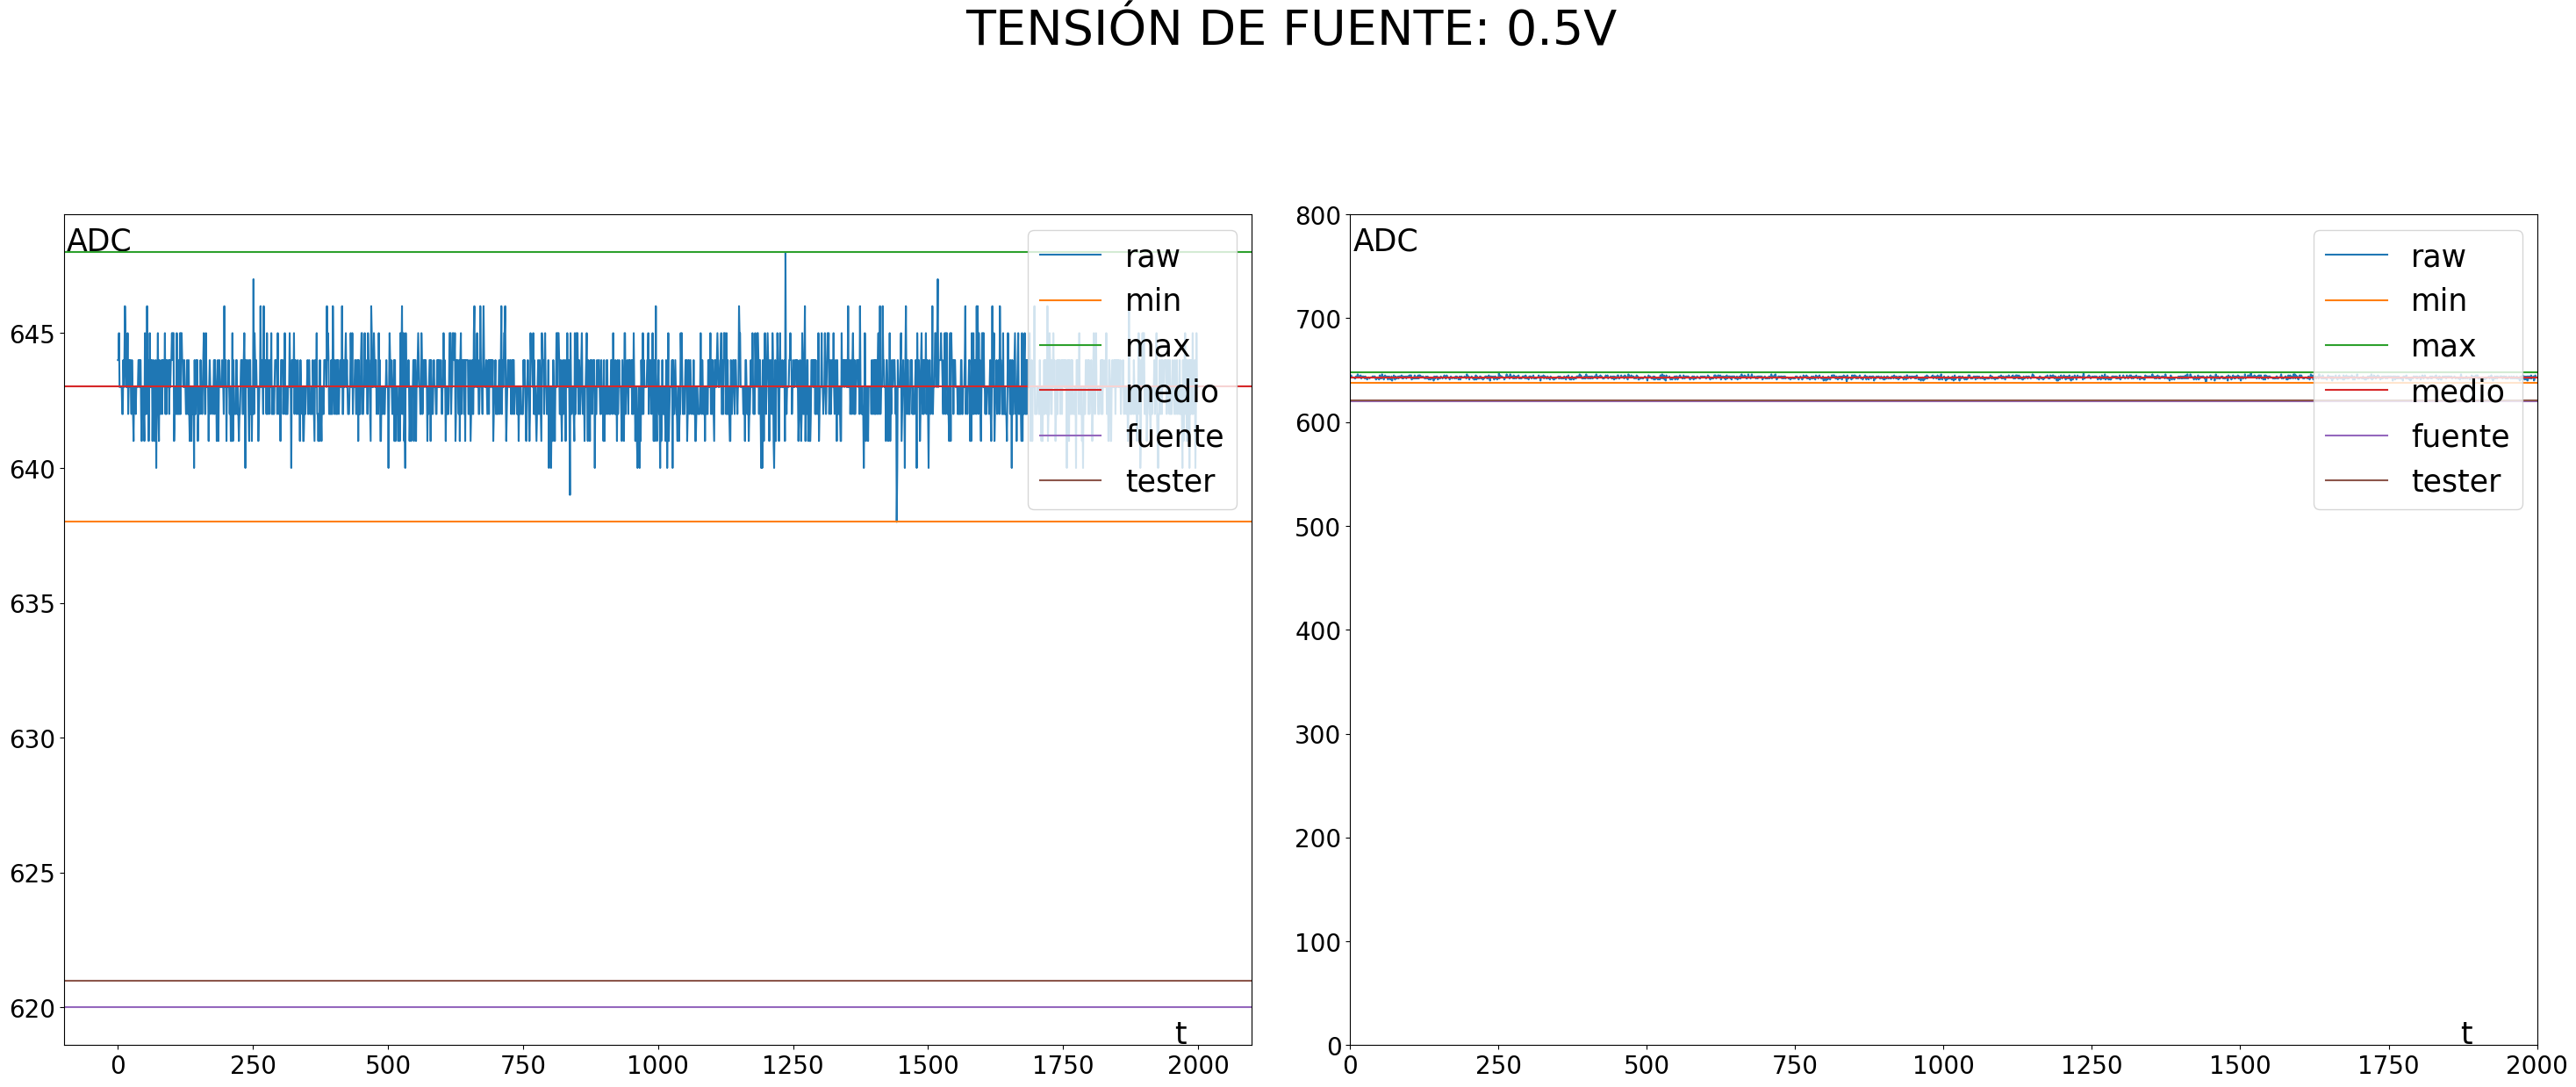

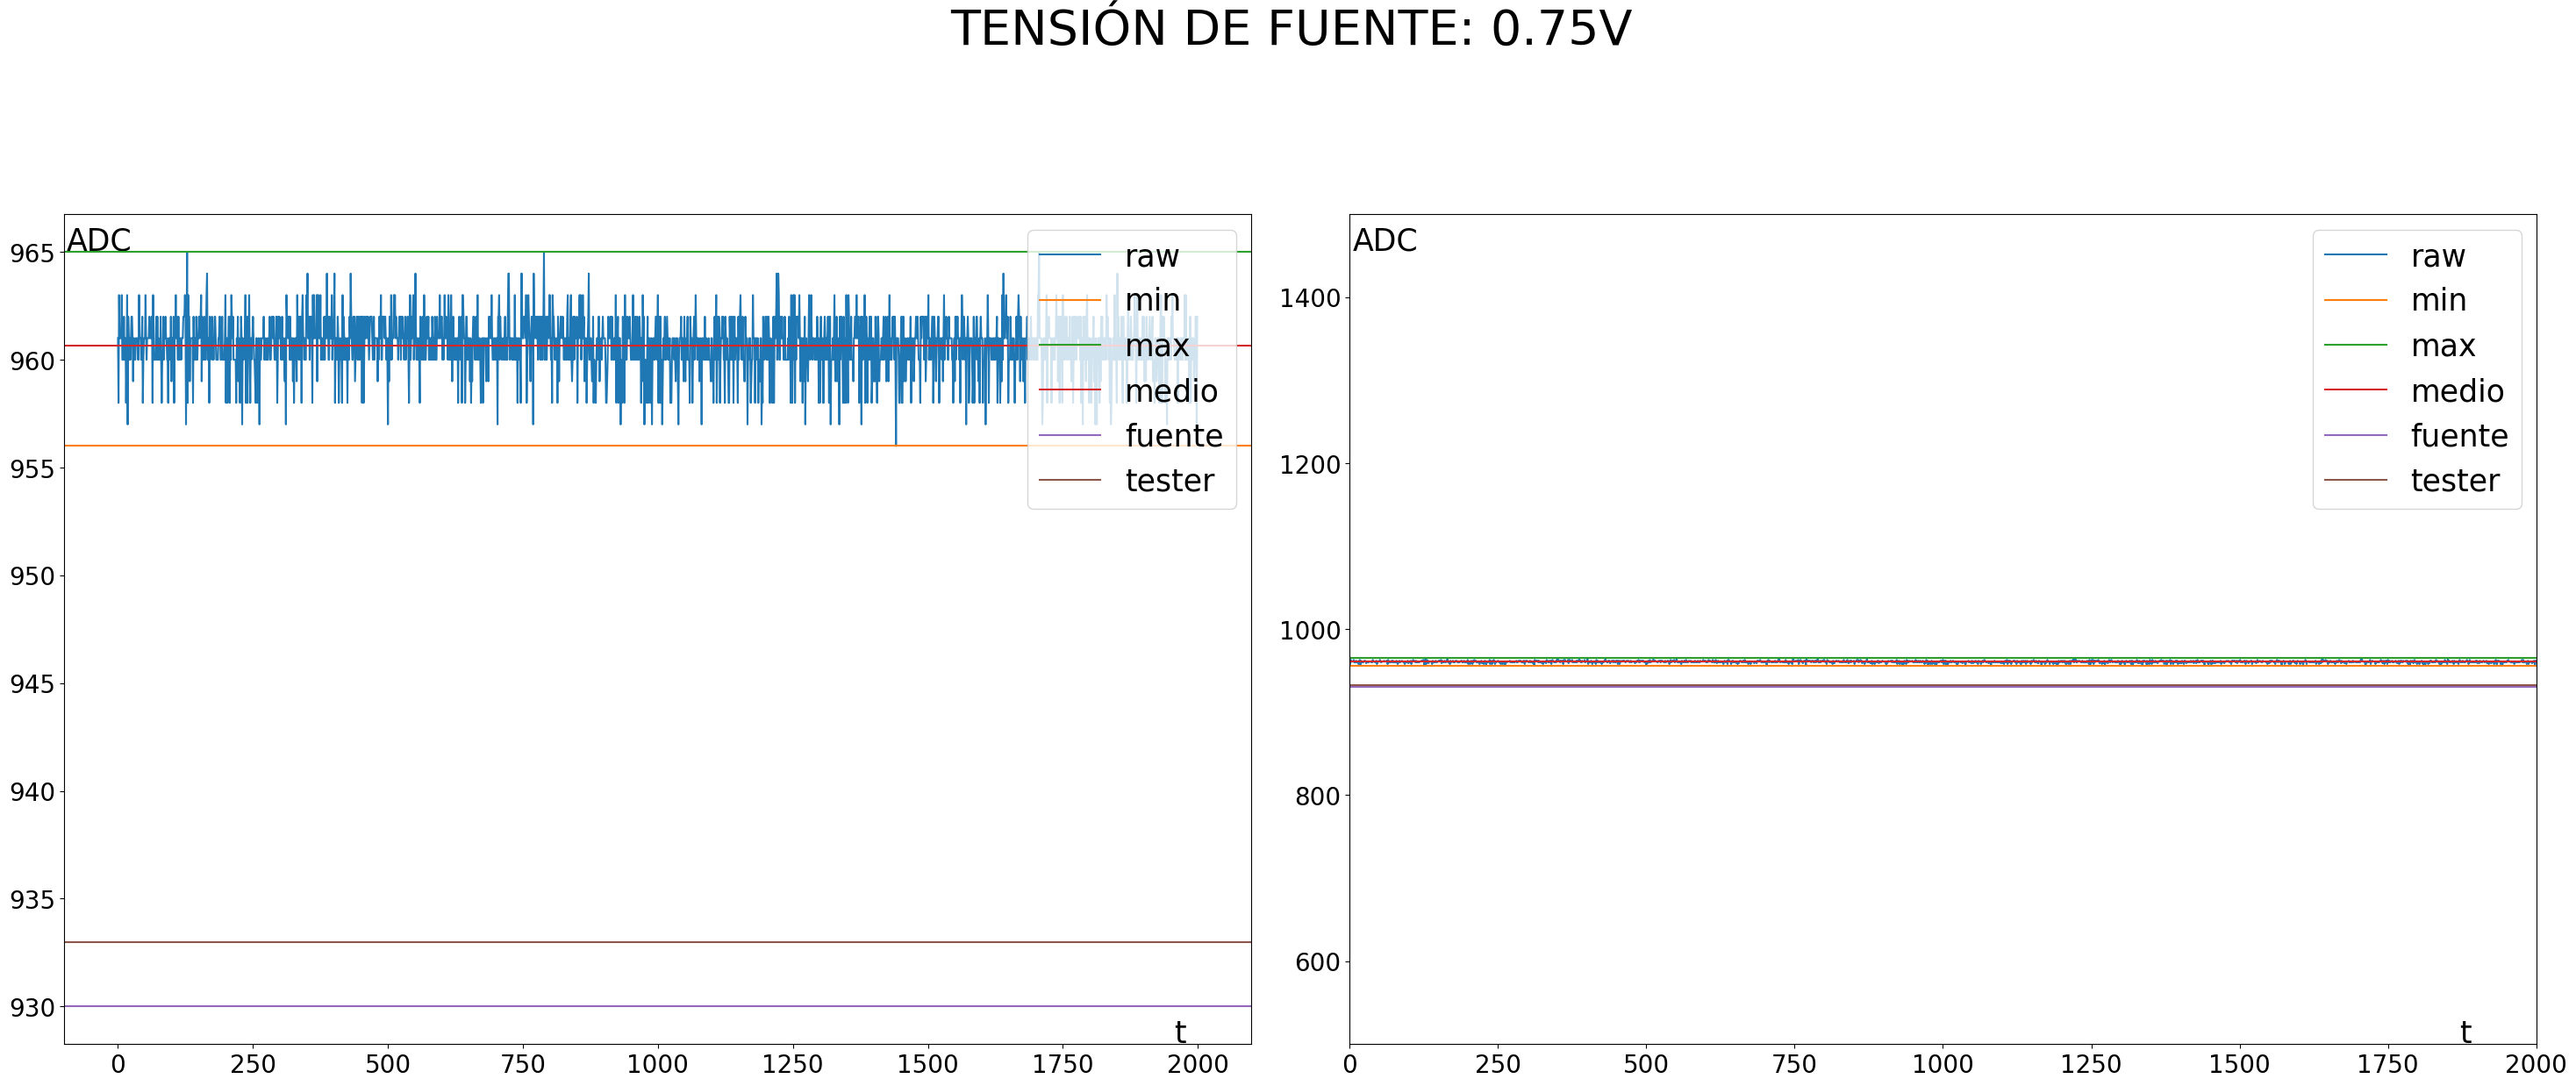

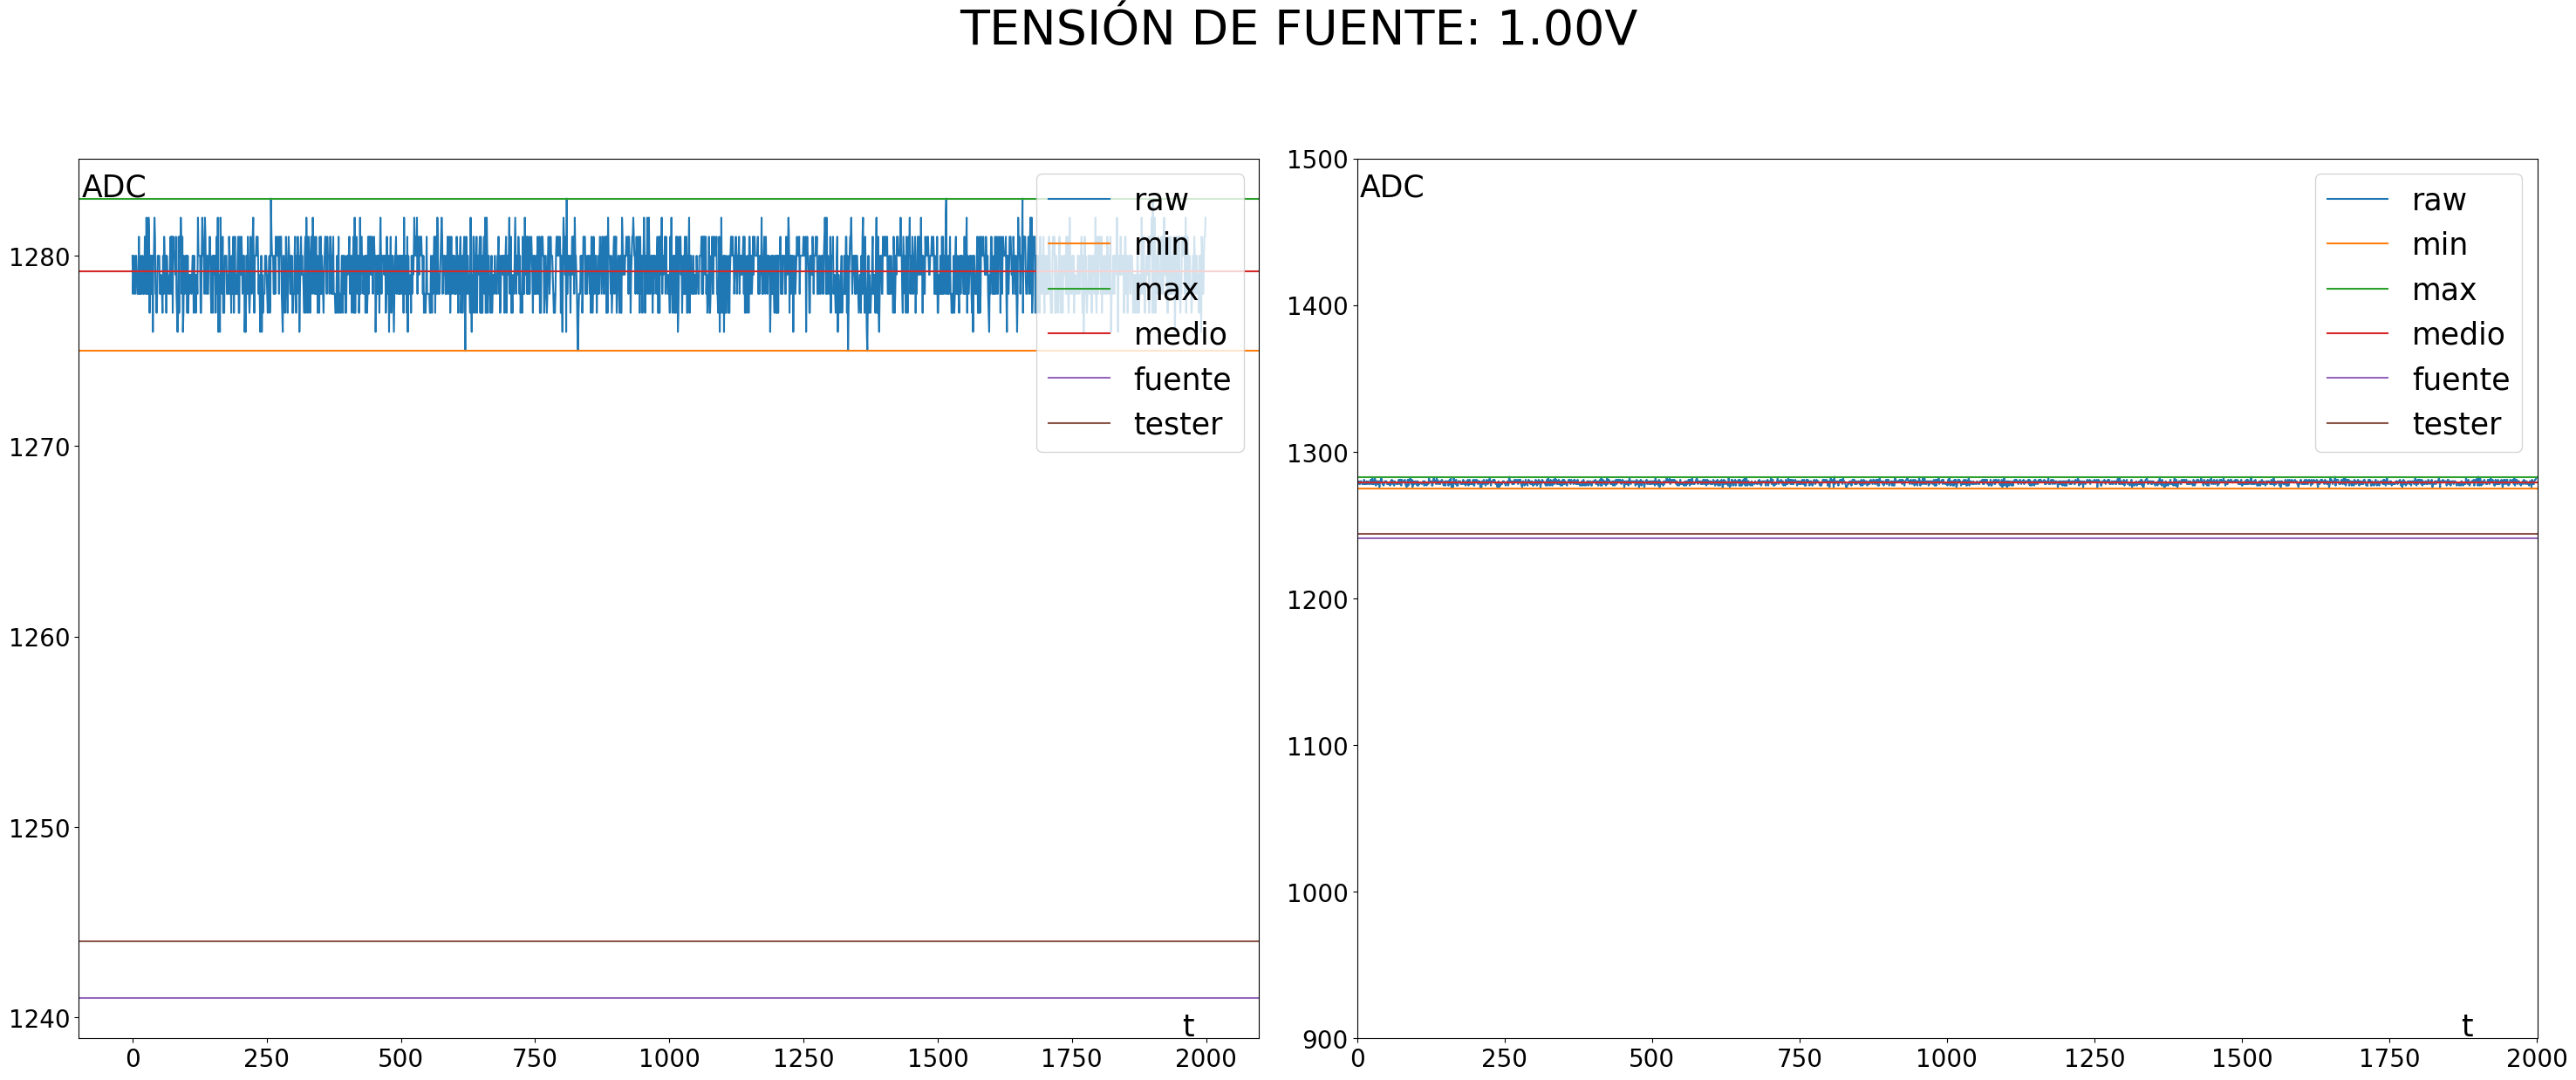

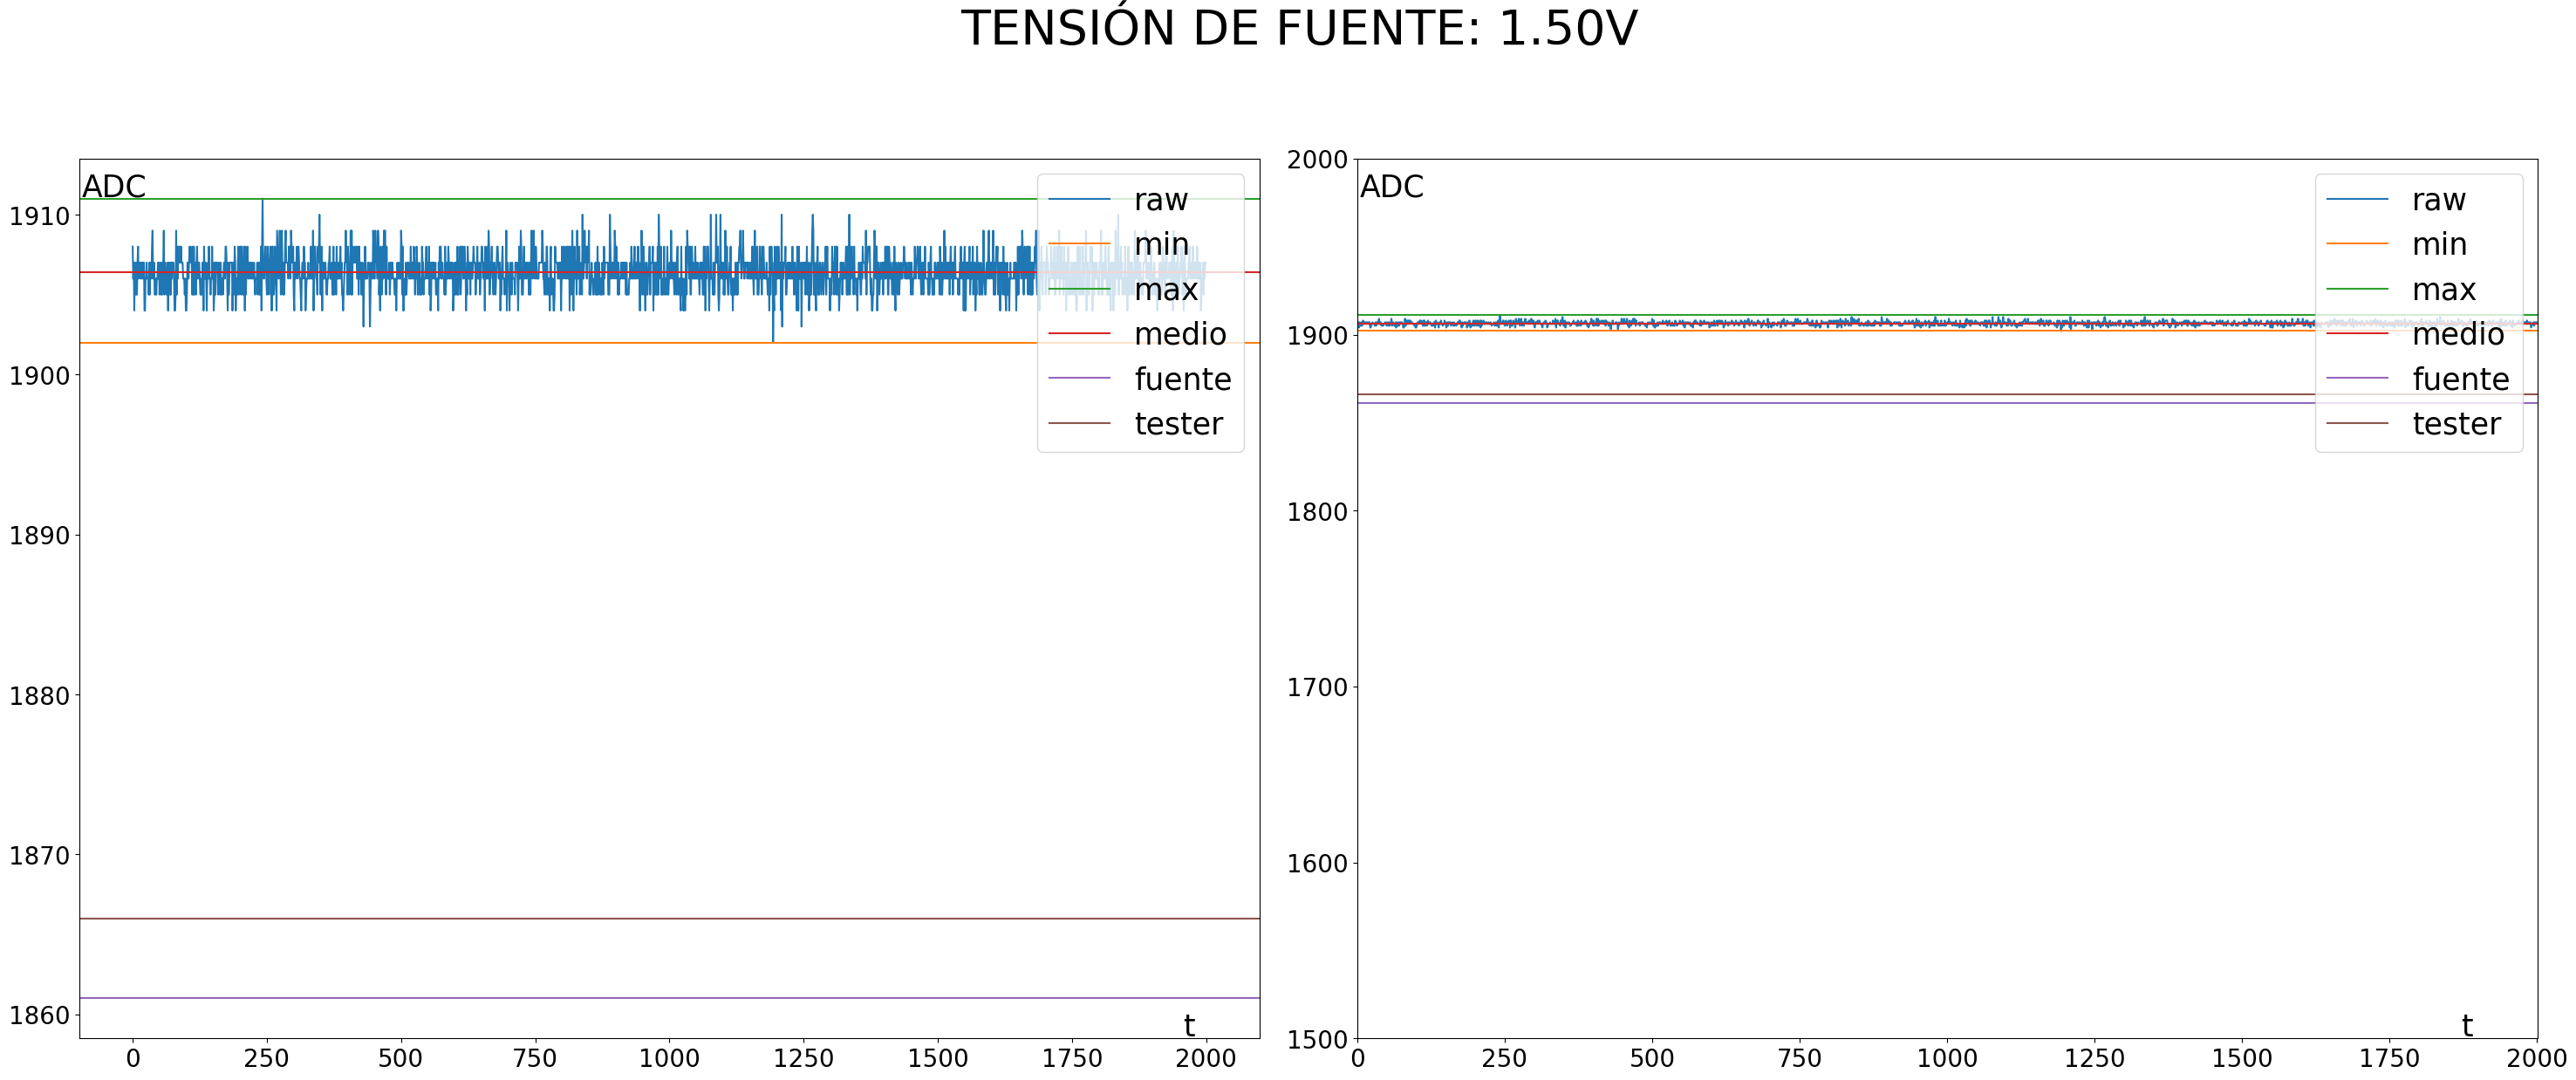

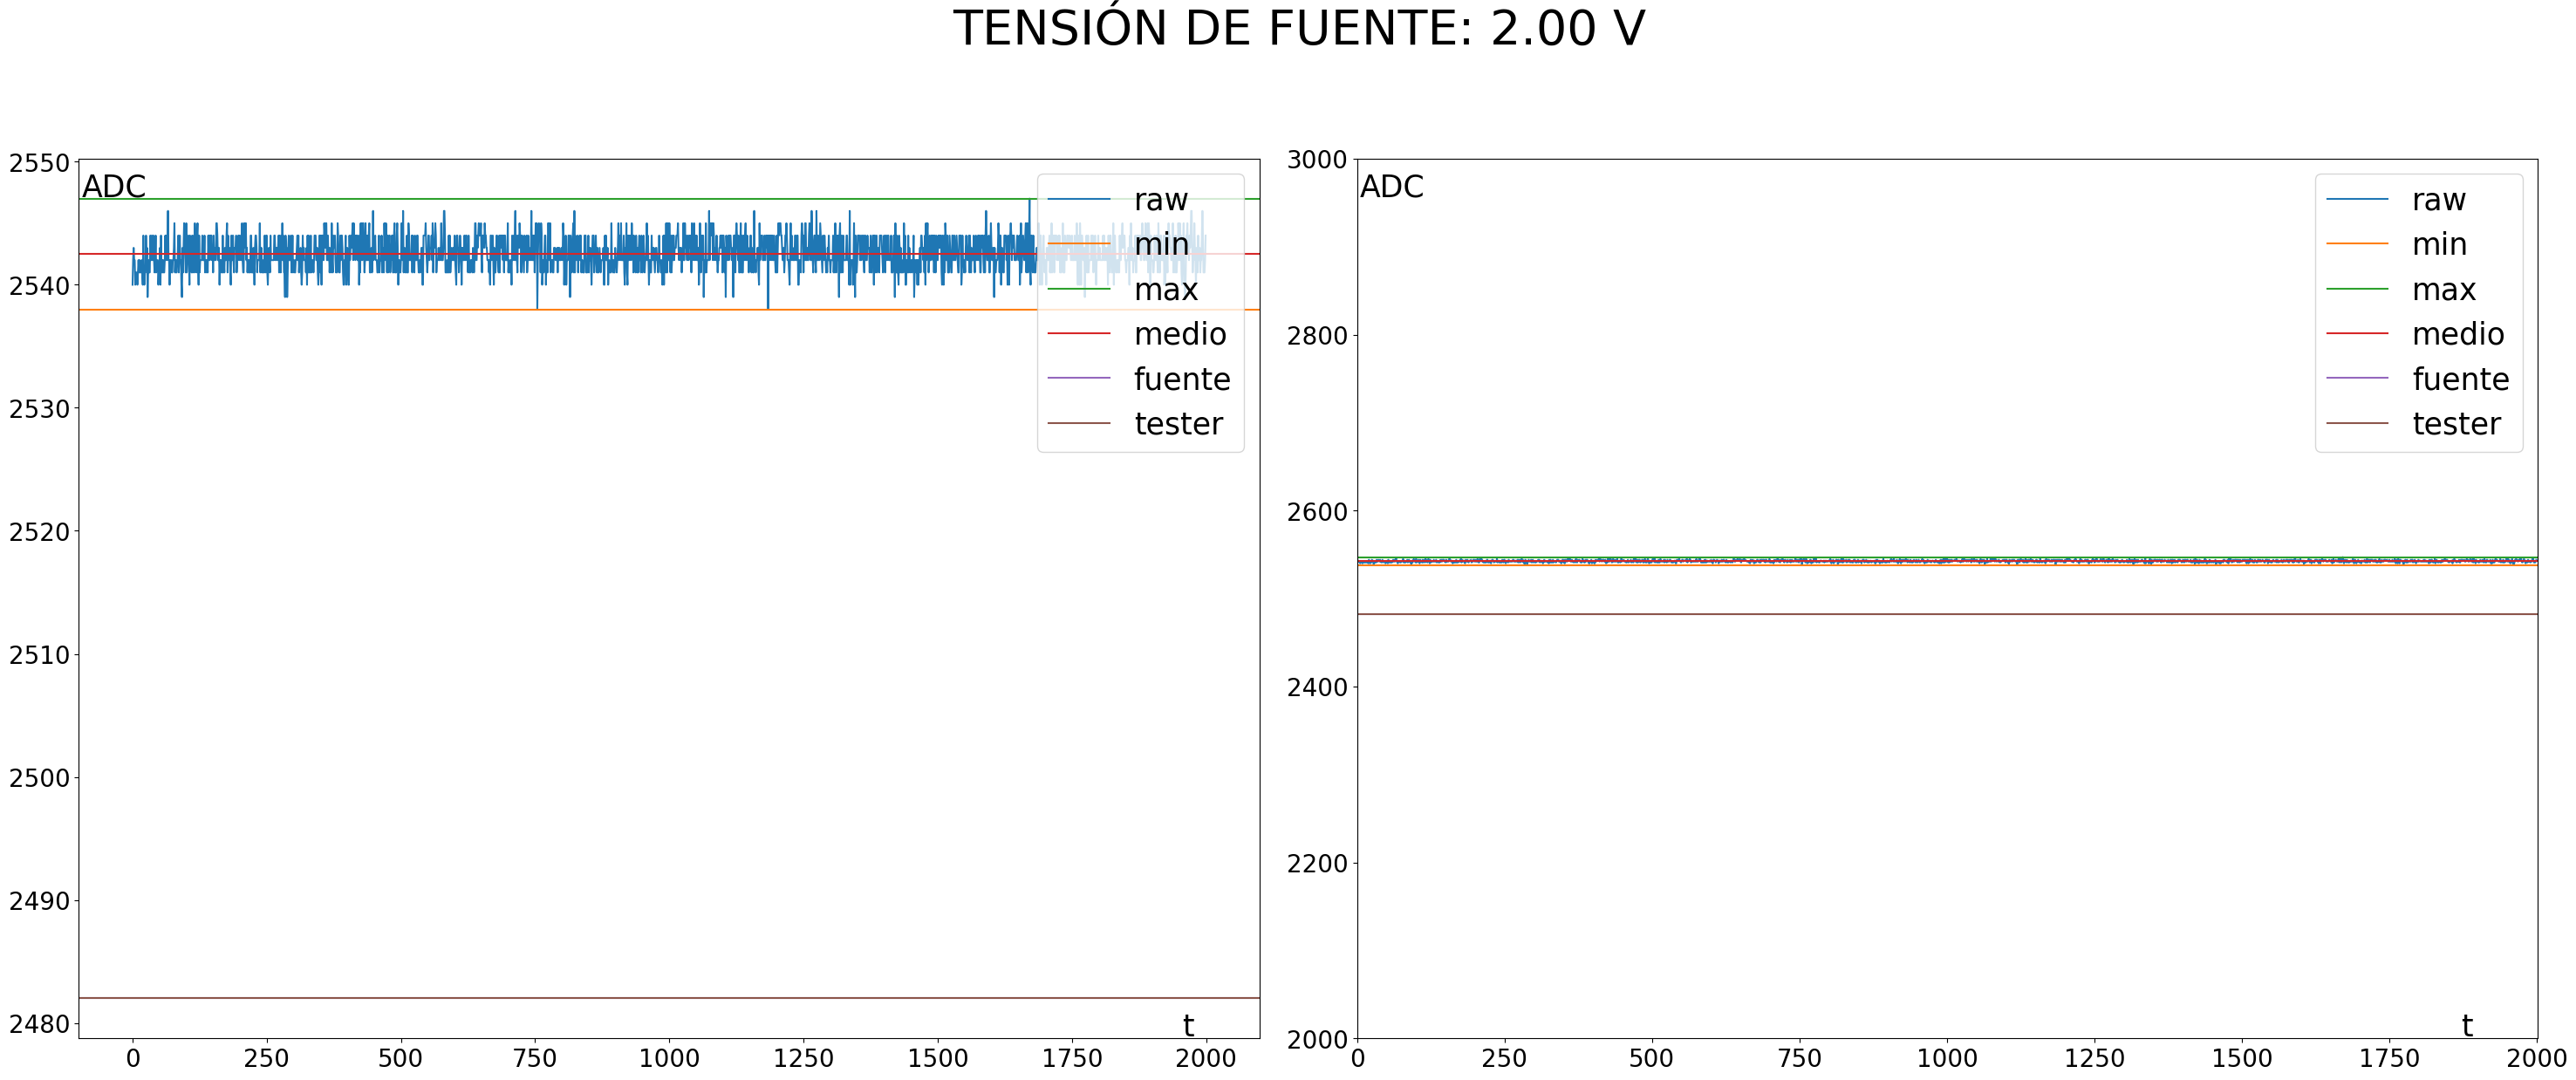

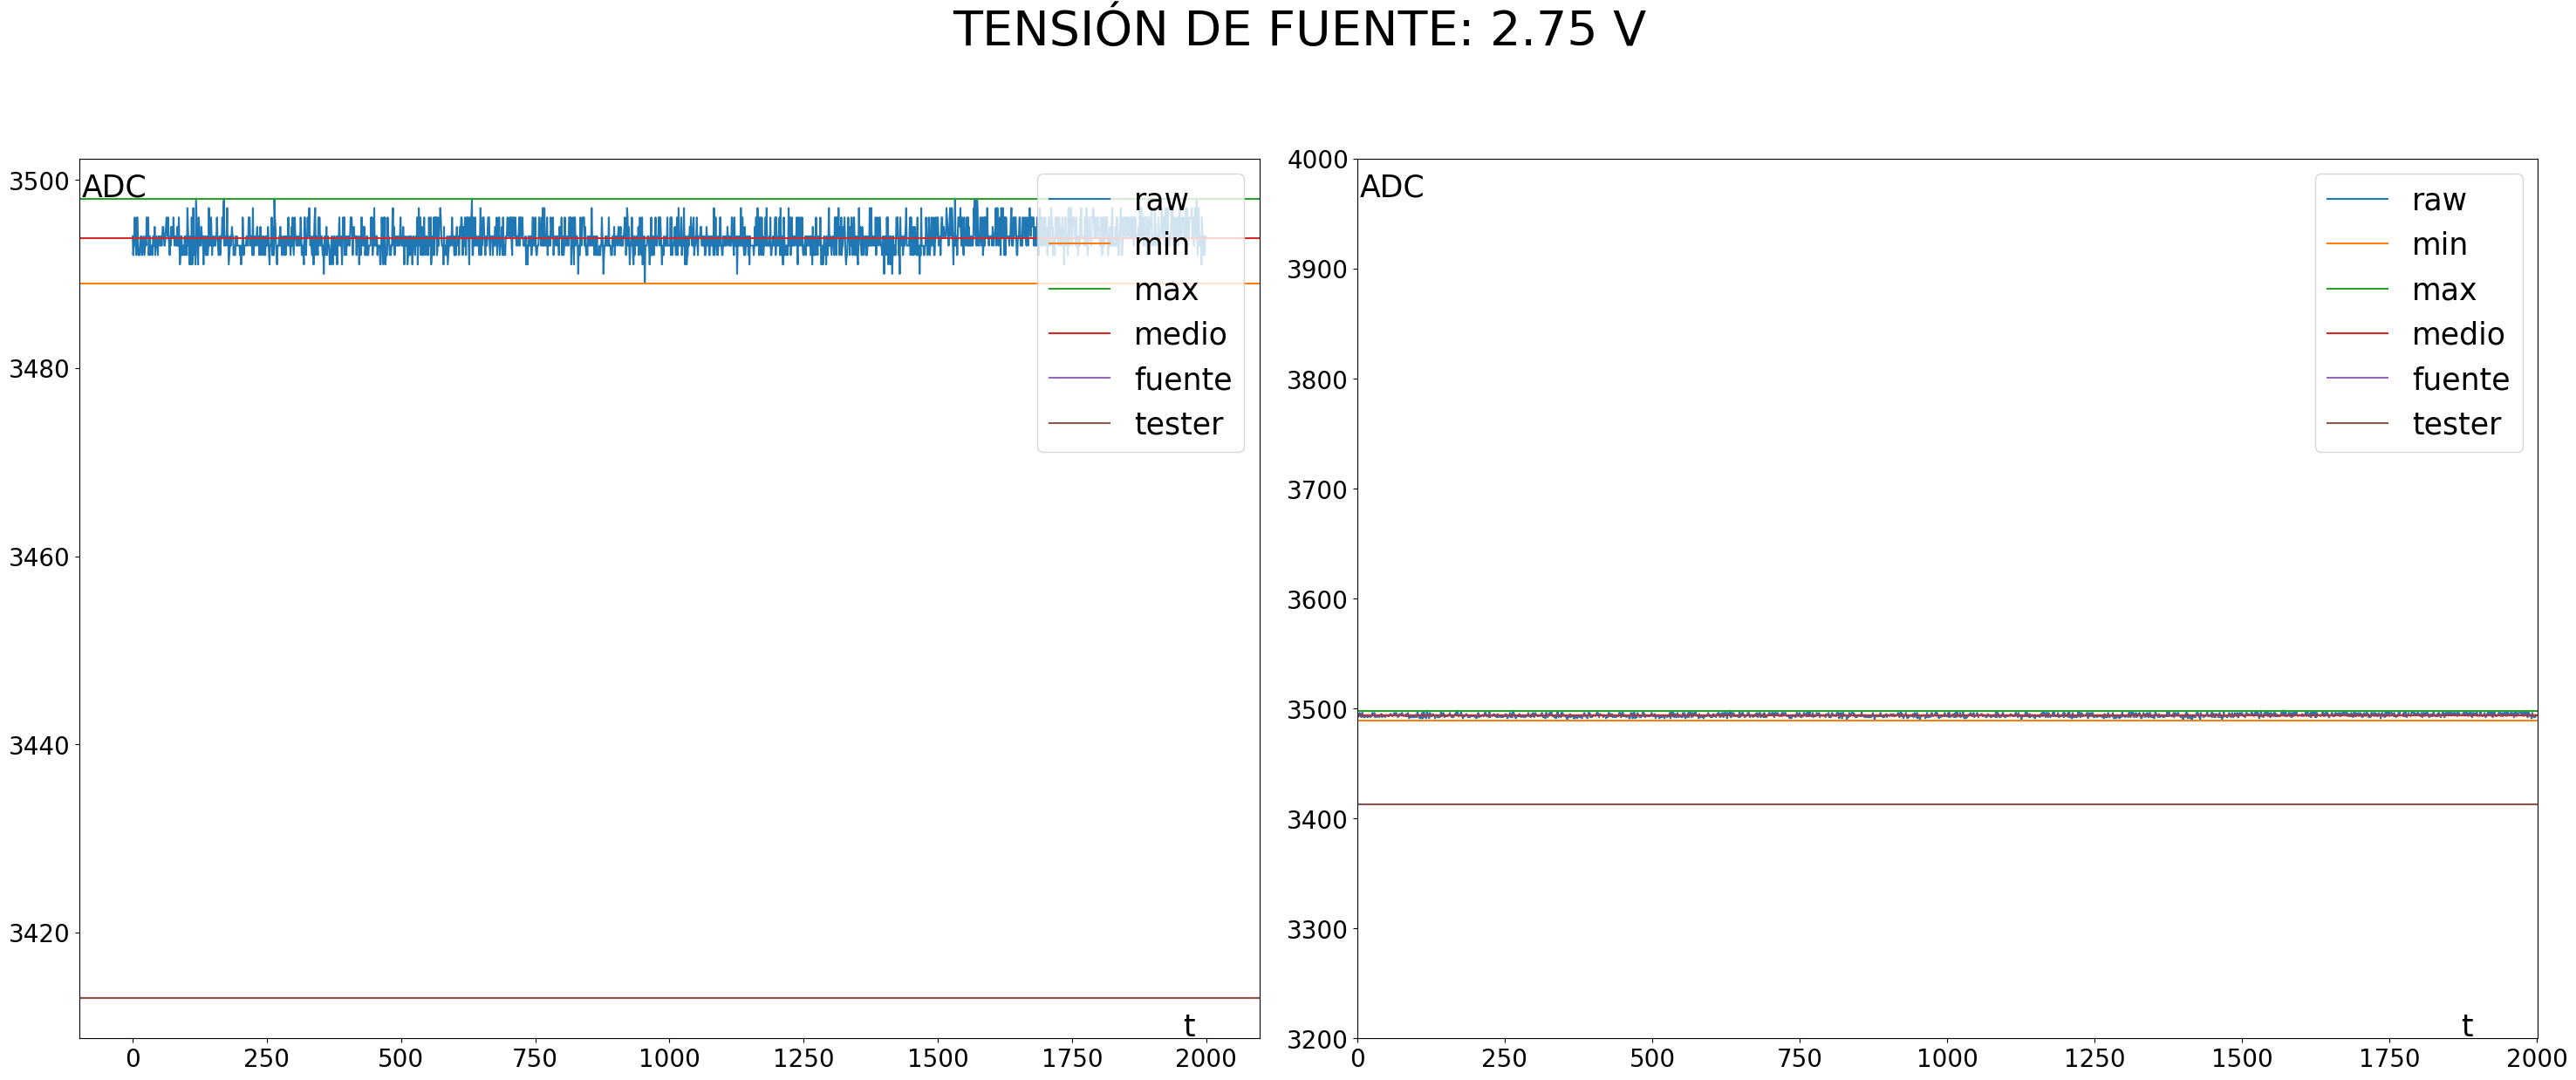

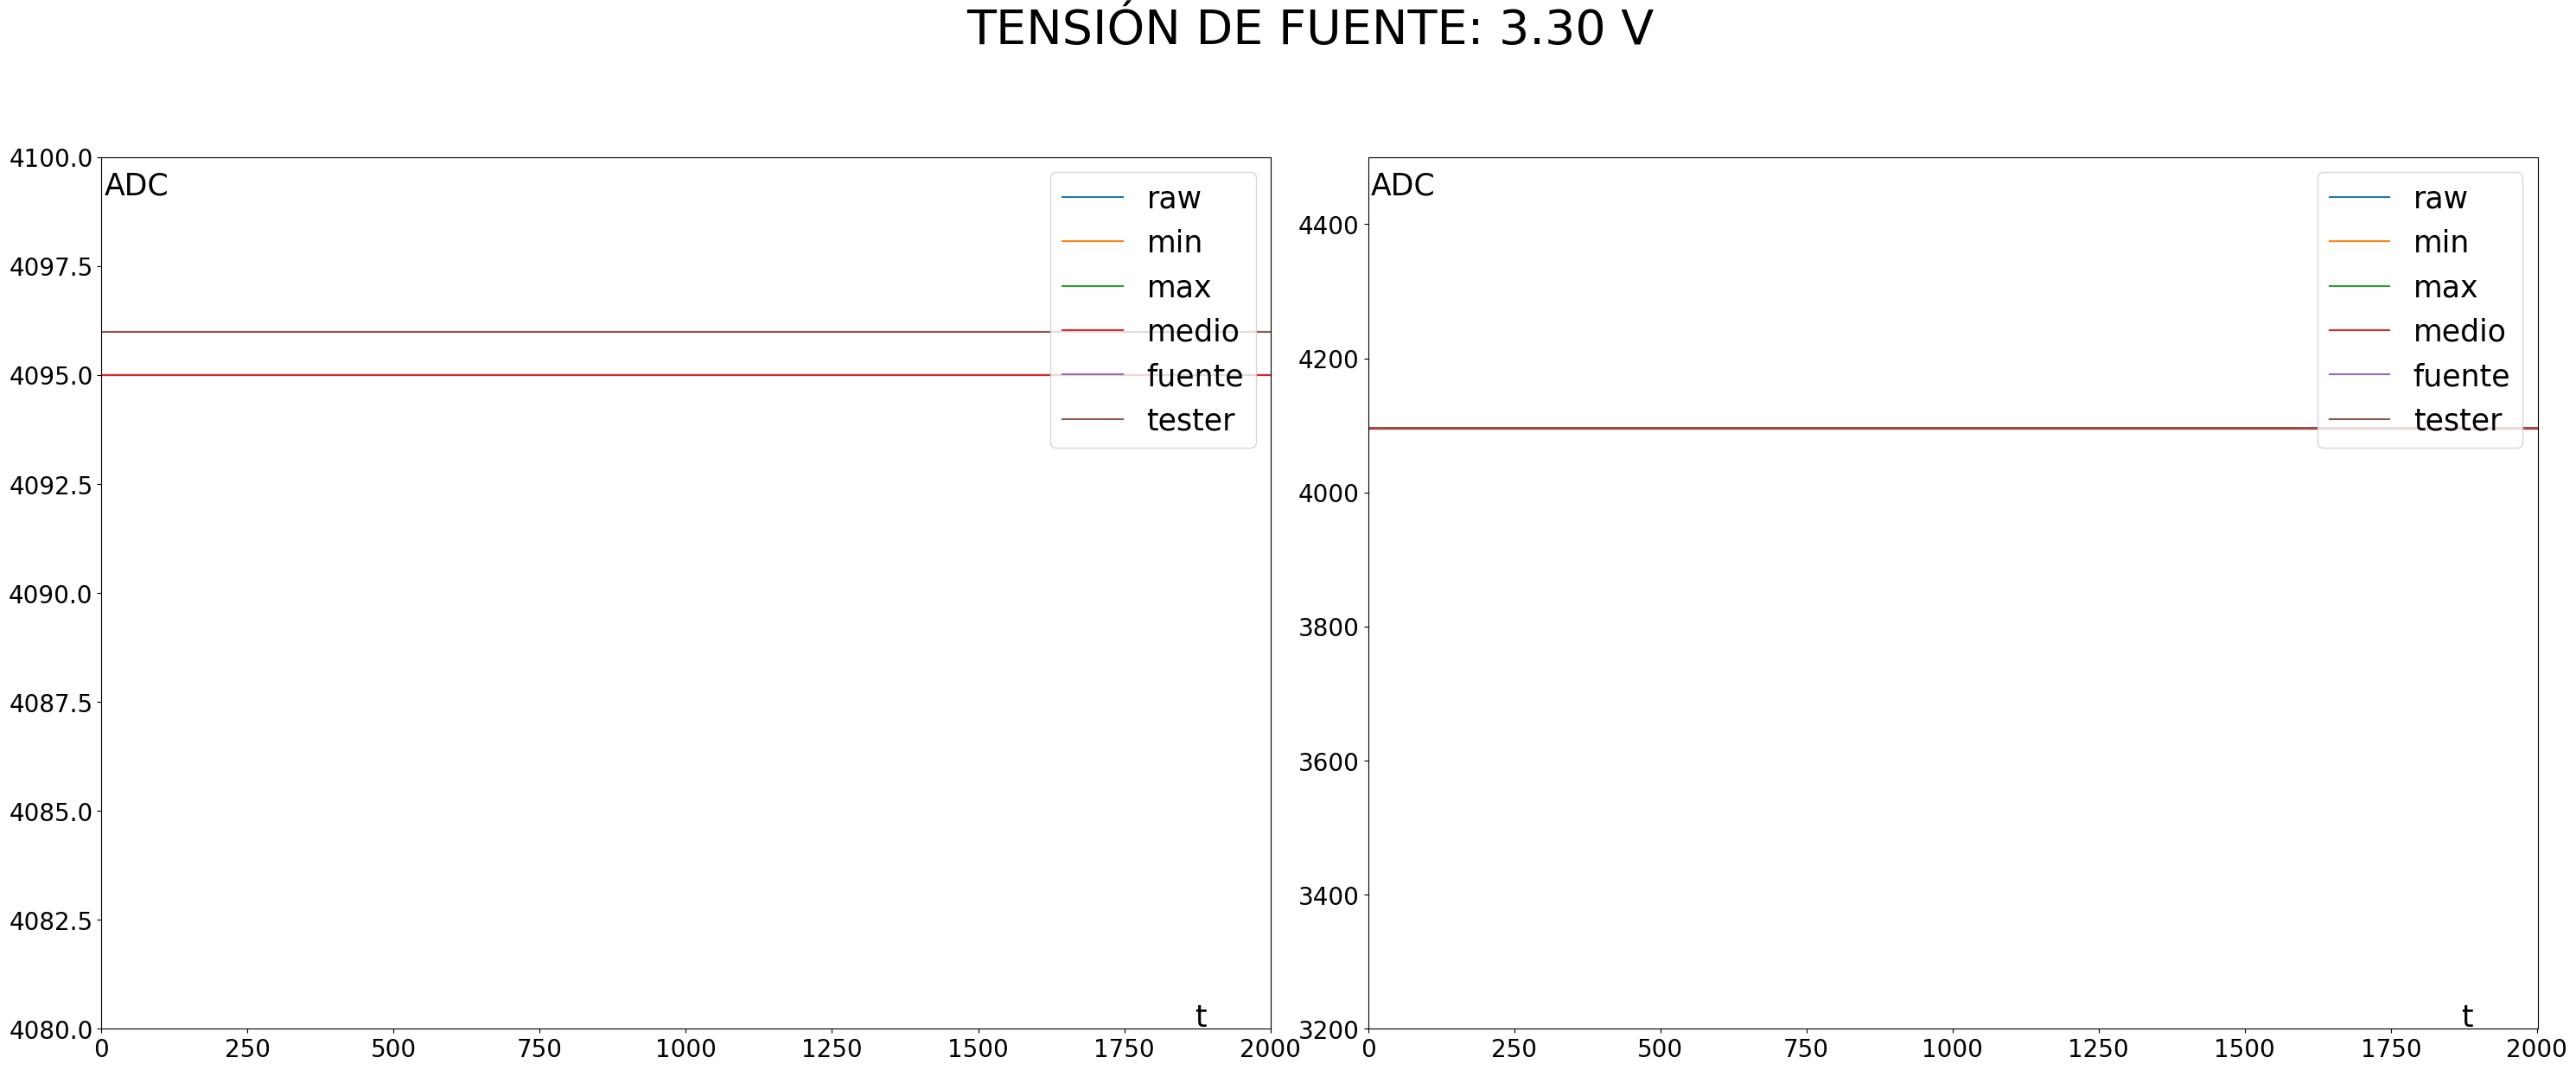

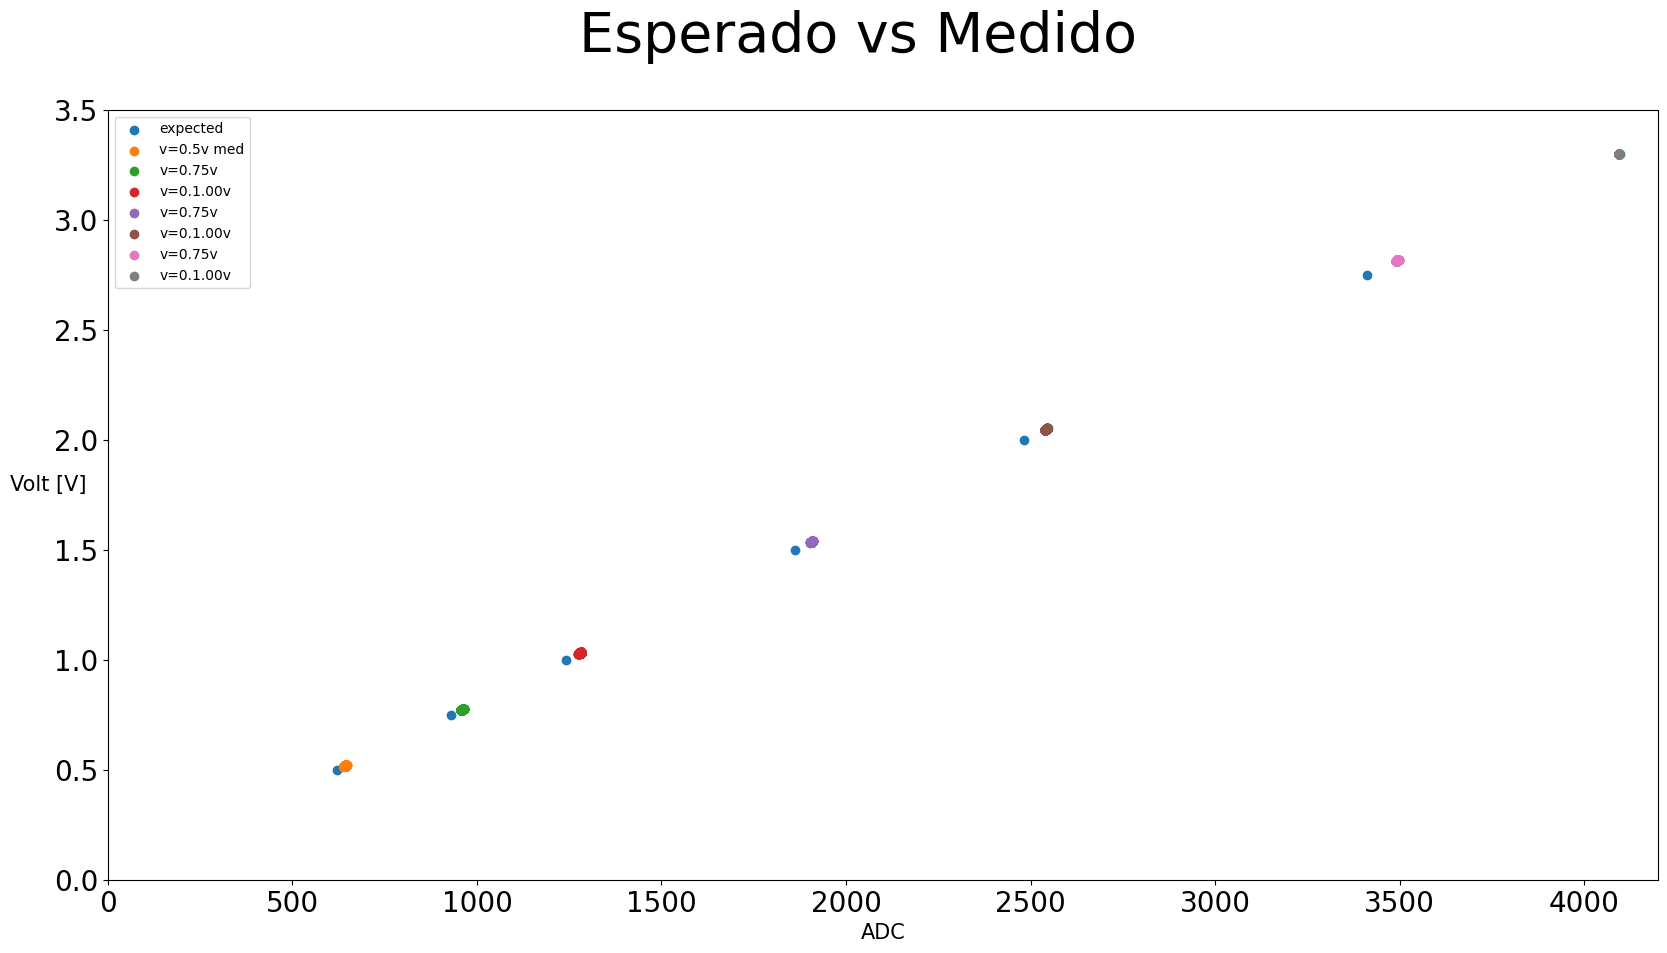

In [35]:
from IPython.display import Markdown as md
import matplotlib.pylab as plt
import numpy as np 
### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v
## PARAMETERS OF ANALISIS ADC TEST REPORT 
path_file = '../../../results/TC-I-ADC/'
list_files_tcI=['TC-I-ADC-0.5.txt','TC-I-ADC-0.75.txt','TC-I-ADC-1.00.txt','TC-I-ADC-1.50.txt','TC-I-ADC-2.00.txt','TC-I-ADC-2.75.txt', 'TC-I-ADC-3.30.txt']
voltage_tester = [0.501,0.752,1.003,1.504,2.000,2.7500,3.300] 
voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]
save_files =[path_file+list_files_tcI[0]+'.jpg',
            path_file+list_files_tcI[1]+'.jpg',
            path_file+list_files_tcI[2]+'.jpg',
            path_file+list_files_tcI[3]+'.jpg',
            path_file+list_files_tcI[4]+'.jpg',
            path_file+list_files_tcI[5]+'.jpg',
            path_file+list_files_tcI[6]+'.jpg']


NBITS = 12 
MAX_VALUE =4096 #2**12 
SOURCE_ADC_VOLTAGE = 3.3 #MEASURE OF GND
measure_data = np.zeros((2000,len(list_files_tcI)),dtype=int)
measure_data_hex = np.zeros((2000,len(list_files_tcI)),dtype=int)
v_compute_raw_adc= np.zeros((2000,len(list_files_tcI)))

### Values of compute of script 
##  Expected values compute 
## position indicate a file using a list_files_tcI
ADC_voltage_expected_tester = []
ADC_voltage_expected_source = []
ADC_mean_samples = []
ADC_max_sample = []
ADC_min_sample = [] 
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 


for i in range(0,len(voltage_tester)):
    ADC_voltage_expected_tester.append(int( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_tester[i]))
    ADC_voltage_expected_source.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    

### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
for file in list_files_tcI:    
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(x, 16) for x in d1])
    d2 =d2.astype(int) 
    measure_data[:,i] = d2 
    measure_data_hex[:,i] = d1 
    ADC_mean_samples.append(np.mean(d2))
    ADC_max_sample.append(np.amax(d2))
    ADC_min_sample.append(np.amin(d2))
    i = i +1 

for i in range(0,len(list_files_tcI)): 
    v_compute_raw_adc[:,i] = measure_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)







### FIGURE CREATE AND DRAWING DATA 
######################################### SOURCE OF 0.5V  ###############################################################

fig05, ax05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig05.suptitle('TENSIÓN DE FUENTE: 0.5V\n',fontsize = 40)
fig05.tight_layout(pad=5.0)
l1=ax05[0].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[0].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[0].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[0].axhline(y=ADC_mean_samples[0],label='medio',color ='#d62728')
l5=ax05[0].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[0].axhline(y=ADC_voltage_expected_tester[0],label='tester',color= '#8c564b')
ax05[0].legend(loc='upper right',fontsize=25)
ax05[0].set_xlabel('t',fontsize = 25) 
ax05[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax05[0].tick_params(axis='both', which='major', labelsize=20)
ax05[0].xaxis.set_label_coords(0.94,0.03)
ax05[0].yaxis.set_label_coords(0.03,0.95)
l1=ax05[1].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[1].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[1].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[1].axhline(y=ADC_mean_samples[0],label='medio',color='#d62728')
l5=ax05[1].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[1].axhline(y=ADC_voltage_expected_tester[0],label='tester',color = '#8c564b')
ax05[1].legend(loc='upper right',fontsize=25)                         
ax05[1].tick_params(axis='both', which='major',labelsize=20) 
ax05[1].set_xlabel('t',fontsize = 25) 
ax05[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax05[1].set_xlim([0,2001]) 
ax05[1].set_ylim([0,800]) 
ax05[1].xaxis.set_label_coords(0.94,0.03)
ax05[1].yaxis.set_label_coords(0.03,0.95)
fig05.savefig(save_files[0]) 
######################################### END SOURCE OF 0.5V  ###############################################################

#########################################  SOURCE OF 0.75V  ###############################################################
fig075, ax075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig075.suptitle('TENSIÓN DE FUENTE: 0.75V\n',fontsize = 40)
fig075.tight_layout(pad=5.0)
l1=ax075[0].plot(n_samples_adc, measure_data[:,1],label='raw',color='#1f77b4')
l2=ax075[0].axhline(y=ADC_min_sample[1],label='min',color= '#ff7f0e')
l3=ax075[0].axhline(y=ADC_max_sample[1],label='max',color='#2ca02c')
l4=ax075[0].axhline(y=ADC_mean_samples[1],label='medio',color ='#d62728')
l5=ax075[0].axhline(y=ADC_voltage_expected_source[1],label='fuente',color = '#9467bd')
l6= ax075[0].axhline(y=ADC_voltage_expected_tester[1],label='tester',color= '#8c564b')
ax075[0].legend(loc='upper right',fontsize=25)
ax075[0].set_xlabel('t',fontsize = 25) 
ax075[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax075[0].tick_params(axis='both', which='major', labelsize=20)
ax075[0].xaxis.set_label_coords(0.94,0.03)
ax075[0].yaxis.set_label_coords(0.03,0.95)
l1=ax075[1].plot(n_samples_adc, measure_data[:,1],label='raw',color='#1f77b4')
l2=ax075[1].axhline(y=ADC_min_sample[1],label='min',color= '#ff7f0e')
l3=ax075[1].axhline(y=ADC_max_sample[1],label='max',color='#2ca02c')
l4=ax075[1].axhline(y=ADC_mean_samples[1],label='medio',color='#d62728')
l5=ax075[1].axhline(y=ADC_voltage_expected_source[1],label='fuente',color = '#9467bd')
l6= ax075[1].axhline(y=ADC_voltage_expected_tester[1],label='tester',color = '#8c564b')
ax075[1].legend(loc='upper right',fontsize=25)                         
ax075[1].tick_params(axis='both', which='major',labelsize=20) 
ax075[1].set_xlabel('t',fontsize = 25) 
ax075[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax075[1].set_xlim([0,2001]) 
ax075[1].set_ylim([500,1500]) 
ax075[1].xaxis.set_label_coords(0.94,0.03)
ax075[1].yaxis.set_label_coords(0.03,0.95)
fig075.savefig(save_files[1],bbox_inches="tight") 
######################################### END SOURCE OF 0.75V  ###############################################################



#########################################  SOURCE OF 1.00V  ###############################################################
fig100, ax100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig100.suptitle('TENSIÓN DE FUENTE: 1.00V',fontsize = 40)
fig100.tight_layout(pad=5.0)
l1=ax100[0].plot(n_samples_adc, measure_data[:,2],label='raw',color='#1f77b4')
l2=ax100[0].axhline(y=ADC_min_sample[2],label='min',color= '#ff7f0e')
l3=ax100[0].axhline(y=ADC_max_sample[2],label='max',color='#2ca02c')
l4=ax100[0].axhline(y=ADC_mean_samples[2],label='medio',color ='#d62728')
l5=ax100[0].axhline(y=ADC_voltage_expected_source[2],label='fuente',color = '#9467bd')
l6= ax100[0].axhline(y=ADC_voltage_expected_tester[2],label='tester',color= '#8c564b')
ax100[0].legend(loc='upper right',fontsize=25)
ax100[0].set_xlabel('t',fontsize = 25) 
ax100[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax100[0].tick_params(axis='both', which='major', labelsize=20)
ax100[0].xaxis.set_label_coords(0.94,0.03)
ax100[0].yaxis.set_label_coords(0.03,0.95)
l1=ax100[1].plot(n_samples_adc, measure_data[:,2],label='raw',color='#1f77b4')
l2=ax100[1].axhline(y=ADC_min_sample[2],label='min',color= '#ff7f0e')
l3=ax100[1].axhline(y=ADC_max_sample[2],label='max',color='#2ca02c')
l4=ax100[1].axhline(y=ADC_mean_samples[2],label='medio',color='#d62728')
l5=ax100[1].axhline(y=ADC_voltage_expected_source[2],label='fuente',color = '#9467bd')
l6= ax100[1].axhline(y=ADC_voltage_expected_tester[2],label='tester',color = '#8c564b')
ax100[1].legend(loc='upper right',fontsize=25)                         
ax100[1].tick_params(axis='both', which='major',labelsize=20) 
ax100[1].set_xlabel('t',fontsize = 25) 
ax100[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax100[1].set_xlim([0,2001]) 
ax100[1].set_ylim([900,1500]) 
ax100[1].xaxis.set_label_coords(0.94,0.03)
ax100[1].yaxis.set_label_coords(0.03,0.95)
fig100.savefig(save_files[2],bbox_inches="tight") 
######################################### END SOURCE OF 1.00V  ###############################################################

######################################### SOURCE OF 1.50V  ###############################################################
fig150, ax150 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig150.suptitle('TENSIÓN DE FUENTE: 1.50V',fontsize = 40)
fig150.tight_layout(pad=5.0)
l1=ax150[0].plot(n_samples_adc, measure_data[:,3],label='raw',color='#1f77b4')
l2=ax150[0].axhline(y=ADC_min_sample[3],label='min',color= '#ff7f0e')
l3=ax150[0].axhline(y=ADC_max_sample[3],label='max',color='#2ca02c')
l4=ax150[0].axhline(y=ADC_mean_samples[3],label='medio',color ='#d62728')
l5=ax150[0].axhline(y=ADC_voltage_expected_source[3],label='fuente',color = '#9467bd')
l6= ax150[0].axhline(y=ADC_voltage_expected_tester[3],label='tester',color= '#8c564b')
ax150[0].legend(loc='upper right',fontsize=25)
ax150[0].set_xlabel('t',fontsize = 25) 
ax150[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax150[0].tick_params(axis='both', which='major', labelsize=20)
ax150[0].xaxis.set_label_coords(0.94,0.03)
ax150[0].yaxis.set_label_coords(0.03,0.95)
l1=ax150[1].plot(n_samples_adc, measure_data[:,3],label='raw',color='#1f77b4')
l2=ax150[1].axhline(y=ADC_min_sample[3],label='min',color= '#ff7f0e')
l3=ax150[1].axhline(y=ADC_max_sample[3],label='max',color='#2ca02c')
l4=ax150[1].axhline(y=ADC_mean_samples[3],label='medio',color='#d62728')
l5=ax150[1].axhline(y=ADC_voltage_expected_source[3],label='fuente',color = '#9467bd')
l6= ax150[1].axhline(y=ADC_voltage_expected_tester[3],label='tester',color = '#8c564b')
ax150[1].legend(loc='upper right',fontsize=25)                         
ax150[1].tick_params(axis='both', which='major',labelsize=20) 
ax150[1].set_xlabel('t',fontsize = 25) 
ax150[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax150[1].set_xlim([0,2001]) 
ax150[1].set_ylim([1500,2000]) 
ax150[1].xaxis.set_label_coords(0.94,0.03)
ax150[1].yaxis.set_label_coords(0.03,0.95)
fig150.savefig(save_files[3],bbox_inches="tight") 
######################################### END SOURCE OF 1.50V  ###############################################################

######################################### SOURCE OF 2.00V  ###############################################################
#index 4 
fig200, ax200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig200.suptitle('TENSIÓN DE FUENTE: 2.00 V',fontsize = 40)
fig200.tight_layout(pad=5.0)
l1=ax200[0].plot(n_samples_adc, measure_data[:,4],label='raw',color='#1f77b4')
l2=ax200[0].axhline(y=ADC_min_sample[4],label='min',color= '#ff7f0e')
l3=ax200[0].axhline(y=ADC_max_sample[4],label='max',color='#2ca02c')
l4=ax200[0].axhline(y=ADC_mean_samples[4],label='medio',color ='#d62728')
l5=ax200[0].axhline(y=ADC_voltage_expected_source[4],label='fuente',color = '#9467bd')
l6= ax200[0].axhline(y=ADC_voltage_expected_tester[4],label='tester',color= '#8c564b')
ax200[0].legend(loc='upper right',fontsize=25)
ax200[0].set_xlabel('t',fontsize = 25) 
ax200[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax200[0].tick_params(axis='both', which='major', labelsize=20)
ax200[0].xaxis.set_label_coords(0.94,0.03)
ax200[0].yaxis.set_label_coords(0.03,0.95)
l1=ax200[1].plot(n_samples_adc, measure_data[:,4],label='raw',color='#1f77b4')
l2=ax200[1].axhline(y=ADC_min_sample[4],label='min',color= '#ff7f0e')
l3=ax200[1].axhline(y=ADC_max_sample[4],label='max',color='#2ca02c')
l4=ax200[1].axhline(y=ADC_mean_samples[4],label='medio',color='#d62728')
l5=ax200[1].axhline(y=ADC_voltage_expected_source[4],label='fuente',color = '#9467bd')
l6= ax200[1].axhline(y=ADC_voltage_expected_tester[4],label='tester',color = '#8c564b')
ax200[1].legend(loc='upper right',fontsize=25)                         
ax200[1].tick_params(axis='both', which='major',labelsize=20) 
ax200[1].set_xlabel('t',fontsize = 25) 
ax200[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax200[1].set_xlim([0,2001]) 
ax200[1].set_ylim([2000,3000]) 
ax200[1].xaxis.set_label_coords(0.94,0.03)
ax200[1].yaxis.set_label_coords(0.03,0.95)
fig200.savefig(save_files[4],bbox_inches="tight") 

######################################### END SOURCE OF 2.00V  ###############################################################

######################################### SOURCE OF 2.75V  ###############################################################
#index 5
fig275, ax275 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig275.suptitle('TENSIÓN DE FUENTE: 2.75 V',fontsize = 40)
fig275.tight_layout(pad=5.0)
l1=ax275[0].plot(n_samples_adc, measure_data[:,5],label='raw',color='#1f77b4')
l2=ax275[0].axhline(y=ADC_min_sample[5],label='min',color= '#ff7f0e')
l3=ax275[0].axhline(y=ADC_max_sample[5],label='max',color='#2ca02c')
l4=ax275[0].axhline(y=ADC_mean_samples[5],label='medio',color ='#d62728')
l5=ax275[0].axhline(y=ADC_voltage_expected_source[5],label='fuente',color = '#9467bd')
l6=ax275[0].axhline(y=ADC_voltage_expected_tester[5],label='tester',color= '#8c564b')
ax275[0].legend(loc='upper right',fontsize=25)
ax275[0].set_xlabel('t',fontsize = 25) 
ax275[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax275[0].tick_params(axis='both', which='major', labelsize=20)
ax275[0].xaxis.set_label_coords(0.94,0.03)
ax275[0].yaxis.set_label_coords(0.03,0.95)
l1=ax275[1].plot(n_samples_adc, measure_data[:,5],label='raw',color='#1f77b4')
l2=ax275[1].axhline(y=ADC_min_sample[5],label='min',color= '#ff7f0e')
l3=ax275[1].axhline(y=ADC_max_sample[5],label='max',color='#2ca02c')
l4=ax275[1].axhline(y=ADC_mean_samples[5],label='medio',color='#d62728')
l5=ax275[1].axhline(y=ADC_voltage_expected_source[5],label='fuente',color = '#9467bd')
l6= ax275[1].axhline(y=ADC_voltage_expected_tester[5],label='tester',color = '#8c564b')
ax275[1].legend(loc='upper right',fontsize=25)                         
ax275[1].tick_params(axis='both', which='major',labelsize=20) 
ax275[1].set_xlabel('t',fontsize = 25) 
ax275[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax275[1].set_xlim([0,2001]) 
ax275[1].set_ylim([3200,4000]) 
ax275[1].xaxis.set_label_coords(0.94,0.03)
ax275[1].yaxis.set_label_coords(0.03,0.95)
fig275.savefig(save_files[5],bbox_inches="tight") 


######################################### END SOURCE OF 2.00V  ###############################################################



######################################### SOURCE OF 3.30V  ###############################################################
#index 6
fig330, ax330 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig330.suptitle('TENSIÓN DE FUENTE: 3.30 V',fontsize = 40)
fig330.tight_layout(pad=5.0)
l1=ax330[0].plot(n_samples_adc, measure_data[:,6],label='raw',color='#1f77b4')
l2=ax330[0].axhline(y=ADC_min_sample[6],label='min',color= '#ff7f0e')
l3=ax330[0].axhline(y=ADC_max_sample[6],label='max',color='#2ca02c')
l4=ax330[0].axhline(y=ADC_mean_samples[6],label='medio',color ='#d62728')
l5=ax330[0].axhline(y=ADC_voltage_expected_source[6],label='fuente',color = '#9467bd')
l6= ax330[0].axhline(y=ADC_voltage_expected_tester[6],label='tester',color= '#8c564b')
ax330[0].legend(loc='upper right',fontsize=25)
ax330[0].set_xlabel('t',fontsize = 25) 
ax330[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax330[0].tick_params(axis='both', which='major', labelsize=20)
ax330[0].xaxis.set_label_coords(0.94,0.03)
ax330[0].yaxis.set_label_coords(0.03,0.95)
ax330[0].set_xlim([0,2001]) 
ax330[0].set_ylim([4080,4100]) 

l1=ax330[1].plot(n_samples_adc, measure_data[:,6],label='raw',color='#1f77b4')
l2=ax330[1].axhline(y=ADC_min_sample[6],label='min',color= '#ff7f0e')
l3=ax330[1].axhline(y=ADC_max_sample[6],label='max',color='#2ca02c')
l4=ax330[1].axhline(y=ADC_mean_samples[6],label='medio',color='#d62728')
l5=ax330[1].axhline(y=ADC_voltage_expected_source[6],label='fuente',color = '#9467bd')
l6= ax330[1].axhline(y=ADC_voltage_expected_tester[6],label='tester',color = '#8c564b')
ax330[1].legend(loc='upper right',fontsize=25)                         
ax330[1].tick_params(axis='both', which='major',labelsize=20) 
ax330[1].set_xlabel('t',fontsize = 25) 
ax330[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax330[1].set_xlim([0,2001]) 
ax330[1].set_ylim([3200,4500]) 
ax330[1].xaxis.set_label_coords(0.94,0.03)
ax330[1].yaxis.set_label_coords(0.03,0.95)
fig330.savefig(save_files[6],bbox_inches="tight") 


######################################### END SOURCE OF 3.30V  ###############################################################


######################################### COMPARE VOLTAGE   ###############################################################
figVolt, ax = plt.subplots(figsize=(20,10))
figVolt.suptitle('Esperado vs Medido',fontsize = 40)
ax.set_xlim([0,4200]) 
ax.set_ylim([0,3.5]) 
ax.scatter(ADC_voltage_expected_source,voltage_source,label='expected',color='#1f77b4')
ax.scatter(measure_data[:,0],v_compute_raw_adc[:,0],label='v=0.5v med',color='#ff7f0e')
ax.scatter(measure_data[:,1],v_compute_raw_adc[:,1],label='v=0.75v',color='#2ca02c')
ax.scatter(measure_data[:,2],v_compute_raw_adc[:,2],label='v=0.1.00v',color='#d62728')
ax.scatter(measure_data[:,3],v_compute_raw_adc[:,3],label='v=0.75v',color='#9467bd')
ax.scatter(measure_data[:,4],v_compute_raw_adc[:,4],label='v=0.1.00v',color= '#8c564b')
ax.scatter(measure_data[:,5],v_compute_raw_adc[:,5],label='v=0.75v',color='#e377c2')
ax.scatter(measure_data[:,6],v_compute_raw_adc[:,6],label='v=0.1.00v',color='#7f7f7f')
ax.tick_params(axis='both', which='major',labelsize=20) 
ax.set_xlabel('ADC', fontsize = 15) 
ax.set_ylabel('Volt [V]', fontsize = 15,rotation = 0 ) 

ax.legend()

figVolt.savefig(path_file+'expvsmed.jpg')





In [13]:
from IPython.display import HTML
#ADC_voltage_expected_tester = []
#ADC_voltage_expected_source = []
#ADC_mean_samples = []
#ADC_max_sample = []
#ADC_min_sample = [] 
error_relativo =  np.array(ADC_voltage_expected_source)-np.array(ADC_mean_samples)
deltamax =  np.array(ADC_max_sample) - np.array(ADC_min_sample)
linea1 = ('%',
          f'{ADC_voltage_expected_source[0]}/{hex(ADC_voltage_expected_source[0])}',
          f'{int(ADC_mean_samples[0])}/{hex(int(ADC_mean_samples[0]))}',
          int(error_relativo[0]),
          (error_relativo[0]/abs(ADC_voltage_expected_source[0]))*100 ,
          ADC_min_sample[0],
          ADC_max_sample[0],
          deltamax[0])
linea2 = (f'{ADC_voltage_expected_source[1]}/{hex(ADC_voltage_expected_source[1])}',
          f'{int(ADC_mean_samples[1])}/{hex(int(ADC_mean_samples[1]))}',
          int(error_relativo[1]),
           (error_relativo[1]/abs(ADC_voltage_expected_source[1]))*100 ,
           ADC_min_sample[1],
           ADC_max_sample[1],
           deltamax[1] )
linea3 = (f'{ADC_voltage_expected_source[2]}/{hex(ADC_voltage_expected_source[2])}',
          f'{int(ADC_mean_samples[2])}/{hex(int(ADC_mean_samples[2]))}',
          int(error_relativo[2]),          
          (error_relativo[2]/abs(ADC_voltage_expected_source[2]))*100 ,
           ADC_min_sample[2],
           ADC_max_sample[2],
           deltamax[2] )


linea4 = (f'{ADC_voltage_expected_source[3]}/{hex(ADC_voltage_expected_source[3])}',
          f'{int(ADC_mean_samples[3])}/{hex(int(ADC_mean_samples[3]))}',
          int(error_relativo[3]),         
          (error_relativo[3]/abs(ADC_voltage_expected_source[3]))*100 ,
          ADC_min_sample[3],
          ADC_max_sample[3],
          deltamax[3] )


linea5 = (f'{ADC_voltage_expected_source[4]}/{hex(ADC_voltage_expected_source[4])}',
          f'{int(ADC_mean_samples[4])}/{hex(int(ADC_mean_samples[4]))}',
          int(error_relativo[4]),        
          (error_relativo[4]/abs(ADC_voltage_expected_source[4]))*100 ,
          ADC_min_sample[4],
          ADC_max_sample[4],
          deltamax[4] )

linea6 = (f'{ADC_voltage_expected_source[5]}/{hex(ADC_voltage_expected_source[5])}',
          f'{int(ADC_mean_samples[5])}/{hex(int(ADC_mean_samples[5]))}',
          int(error_relativo[5]),         
          (error_relativo[5]/abs(ADC_voltage_expected_source[5]))*100 ,
          ADC_min_sample[5],
          ADC_max_sample[5],
          deltamax[5] )

linea7 = (f'{ADC_voltage_expected_source[6]}/{hex(ADC_voltage_expected_source[6])}',
          f'{int(ADC_mean_samples[6])}/{hex(int(ADC_mean_samples[6]))}',
           int(error_relativo[6]),         
           (error_relativo[6]/abs(ADC_voltage_expected_source[6]))*100 ,
           ADC_min_sample[6],
           ADC_max_sample[6],
           deltamax[6] )
html_code ="""
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="2">TC-ADC-I</th>
    <th class="tg-0pky" colspan="6">NOMBRE: TEST-ADC-VAL</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Nº</td>
    <td class="tg-0pky">Tensión de fuente<br>[v]</td>
    <td class="tg-0pky">VALOR<br>ESPERADO<br>(decimal/hex)</td>
    <td class="tg-0pky">Promedio<br>2000 muestras<br>(decimal/hex)</td>
    <td class="tg-0pky">Error </td>
    <td class="tg-0pky">Error <br>relativo [%s] </td>
    <td class="tg-0pky">Minimo</td>
    <td class="tg-0pky">Maximo</td>
    <td class="tg-0pky">&Delta;<br></td>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">0.5</td>
    <td class="tg-0pky">%s</td> 
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">3.3</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
</tbody>
</table>""" % (linea1+linea2+linea3+linea4+linea5+linea6+linea7 )





HTML(html_code)

# TC-ADC-II: Test reference 

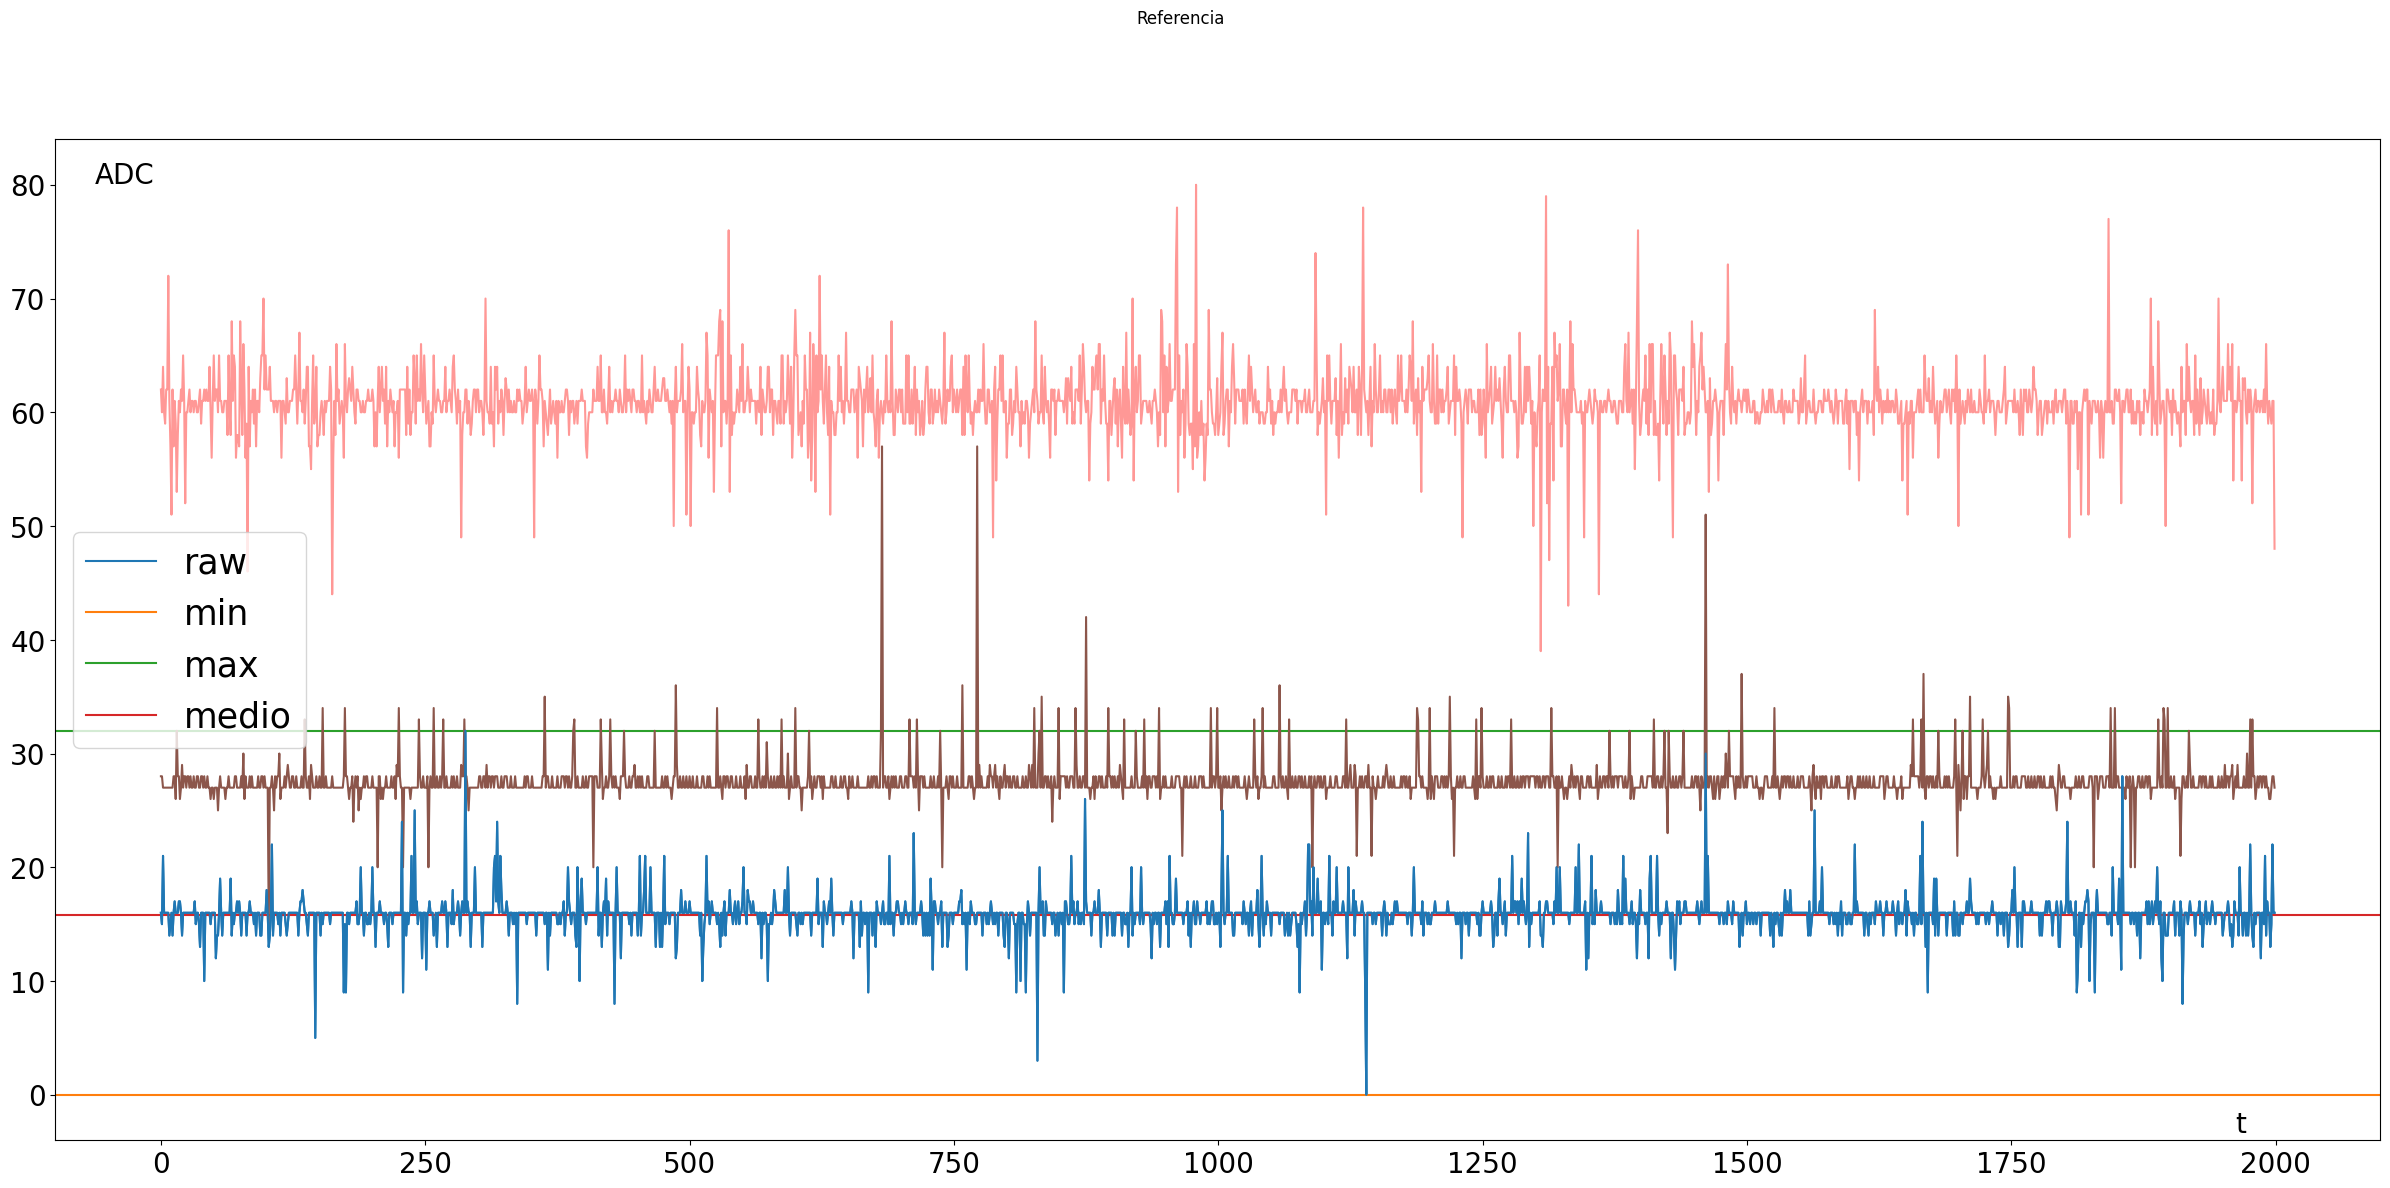

In [27]:
path_file_reference = '../../../results/TC-II-ADC/TC-II-ADC-REF.txt' 
path_file_reference100K = '../../../results/TC-II-ADC/TC-II-ADC-REF100k.txt' 
path_file_referencec121 = '../../../results/TC-II-ADC/TC-II-ADC-REFC121.txt'
file_save = '../../../results/TC-II-ADC/TC-II-ADC-REF.jpg'

reference = np.zeros( (2000,1)) 
voltage_ref = np.zeros((2000,1))
voltage_ref_100k = np.zeros((2000,1))
voltage_ref_c121 = np.zeros((2000,1))

d0,d1,d2 = np.genfromtxt(path_file_reference, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
reference = d2  
min_ref = np.amin(reference) 
max_ref =  np.amax(reference)
mean_ref = np.mean(reference)
voltage_ref = reference*(SOURCE_ADC_VOLTAGE/MAX_VALUE)

d0,d1,d2 = np.genfromtxt(path_file_reference100K, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
voltage_ref_100k = d2  


d0,d1,d2 = np.genfromtxt(path_file_referencec121, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
voltage_ref_c121 = d2  



figref, axref = plt.subplots(figsize=(30,13))
figref.suptitle('Referencia') 

l1=axref.plot(n_samples_adc, reference,label='raw',color='#1f77b4')
l2=axref.axhline(y=min_ref,label='min',color= '#ff7f0e')
l3=axref.axhline(y=max_ref,label='max',color='#2ca02c')
l4=axref.axhline(y=mean_ref,label='medio',color ='#d62728')

axref.tick_params(axis='both', which='major', labelsize=20)
axref.set_xlabel('t',fontsize = 20) 
axref.set_ylabel('ADC',rotation = 0,fontsize = 20) 
axref.xaxis.set_label_coords(0.94,0.03)
axref.yaxis.set_label_coords(0.03,0.95)

axref.legend(fontsize=25)
figref.savefig(file_save) 

l11=axref.plot(n_samples_adc, voltage_ref_c121,label='c121',color='#8c564b')
l1=axref.plot(n_samples_adc, reference,label='raw',color='#1f77b4')
l0=axref.plot(n_samples_adc, voltage_ref_100k,label='ref 100k',color='#ff9896')



# TC-ADC-III: Test de validación diferencia constante. 

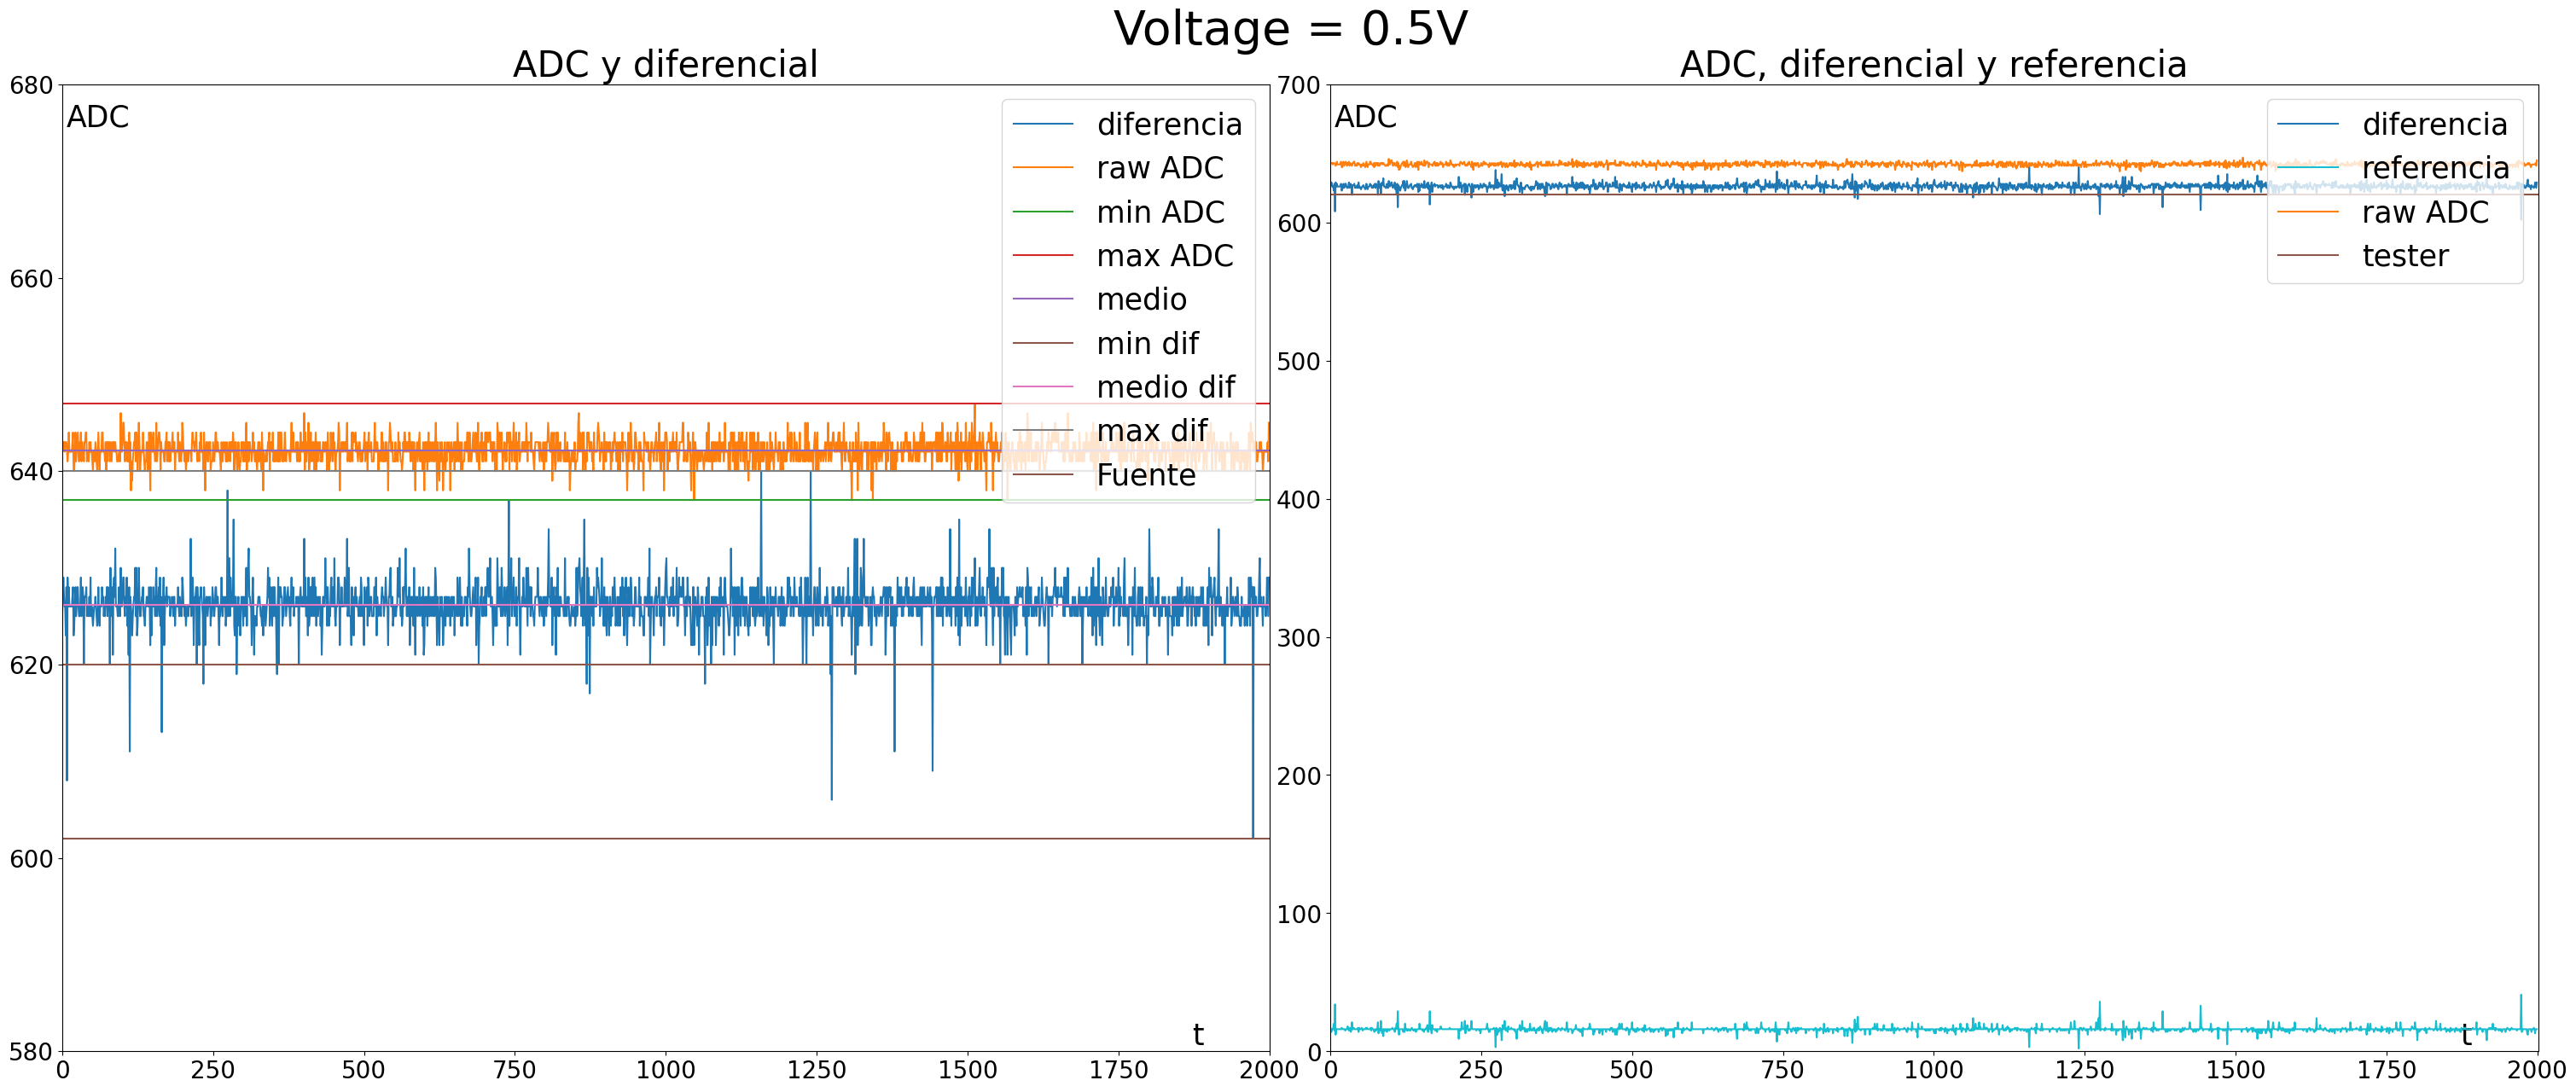

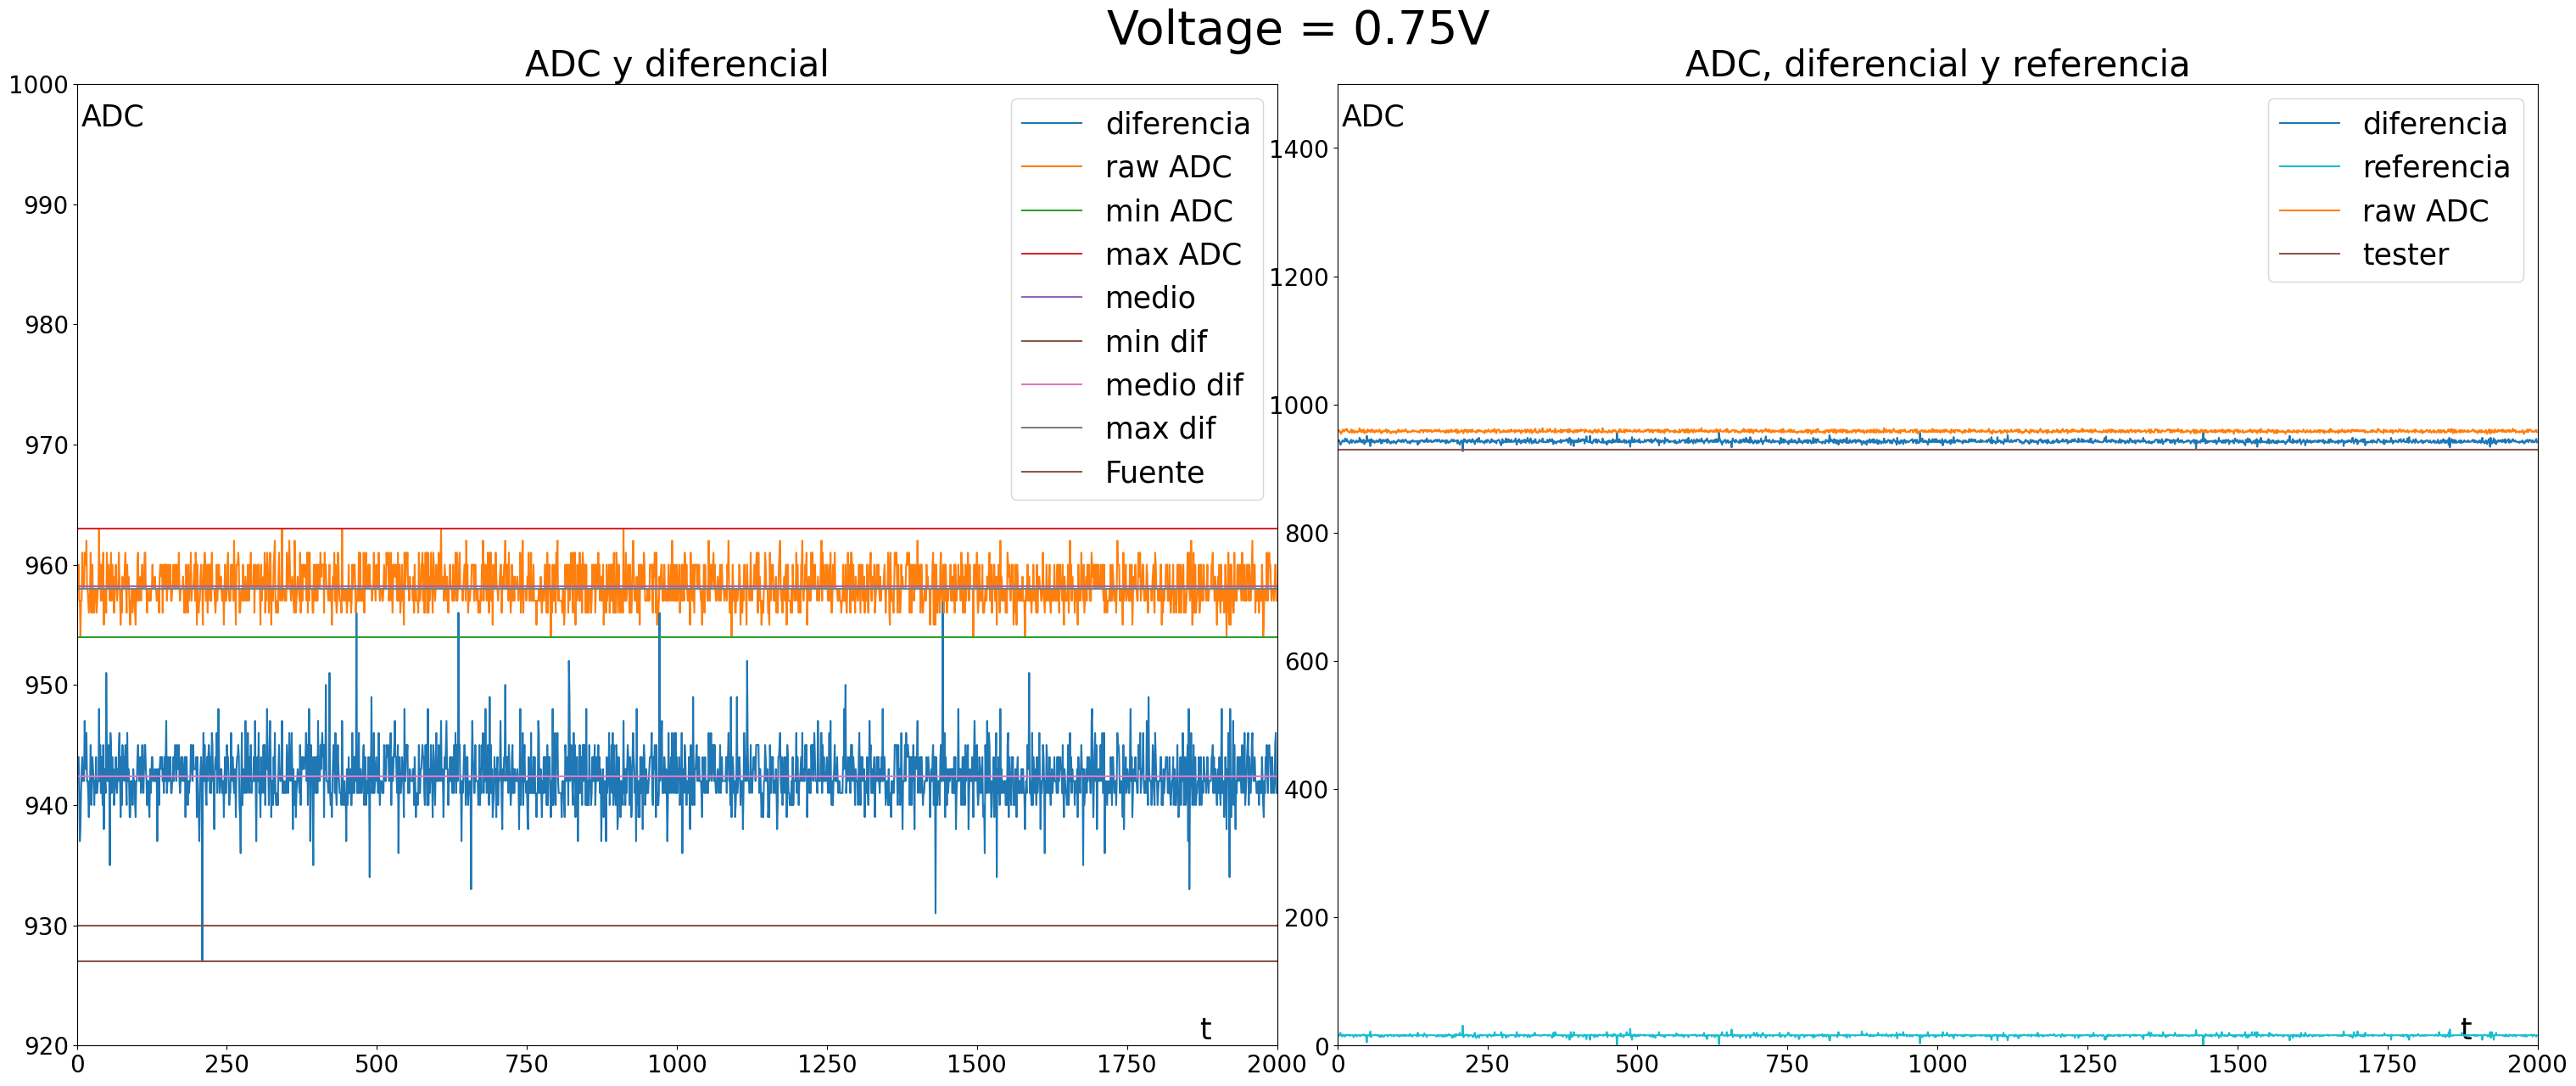

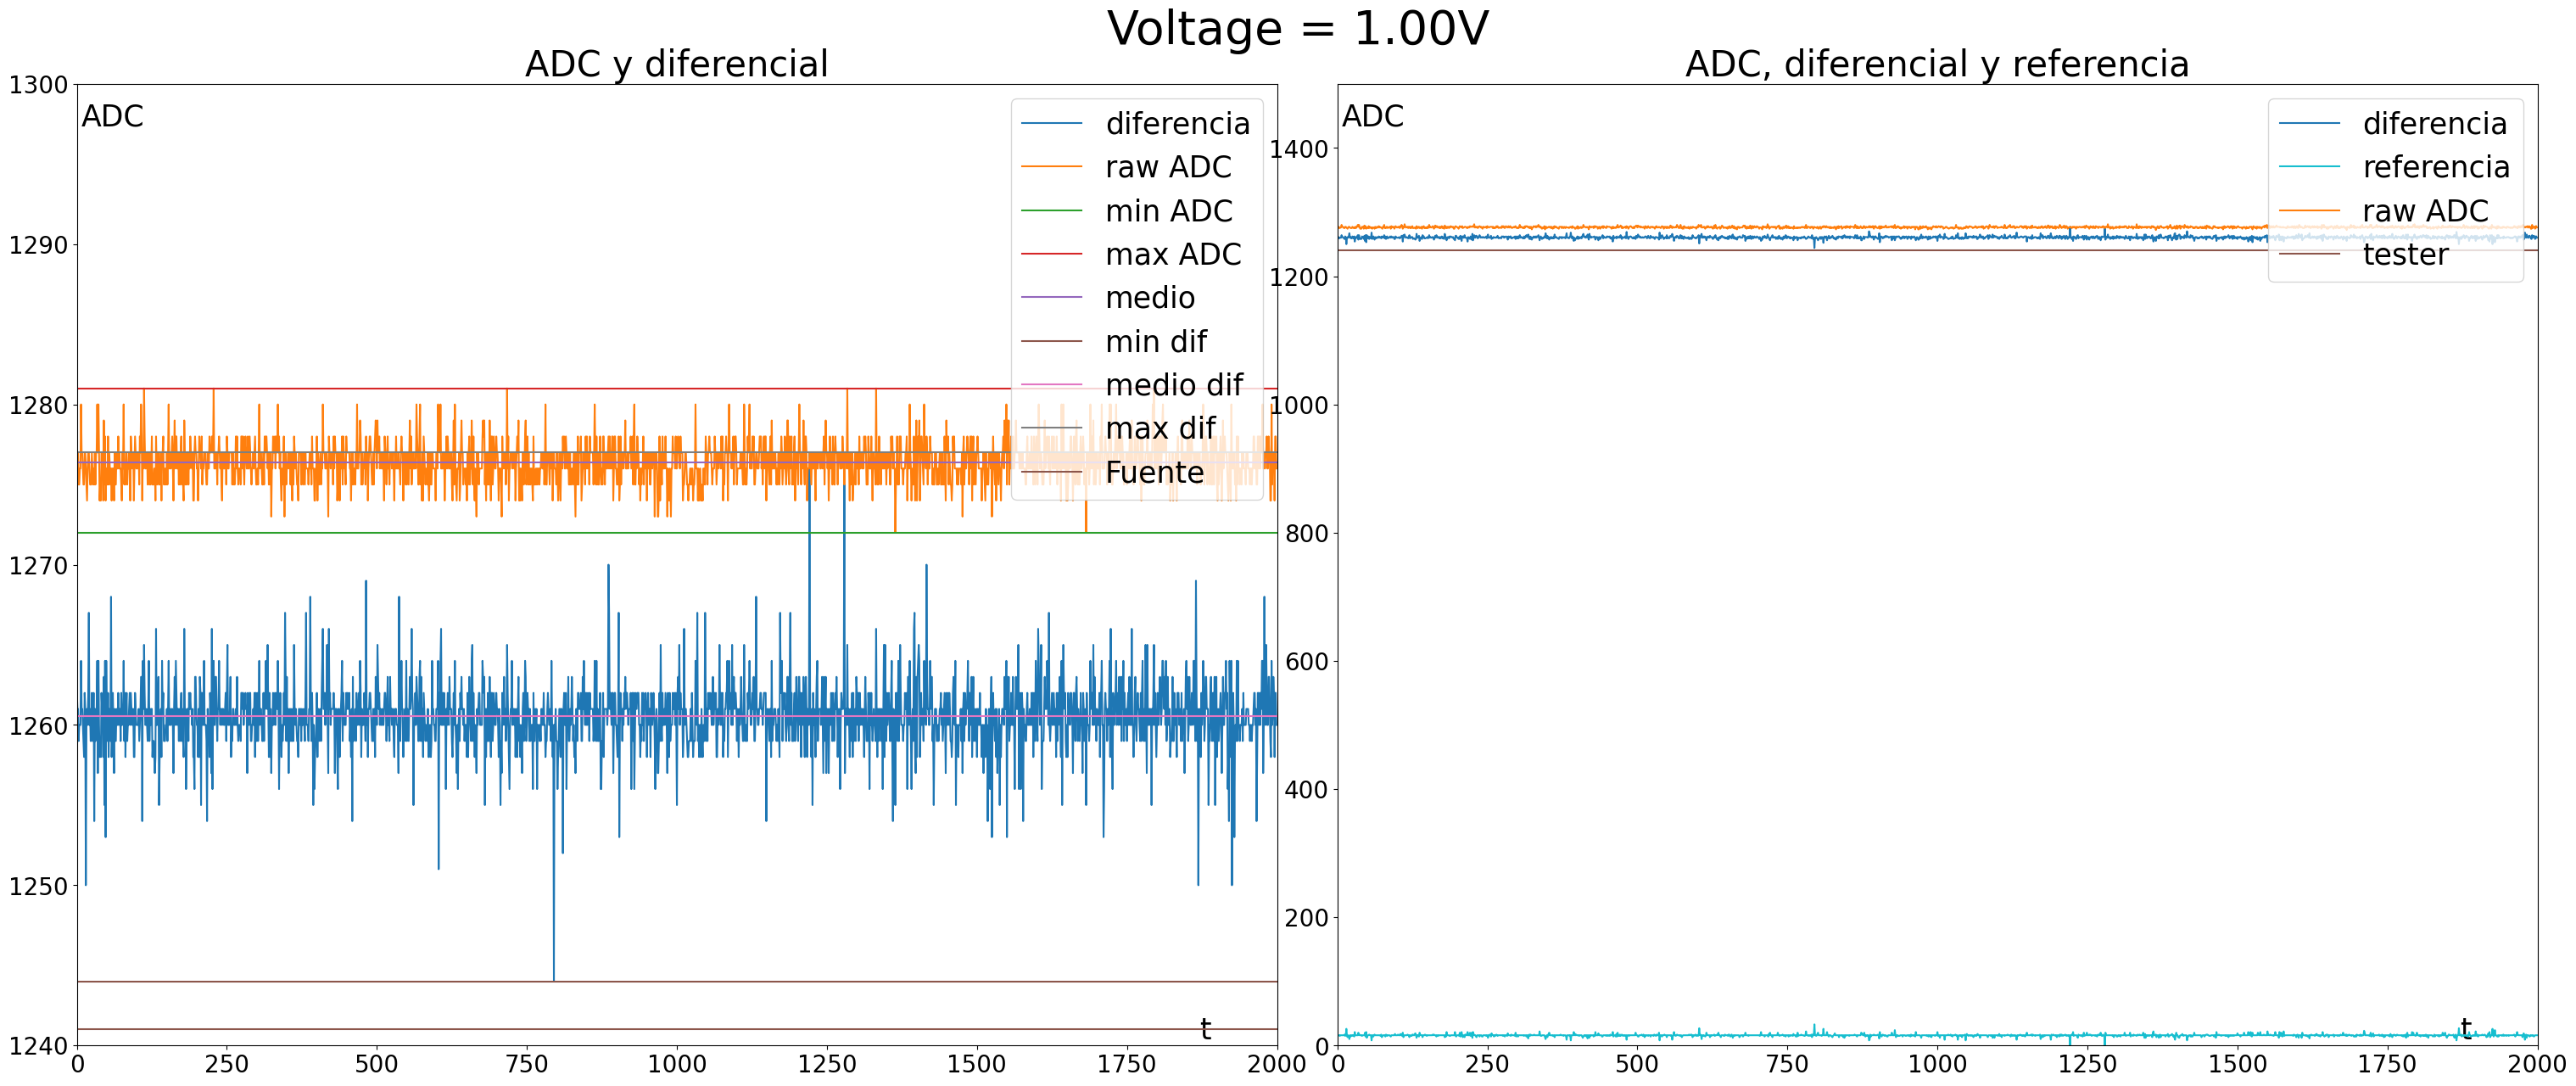

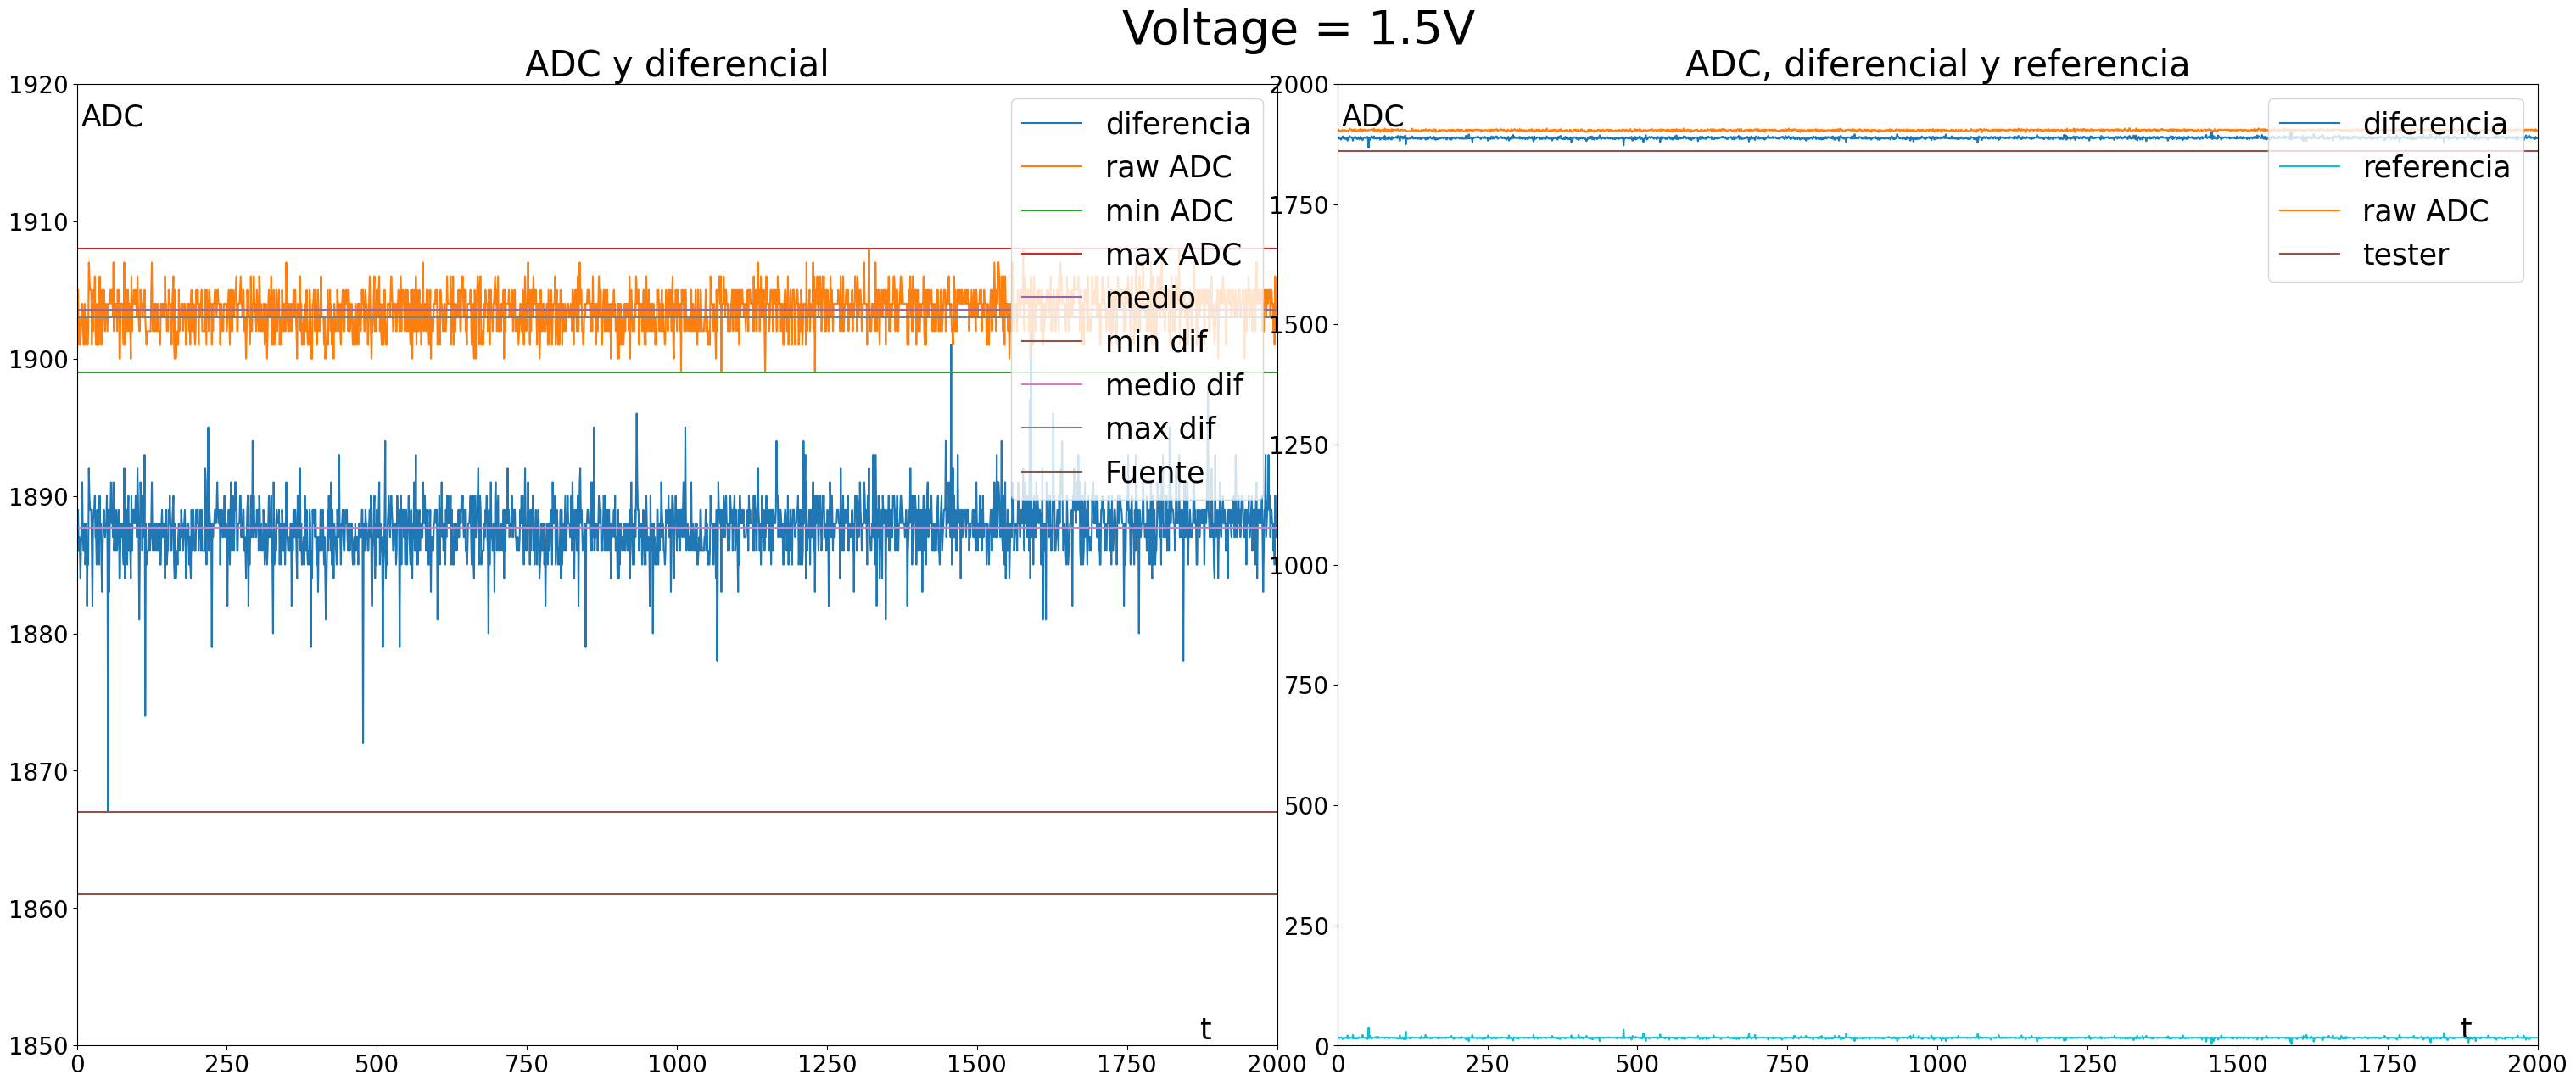

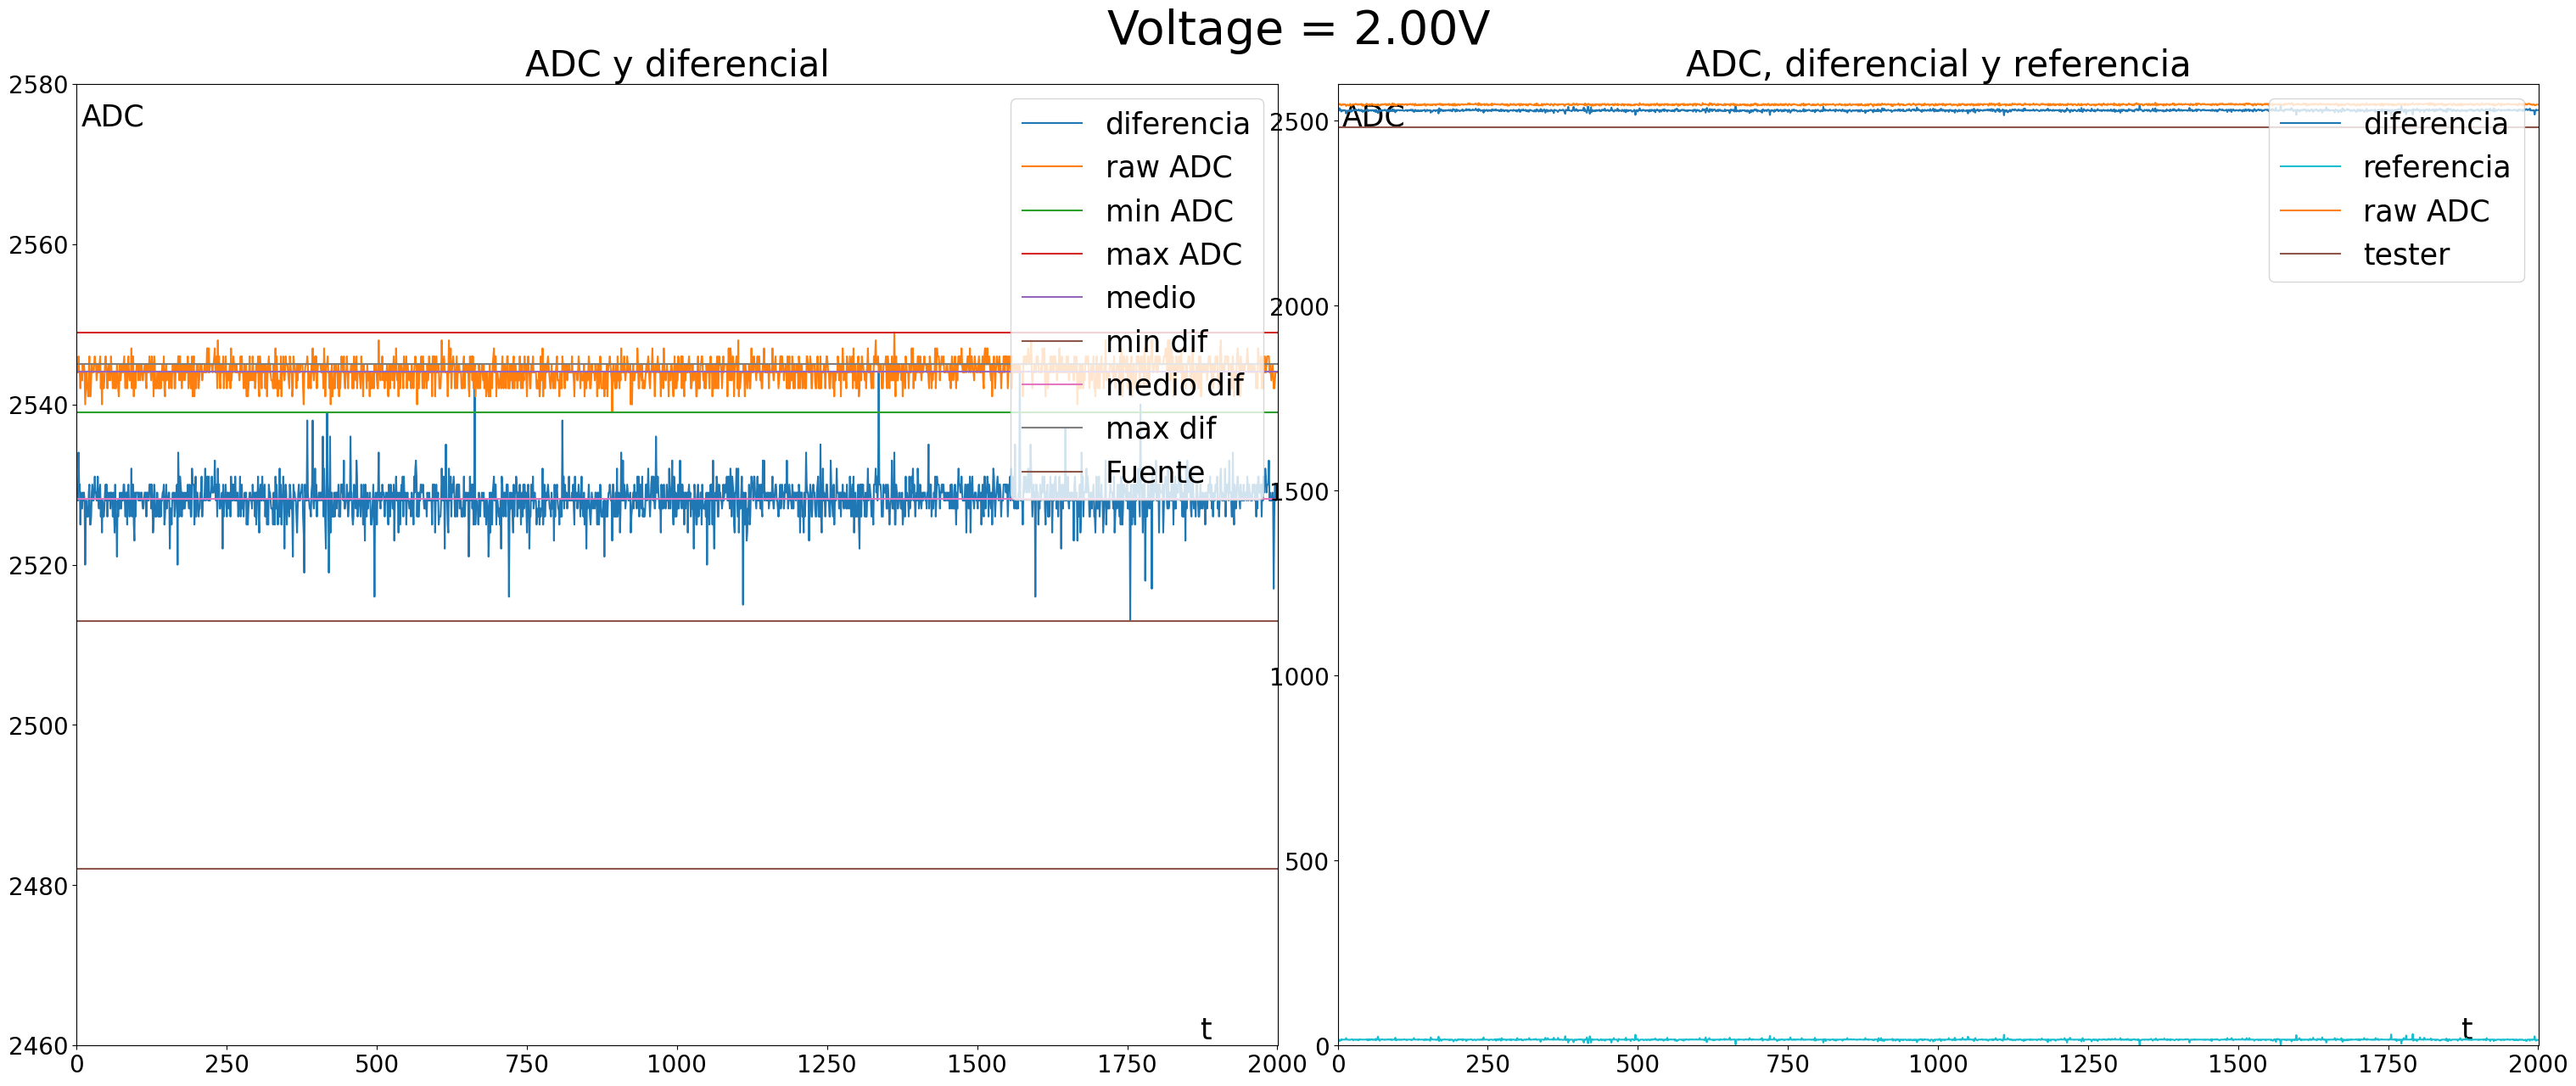

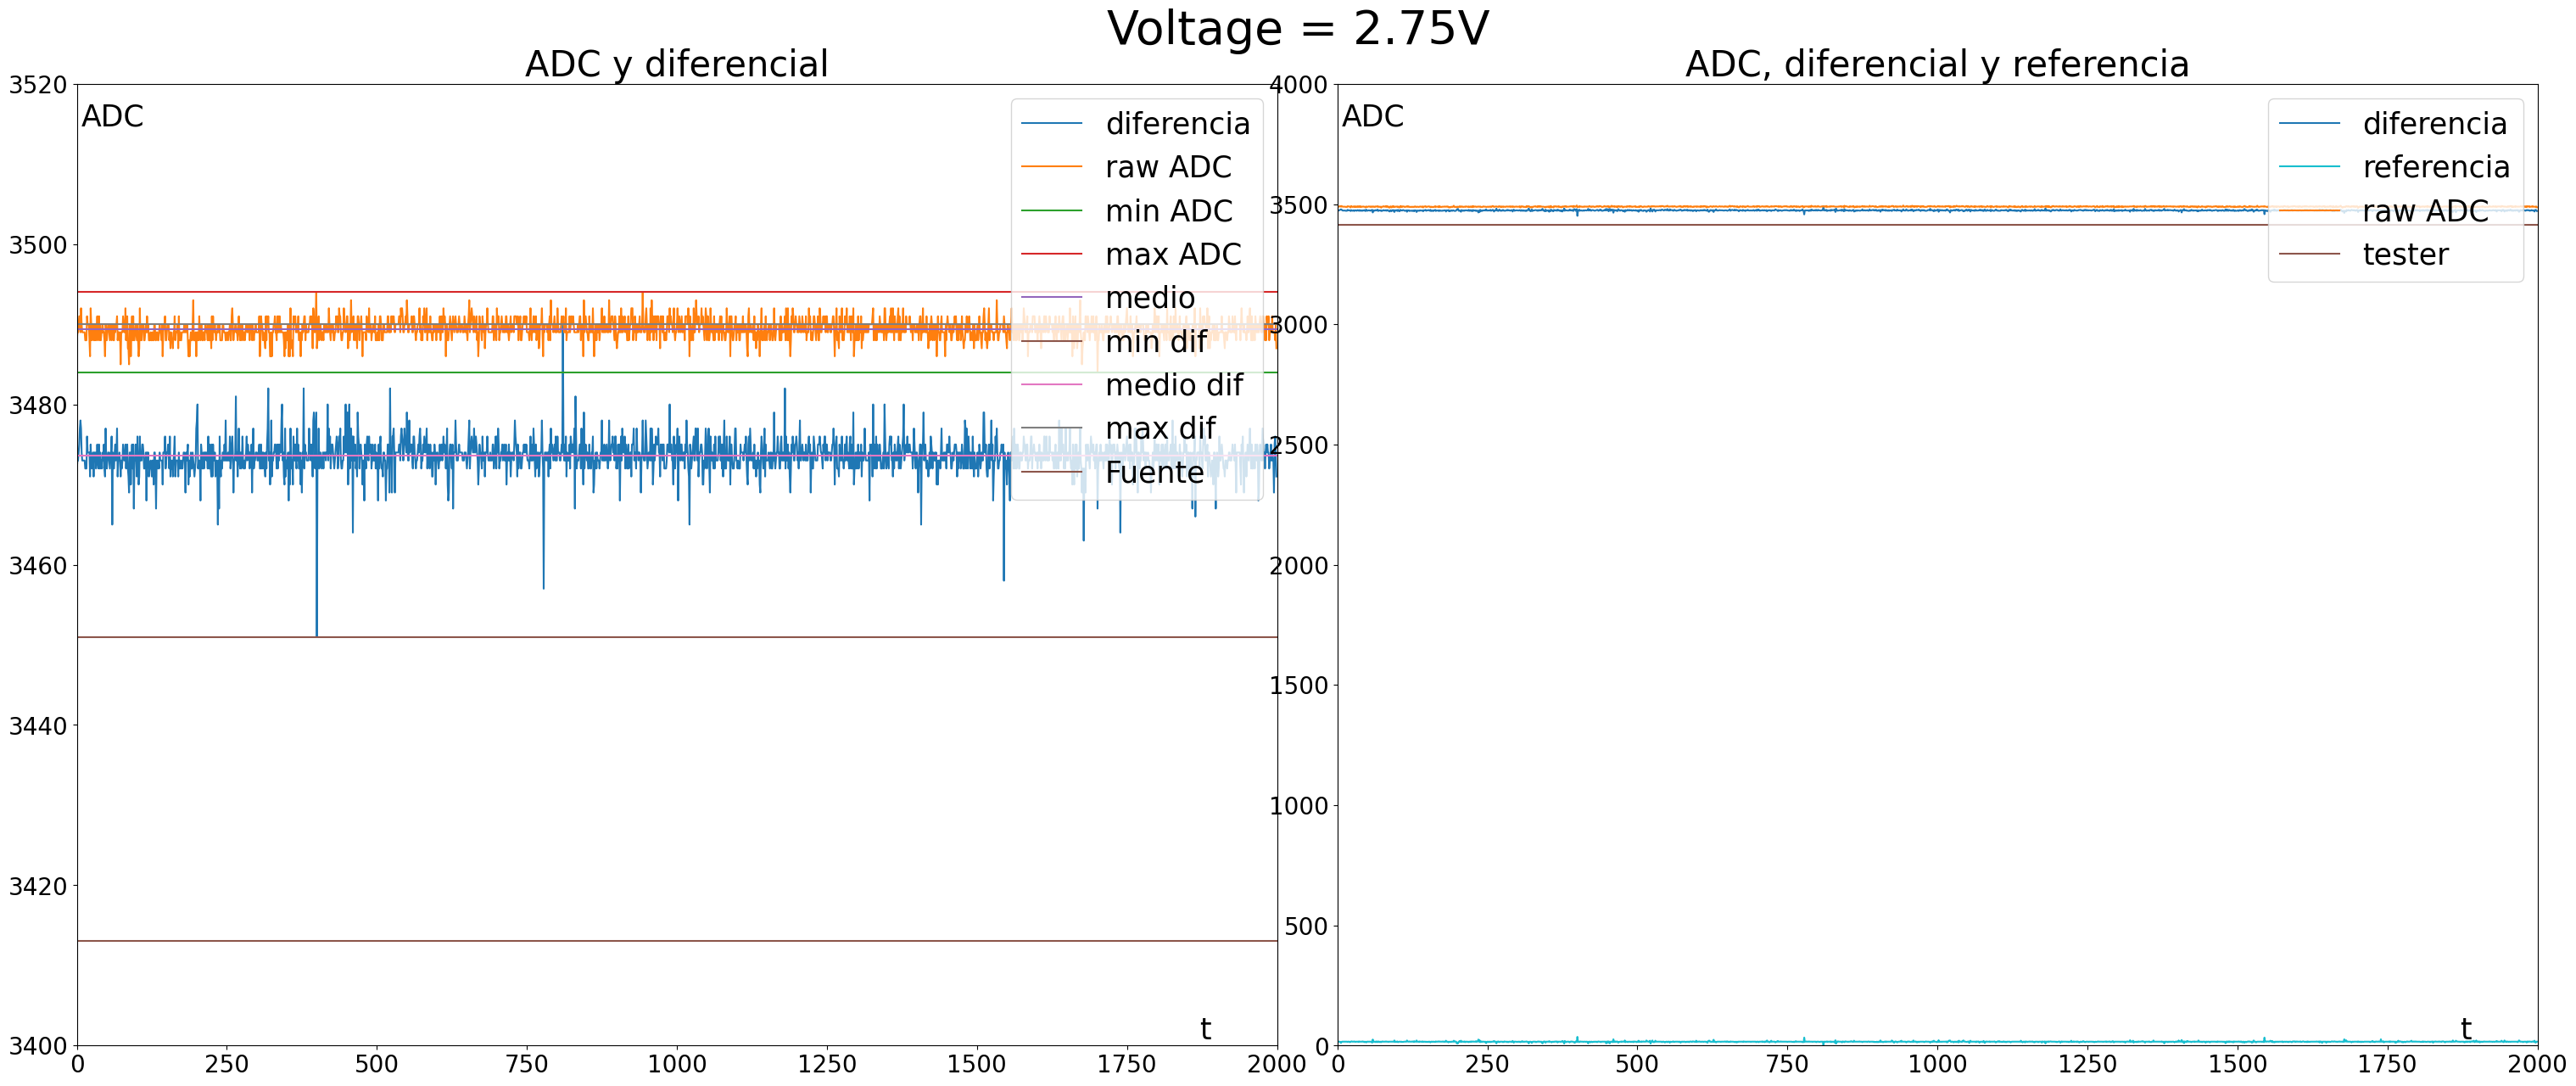

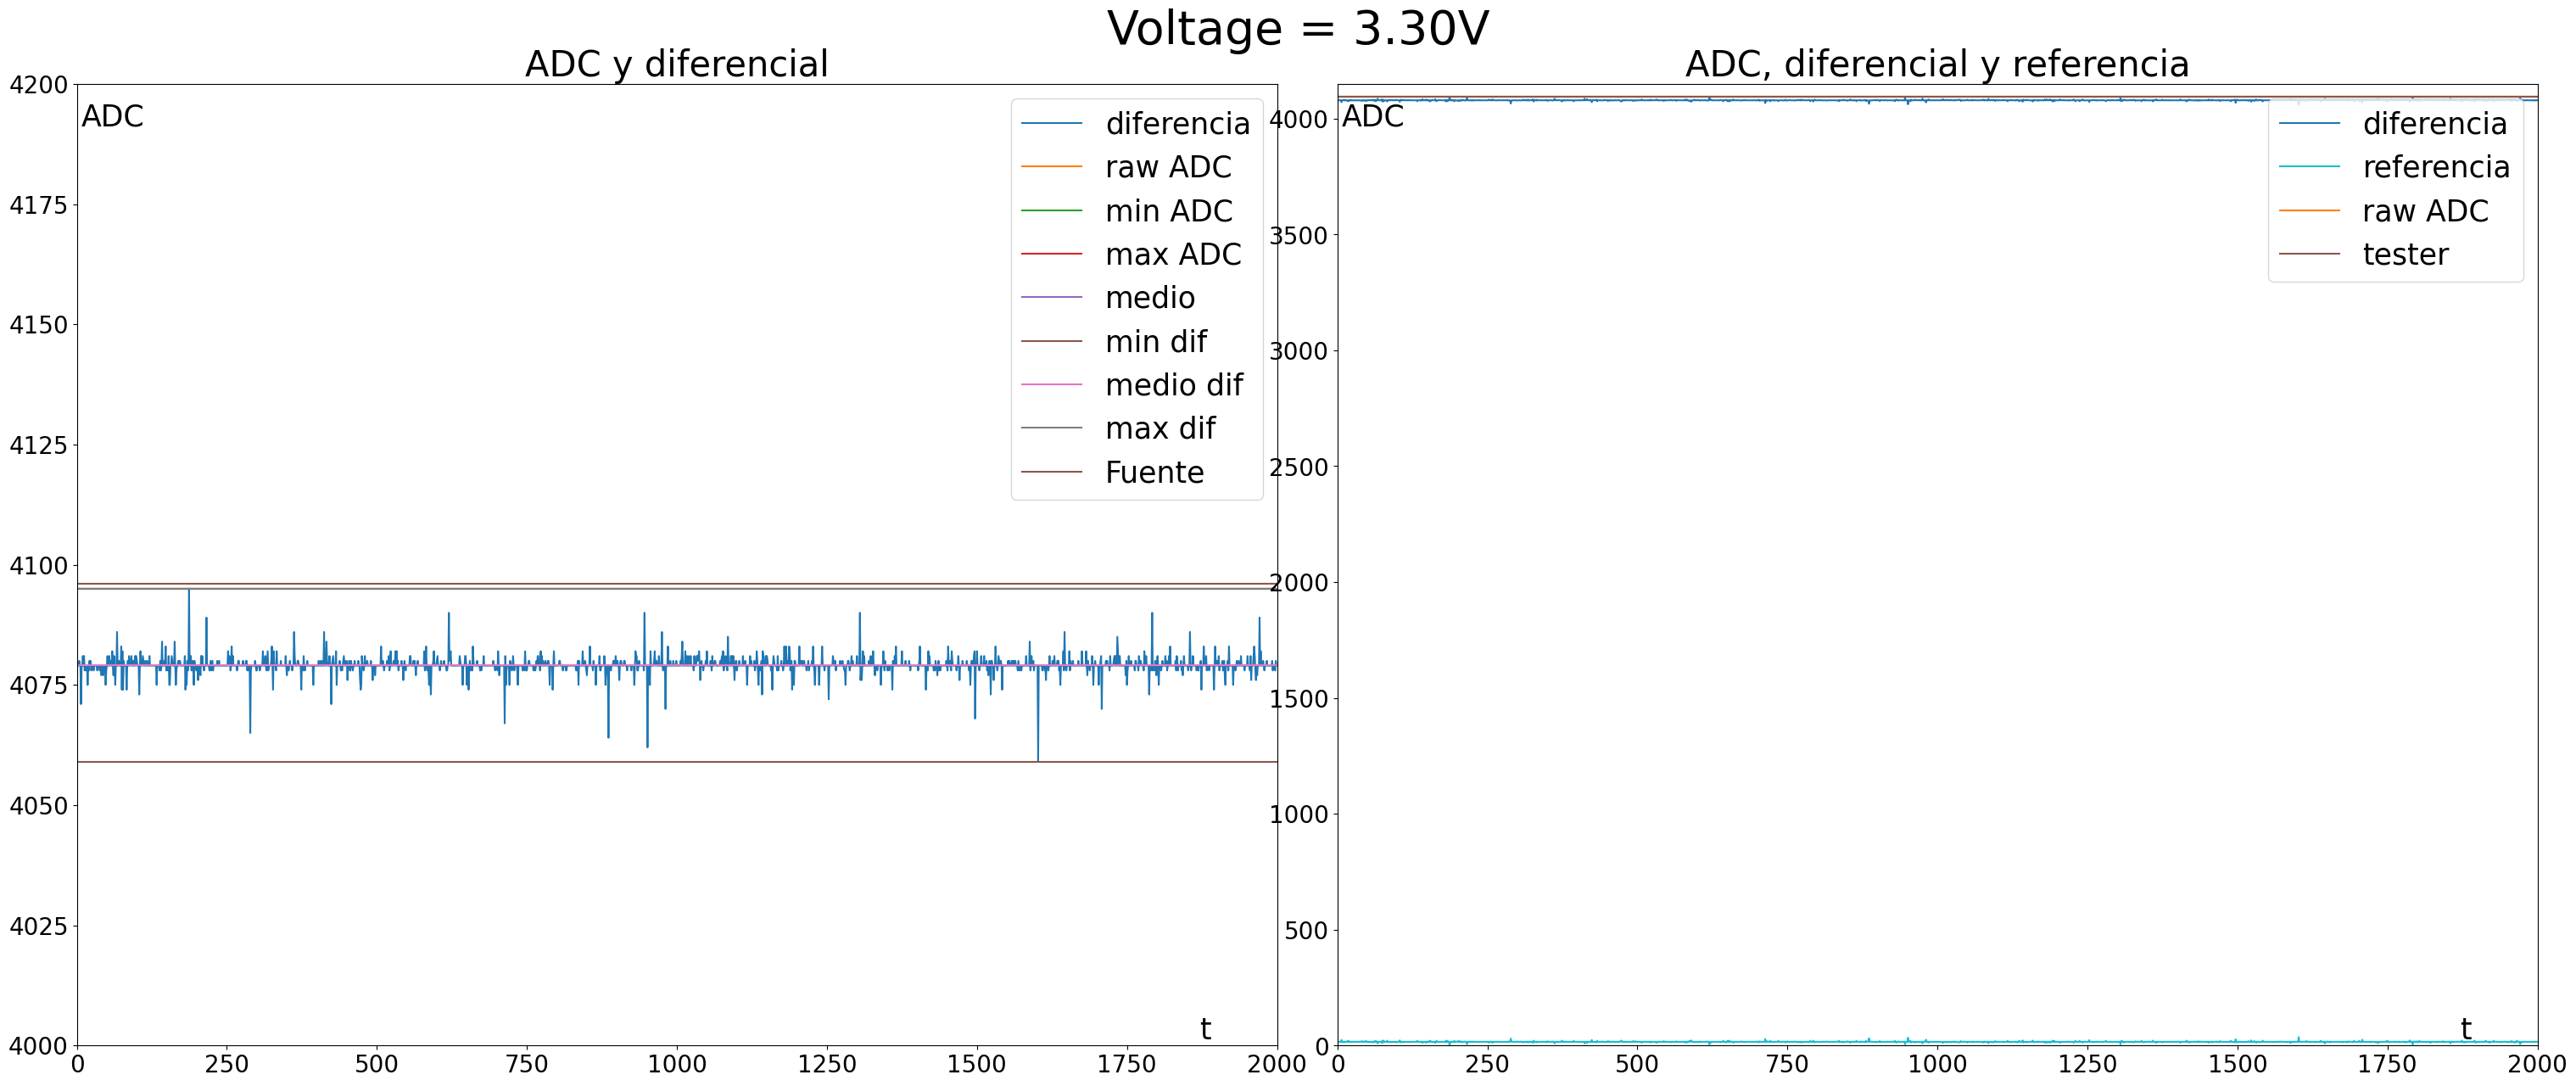

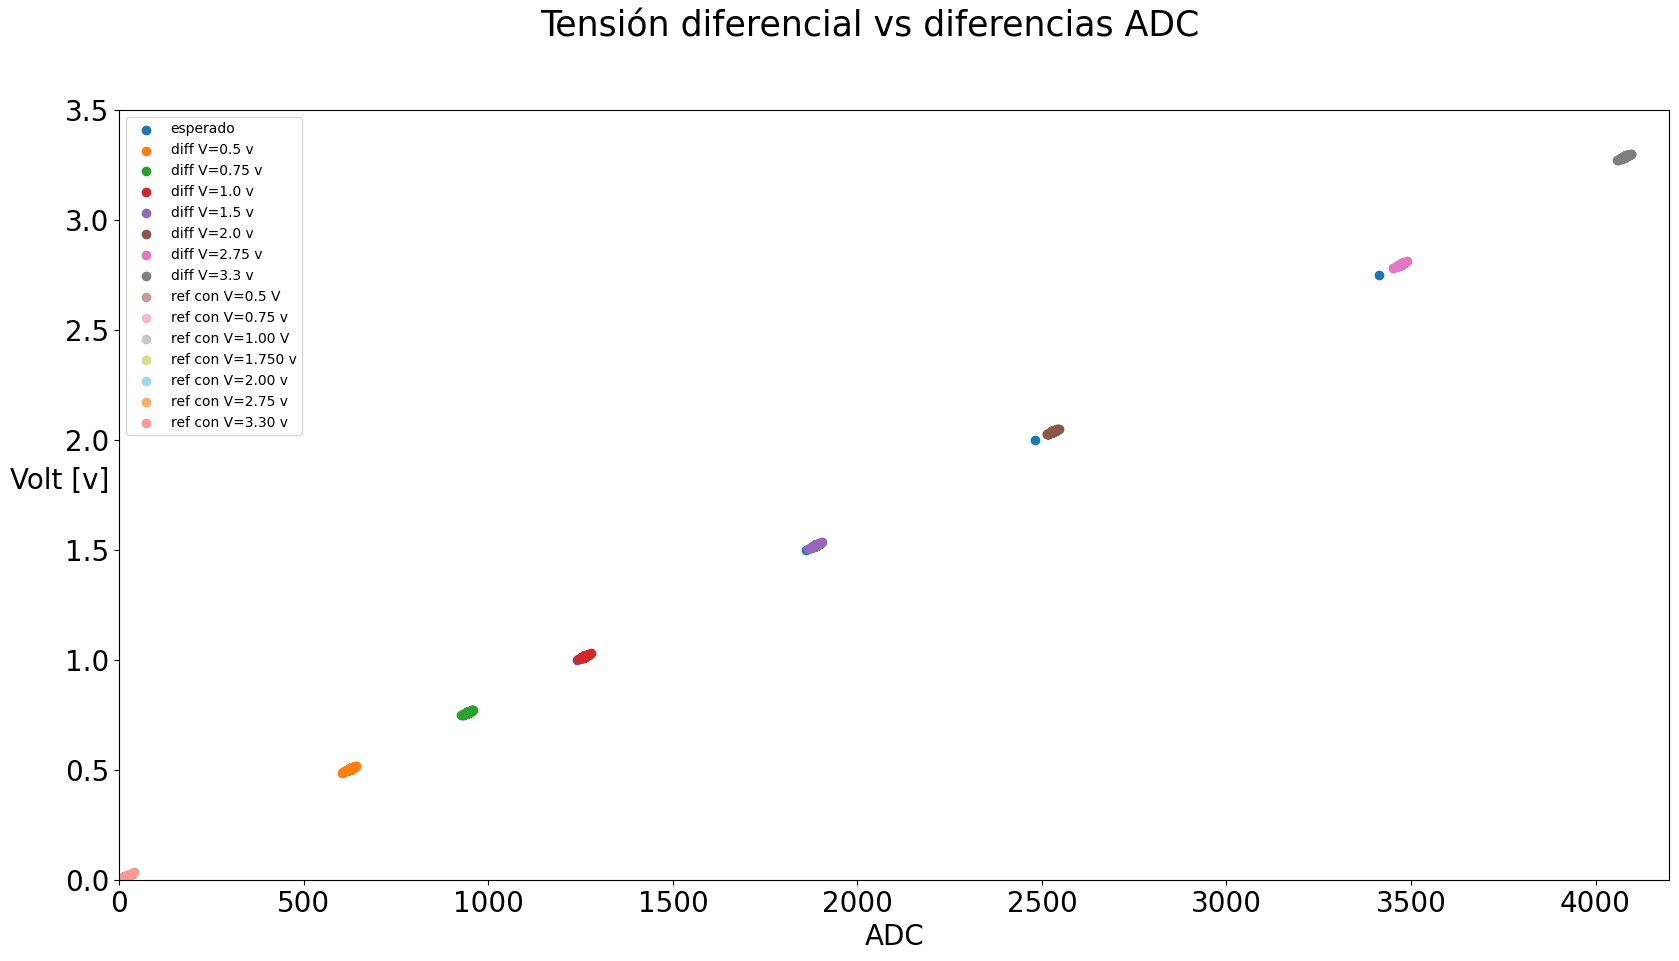

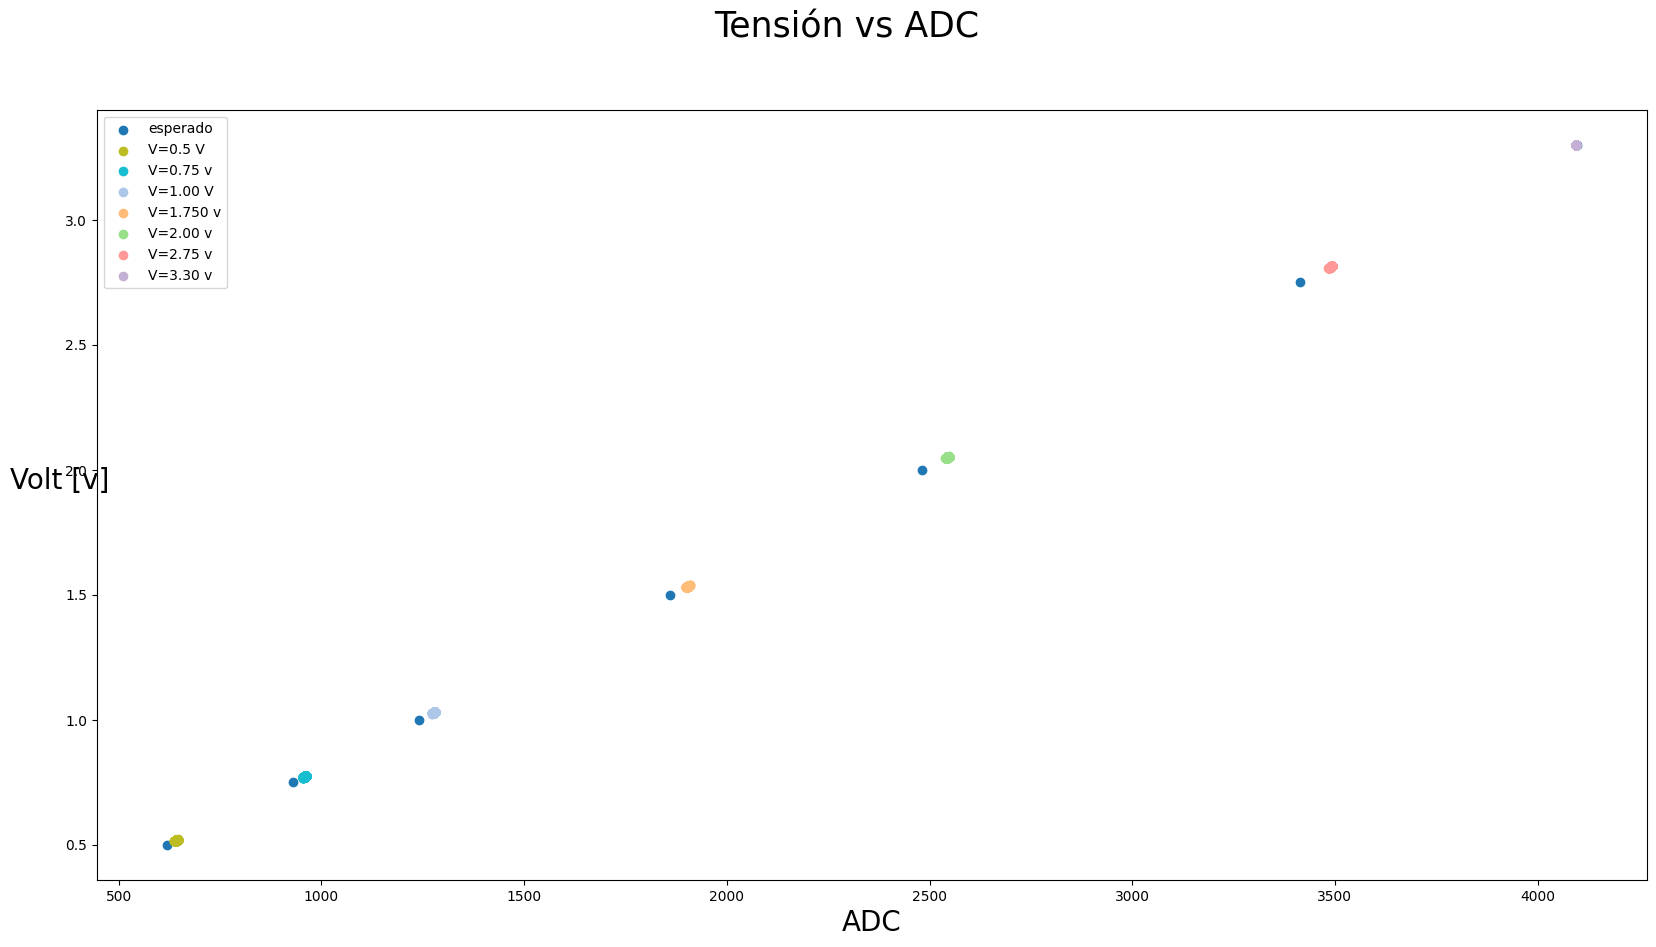

In [37]:
#%matplotlib widget

### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v

path_file = '../../../results/TC-III-ADC/'
list_files_tcIII = ['TC-III-ADC-0.50.txt',
                    'TC-III-ADC-0.75.txt',
                    'TC-III-ADC-1.00.txt',
                    'TC-III-ADC-1.50.txt',
                    'TC-III-ADC-2.00.txt',
                    'TC-III-ADC-2.75.txt',
                    'TC-III-ADC-3.30.txt']

figure_save= [path_file+list_files_tcIII[0]+'.jpg',
              path_file+list_files_tcIII[1]+'.jpg',
              path_file+list_files_tcIII[2]+'.jpg',
              path_file+list_files_tcIII[3]+'.jpg',
              path_file+list_files_tcIII[4]+'.jpg',
              path_file+list_files_tcIII[5]+'.jpg',
              path_file+list_files_tcIII[6]+'.jpg']



voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]
adc_voltage_source_expected = [] 
for l in voltage_source: 
    adc_voltage_source_expected.append(int((4096/3.3)*l)) ## expected raw 


## file commas separate values: index, hex-difference, dec-difference, hex-reference,dec-reference, hex-rawdata, dec-rawdata

n_samples_adc          = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
difference_data        = np.zeros((2000,len(list_files_tcIII)),dtype=int)
difference_data_hex    = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_reference_data     = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_reference_data_hex = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_adc_data           = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_adc_data_hex       = np.zeros((2000,len(list_files_tcIII)),dtype=int)

voltage_diff= np.zeros((2000,len(list_files_tcIII))) 
voltage_raw= np.zeros((2000,len(list_files_tcIII))) 
voltage_reference= np.zeros((2000,len(list_files_tcIII))) 





ADC_mean_dif = []
ADC_max_dif  = []
ADC_min_dif  = [] 
ADC_mean_ref = []
ADC_max_ref  = []
ADC_min_ref  = [] 
ADC_mean_raw = []
ADC_max_raw  = []
ADC_min_raw  = [] 


### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
### d0: index, d1: hex-dif 
for file in list_files_tcIII:    
    index,hex_diff,dec_diff,hex_ref,dec_ref,hex_raw_adc,dec_raw_adc = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    hex_diff=np.array([int(x, 16) for x in hex_diff])
    dec_diff =dec_diff.astype(int) 
    hex_ref = np.array([int(x, 16) for x in hex_ref])
    dec_ref = dec_ref.astype(int)
    hex_raw_adc = np.array([int(x, 16) for x in hex_raw_adc])
    dec_raw_adc = dec_raw_adc.astype(int)      
    ## load values in a column of vector 
    difference_data[:,i] = dec_diff 
    difference_data_hex[:,i] = dec_diff     
    ADC_mean_dif.append(np.mean(dec_diff))
    ADC_max_dif.append(np.amax(dec_diff))
    ADC_min_dif.append(np.amin(dec_diff))
    raw_reference_data[:,i]  = dec_ref
    raw_reference_data_hex[:,i] = hex_ref
    ADC_mean_ref.append(np.mean(dec_ref))
    ADC_max_ref.append(np.amax(dec_ref))
    ADC_min_ref.append(np.amin(dec_ref))
    raw_adc_data_hex[:,i] = hex_raw_adc
    raw_adc_data[:,i] = dec_raw_adc 
    ADC_mean_raw.append(np.mean(dec_raw_adc))
    ADC_max_raw.append(np.amax(dec_raw_adc))
    ADC_min_raw.append(np.amin(dec_raw_adc))
    i = i + 1 



for i in range(0,len(list_files_tcIII)): 
    voltage_diff[:,i] = difference_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    voltage_raw[:,i] = raw_adc_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    voltage_reference[:,i] = raw_reference_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)


### plotting figures ! 
############################### VOLTAGE 0.5V ###############################################################################
index = 0 ## 0.5v 
ax_index = [0,1] 
figDiff05,axdiff05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff05.suptitle('Voltage = 0.5V',fontsize = 40) 
figDiff05.tight_layout(pad=2.0)

l0 = axdiff05[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff05[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff05[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff05[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff05[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff05[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff05[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff05[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff05[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff05[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff05[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff05[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[0]].set_xlim([0,2001]) 
axdiff05[ax_index[0]].set_ylim([580,680]) 
axdiff05[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff05[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[1]].set_xlim([0,2001]) 
axdiff05[ax_index[1]].set_ylim([0,700]) 
figDiff05.savefig(figure_save[index],bbox_inches="tight")
############################### END OF VOLTAGE 0.5V ###############################################################################



################################### VOLTAGE 0.75V ###############################################################################

index = 1 ## 0.5v 
ax_index = [0,1] 
figDiff075,axdiff075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff075.suptitle('Voltage = 0.75V',fontsize = 40) 
figDiff075.tight_layout(pad=2.0)

l0 = axdiff075[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff075[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff075[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff075[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff075[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff075[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff075[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff075[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff075[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff075[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff075[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff075[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff075[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff075[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff075[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff075[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff075[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff075[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff075[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff075[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff075[ax_index[0]].set_xlim([0,2001]) 
axdiff075[ax_index[0]].set_ylim([920,1000]) 
axdiff075[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff075[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff075[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff075[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff075[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff075[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff075[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff075[ax_index[1]].set_xlim([0,2001]) 
axdiff075[ax_index[1]].set_ylim([0,1500]) 
figDiff075.savefig(figure_save[index],bbox_inches="tight")

############################### END OF VOLTAGE 0.75V ###############################################################################




############################### VOLTAGE 1.00V ###############################################################################

index = 2 ## 0.5v 
ax_index = [0,1] 
figDiff100,axdiff100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff100.suptitle('Voltage = 1.00V',fontsize = 40) 
figDiff100.tight_layout(pad=2.0)

l0 = axdiff100[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff100[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff100[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff100[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff100[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff100[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff100[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff100[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff100[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff100[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff100[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff100[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff100[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff100[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff100[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff100[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff100[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff100[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff100[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff100[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff100[ax_index[0]].set_xlim([0,2001]) 
axdiff100[ax_index[0]].set_ylim([1240,1300]) 
axdiff100[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff100[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff100[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff100[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff100[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff100[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff100[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff100[ax_index[1]].set_xlim([0,2001]) 
axdiff100[ax_index[1]].set_ylim([0,1500]) 
figDiff100.savefig(figure_save[index],bbox_inches="tight")

############################### END OF VOLTAGE 1.00V ###############################################################################



############################### VOLTAGE 1.50V ###############################################################################

index = 3 ## 0.5v 
ax_index = [0,1] 
figDiff175,axdiff175 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff175.suptitle('Voltage = 1.5V',fontsize = 40) 
figDiff175.tight_layout(pad=2.0)

l0 = axdiff175[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff175[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff175[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff175[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff175[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff175[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff175[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff175[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff175[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff175[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff175[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff175[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff175[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff175[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff175[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff175[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff175[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff175[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff175[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff175[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff175[ax_index[0]].set_xlim([0,2001]) 
axdiff175[ax_index[0]].set_ylim([1850,1920]) 
axdiff175[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff175[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff175[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff175[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff175[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff175[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff175[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff175[ax_index[1]].set_xlim([0,2001]) 
axdiff175[ax_index[1]].set_ylim([0,2000]) 
figDiff175.savefig(figure_save[index],bbox_inches="tight")

############################### END OF VOLTAGE 1.50V ###############################################################################





############################### VOLTAGE 2.00V ###############################################################################

index = 4 ## 2.00v 
ax_index = [0,1] 
figDiff200,axdiff200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff200.suptitle('Voltage = 2.00V',fontsize = 40) 
figDiff200.tight_layout(pad=2.0)

l0 = axdiff200[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff200[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff200[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff200[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff200[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff200[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff200[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff200[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff200[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff200[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff200[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff200[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff200[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff200[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff200[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff200[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff200[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff200[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff200[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff200[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff200[ax_index[0]].set_xlim([0,2001]) 
axdiff200[ax_index[0]].set_ylim([2460,2580]) 
axdiff200[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff200[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff200[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff200[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff200[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff200[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff200[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff200[ax_index[1]].set_xlim([0,2001]) 
axdiff200[ax_index[1]].set_ylim([0,2600]) 
figDiff200.savefig(figure_save[index],bbox_inches="tight")



############################### END OF VOLTAGE 2.000V ###############################################################################



############################### VOLTAGE 2.75V ###############################################################################

index = 5 ## 2.00v 
ax_index = [0,1] 
figDiff275,axdiff275 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff275.suptitle('Voltage = 2.75V',fontsize = 40) 
figDiff275.tight_layout(pad=2.0)

l0 = axdiff275[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff275[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff275[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff275[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff275[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff275[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff275[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff275[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff275[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff275[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff275[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff275[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff275[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff275[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff275[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff275[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff275[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff275[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff275[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff275[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff275[ax_index[0]].set_xlim([0,2001]) 
axdiff275[ax_index[0]].set_ylim([3400,3520]) 
axdiff275[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff275[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff275[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff275[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff275[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff275[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff275[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff275[ax_index[1]].set_xlim([0,2001]) 
axdiff275[ax_index[1]].set_ylim([0,4000]) 

figDiff275.savefig(figure_save[index],bbox_inches="tight")

############################### END OF VOLTAGE 2.750V ###############################################################################


############################## VOLTAGE 3.30V ###############################################################################

index = 6 ## 2.00v 
ax_index = [0,1] 
figDiff330,axdiff330 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff330.suptitle('Voltage = 3.30V',fontsize = 40) 
figDiff330.tight_layout(pad=2.0)

l0 = axdiff330[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff330[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l2 = axdiff330[ax_index[0]].axhline(y=ADC_min_raw[index],label='min ADC',color= '#2ca02c')
l3 = axdiff330[ax_index[0]].axhline(y=ADC_max_raw[index],label='max ADC',color='#d62728')
l4 = axdiff330[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#9467bd')
l5 = axdiff330[ax_index[0]].axhline(y=ADC_min_dif[index],label='min dif',color ='#8c564b')
l6 = axdiff330[ax_index[0]].axhline(y=ADC_mean_dif[index],label='medio dif',color ='#e377c2')
l7 = axdiff330[ax_index[0]].axhline(y=ADC_max_dif[index],label='max dif',color ='#7f7f7f')
l8 = axdiff330[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='Fuente',color= '#8c564b')

## plot (0,1) 
l0 = axdiff330[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='diferencia',color='#1f77b4')
l1 = axdiff330[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='referencia',color='#17becf')
l2 = axdiff330[ax_index[1]].plot(n_samples_adc, raw_adc_data[:,index],label='raw ADC',color='#ff7f0e')
l3 = axdiff330[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')

#CONFIGURE PLOT 
axdiff330[ax_index[0]].set_title('ADC y diferencial',fontsize = 30) 
axdiff330[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff330[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff330[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff330[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff330[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff330[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff330[ax_index[0]].set_xlim([0,2001]) 
axdiff330[ax_index[0]].set_ylim([4000,4200]) 
axdiff330[ax_index[1]].set_title('ADC, diferencial y referencia',fontsize = 30) 
axdiff330[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff330[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff330[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff330[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff330[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff330[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff330[ax_index[1]].set_xlim([0,2001]) 
axdiff330[ax_index[1]].set_ylim([0,4150]) 
figDiff330.savefig(figure_save[index],bbox_inches="tight")


############################### END OF VOLTAGE 3.30V ###############################################################################






######################################### COMPARE VOLTAGE   ###############################################################
### difference_adc -> voltage 
colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']
## expected vs diff 
figVoltdiff, axdiff = plt.subplots(figsize=(20,10))
figVoltdiff.suptitle('Tensión diferencial vs diferencias ADC',fontsize = 25)

axdiff.set_xlim([0,4200]) 
axdiff.set_ylim([0,3.5]) 
axdiff.scatter(adc_voltage_source_expected,voltage_source,label='esperado',color=colors[0])
axdiff.scatter(difference_data[:,0],voltage_diff[:,0],label='diff V=0.5 v',color=colors[1])
axdiff.scatter(difference_data[:,1],voltage_diff[:,1],label='diff V=0.75 v',color=colors[2])
axdiff.scatter(difference_data[:,2],voltage_diff[:,2],label='diff V=1.0 v',color=colors[3])
axdiff.scatter(difference_data[:,3],voltage_diff[:,3],label='diff V=1.5 v',color=colors[4])
axdiff.scatter(difference_data[:,4],voltage_diff[:,4],label='diff V=2.0 v',color=colors[5])
axdiff.scatter(difference_data[:,5],voltage_diff[:,5],label='diff V=2.75 v',color=colors[6])
axdiff.scatter(difference_data[:,6],voltage_diff[:,6],label='diff V=3.3 v',color=colors[7])



#raw_adc_data[:,i],voltage_raw[:,0]
### reference -> voltage 
axdiff.scatter(raw_reference_data[:,0],voltage_reference[:,0],label='ref con V=0.5 V',color= colors[15])
axdiff.scatter(raw_reference_data[:,1],voltage_reference[:,1],label='ref con V=0.75 v',color=colors[16])
axdiff.scatter(raw_reference_data[:,2],voltage_reference[:,2],label='ref con V=1.00 V',color=colors[17])
axdiff.scatter(raw_reference_data[:,3],voltage_reference[:,3],label='ref con V=1.750 v',color=colors[18])
axdiff.scatter(raw_reference_data[:,4],voltage_reference[:,4],label='ref con V=2.00 v',color=colors[19])
axdiff.scatter(raw_reference_data[:,5],voltage_reference[:,5],label='ref con V=2.75 v',color=colors[20])
axdiff.scatter(raw_reference_data[:,6],voltage_reference[:,6],label='ref con V=3.30 v',color=colors[21])
axdiff.tick_params(axis='both', which='major', labelsize=20)
axdiff.set_xlabel('ADC',fontsize = 20)
axdiff.set_ylabel('Volt [v]',fontsize = 20,rotation = 0 )


axdiff.legend()


figVoltdiff.savefig(path_file+'compare_volt.jpg',bbox_inches="tight")



figVoltraw, axraw = plt.subplots(figsize=(20,10))
figVoltraw.suptitle('Tensión vs ADC',fontsize = 25)
axraw.scatter(adc_voltage_source_expected,voltage_source,label='esperado',color=colors[0])
axraw.scatter(raw_adc_data[:,0],voltage_raw[:,0],label='V=0.5 V',color= colors[8])
axraw.scatter(raw_adc_data[:,1],voltage_raw[:,1],label='V=0.75 v',color=colors[9])
axraw.scatter(raw_adc_data[:,2],voltage_raw[:,2],label='V=1.00 V',color=colors[10])
axraw.scatter(raw_adc_data[:,3],voltage_raw[:,3],label='V=1.750 v',color=colors[11])
axraw.scatter(raw_adc_data[:,4],voltage_raw[:,4],label='V=2.00 v',color=colors[12])
axraw.scatter(raw_adc_data[:,5],voltage_raw[:,5],label='V=2.75 v',color=colors[13])
axraw.scatter(raw_adc_data[:,6],voltage_raw[:,6],label='V=3.30 v',color=colors[14])
axraw.set_xlabel('ADC',fontsize = 20)
axraw.set_ylabel('Volt [v]',fontsize = 20,rotation = 0 )

axraw.legend()

figVoltraw.savefig(path_file+'compare_raw.jpg',bbox_inches="tight")



### referencia   -> voltage 





In [8]:
## GENERATE A REPORT TEST 
### generate a table report 




# TC-ADC-IV: Test de relación ángulo-tensión 

In [ ]:
import numpy as np 
import matplotlib.pylab as plt

adc_teorical_values = np.arange(0,4096,1.0,dtype=float)  
## values expected 
angle_vertical = (90.0/4095)*(adc_teorical_values - 0)
angle_hor = (360.0/4096)*(adc_teorical_values - 0)

figTeorAng,axang = plt.subplots(nrows = 1 , ncols = 2, figsize = (20,5)) 
figTeorAng.suptitle('relación agulo tension NZ') 
axang[0].set_title('angulo vertical') 
axang[0].plot(adc_teorical_values,angle_vertical) 
axang[0].set_xlabel('ADC') 
axang[0].set_ylabel(r'$\theta_{ver}$',rotation=0,fontsize= 20) 
axang[1].plot(adc_teorical_values,angle_hor) 
axang[1].set_title('angulo horizontal')   

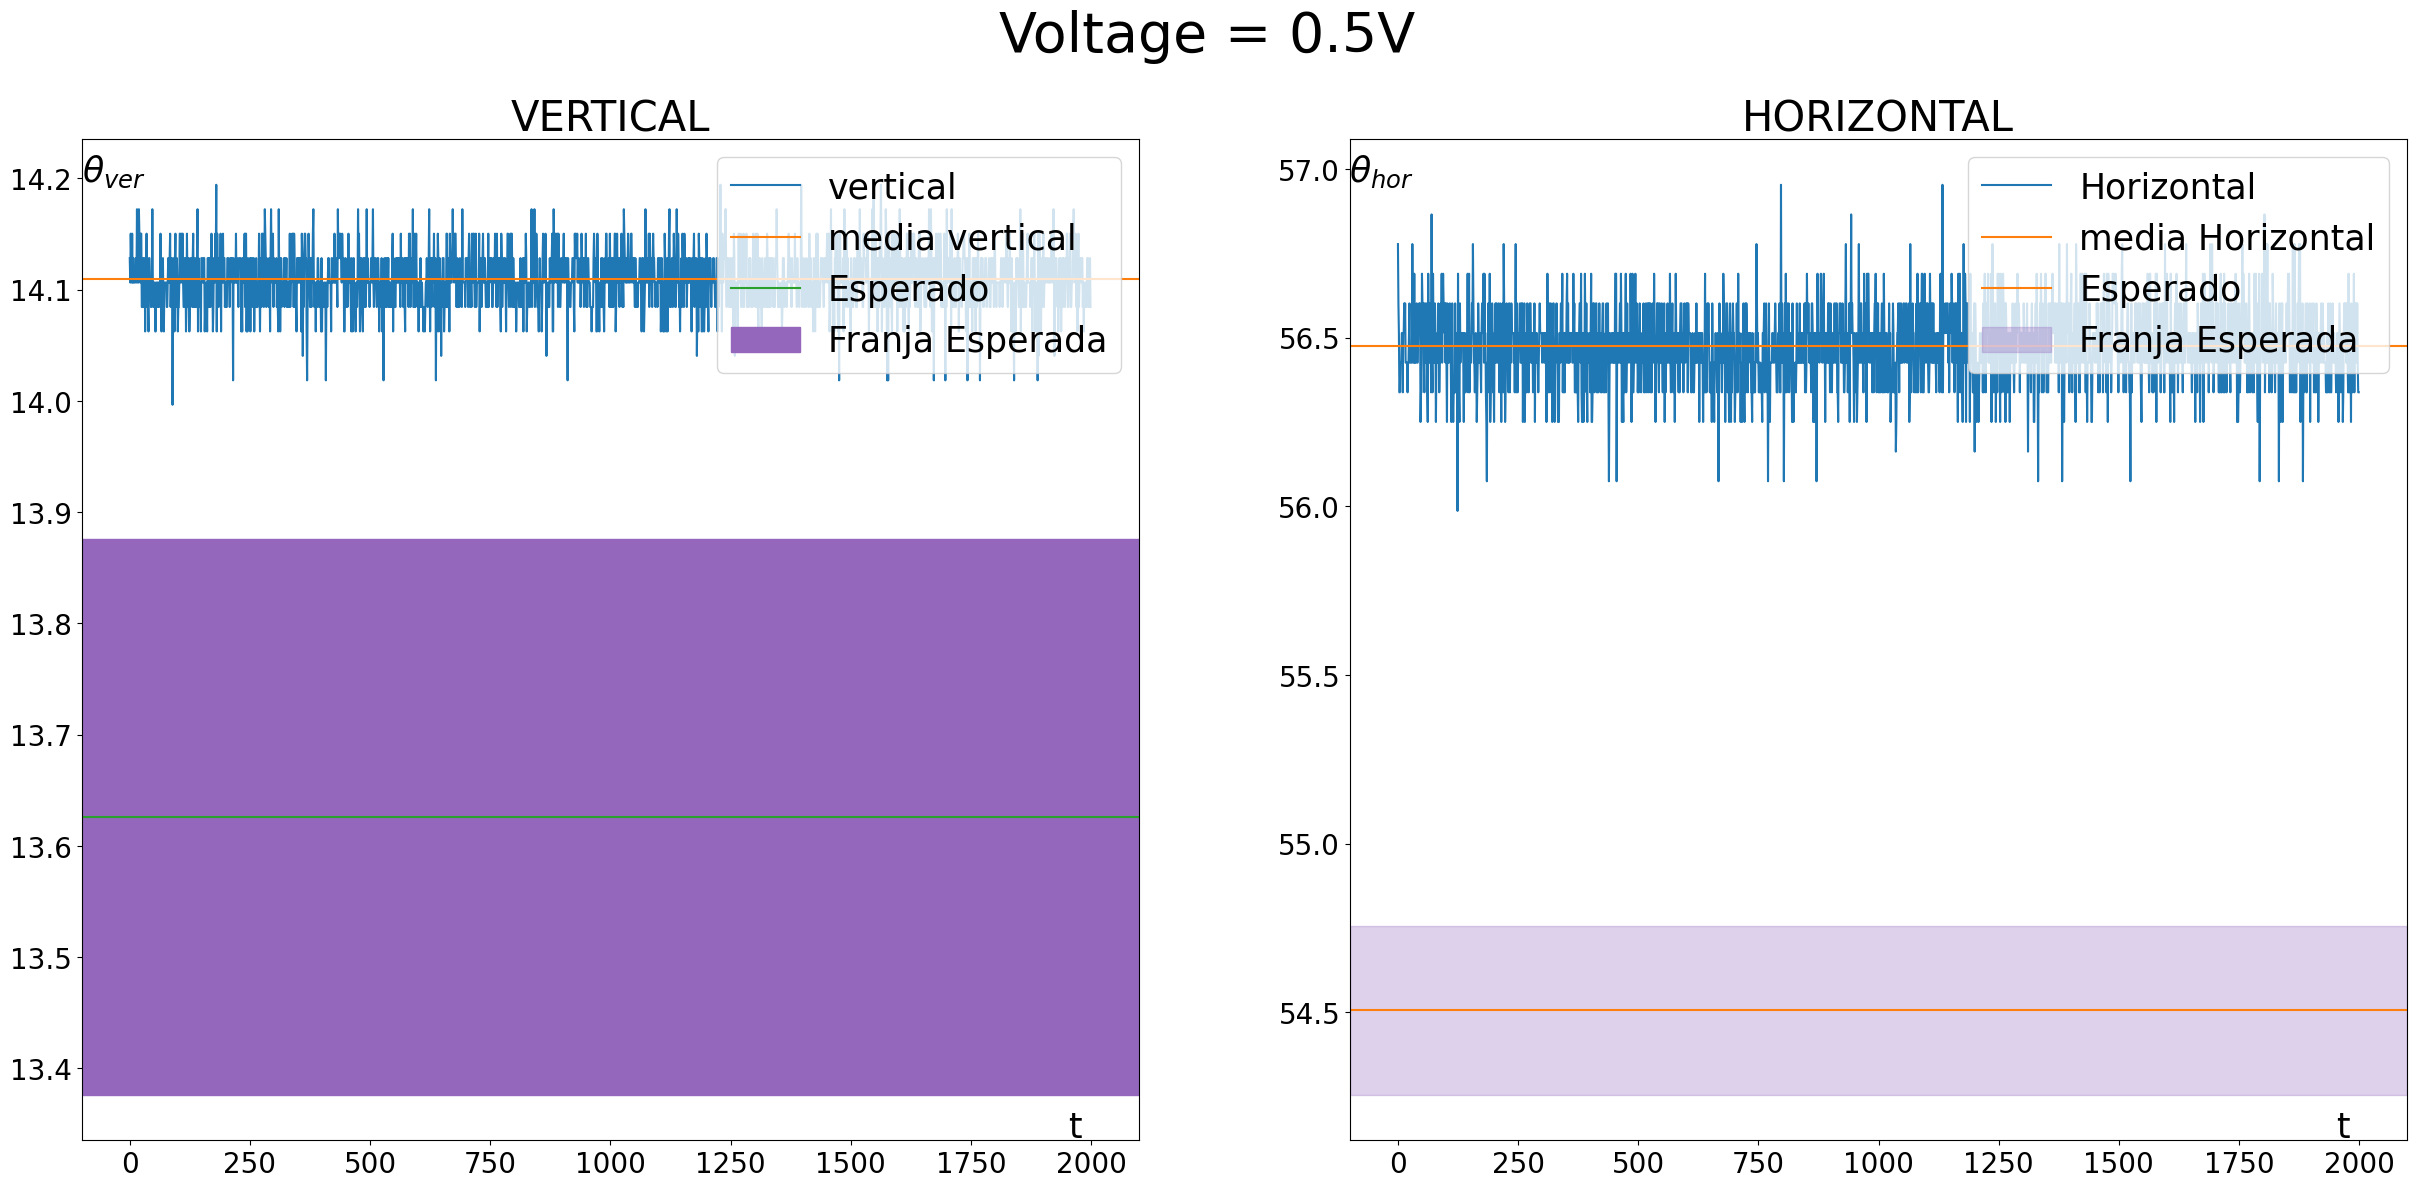

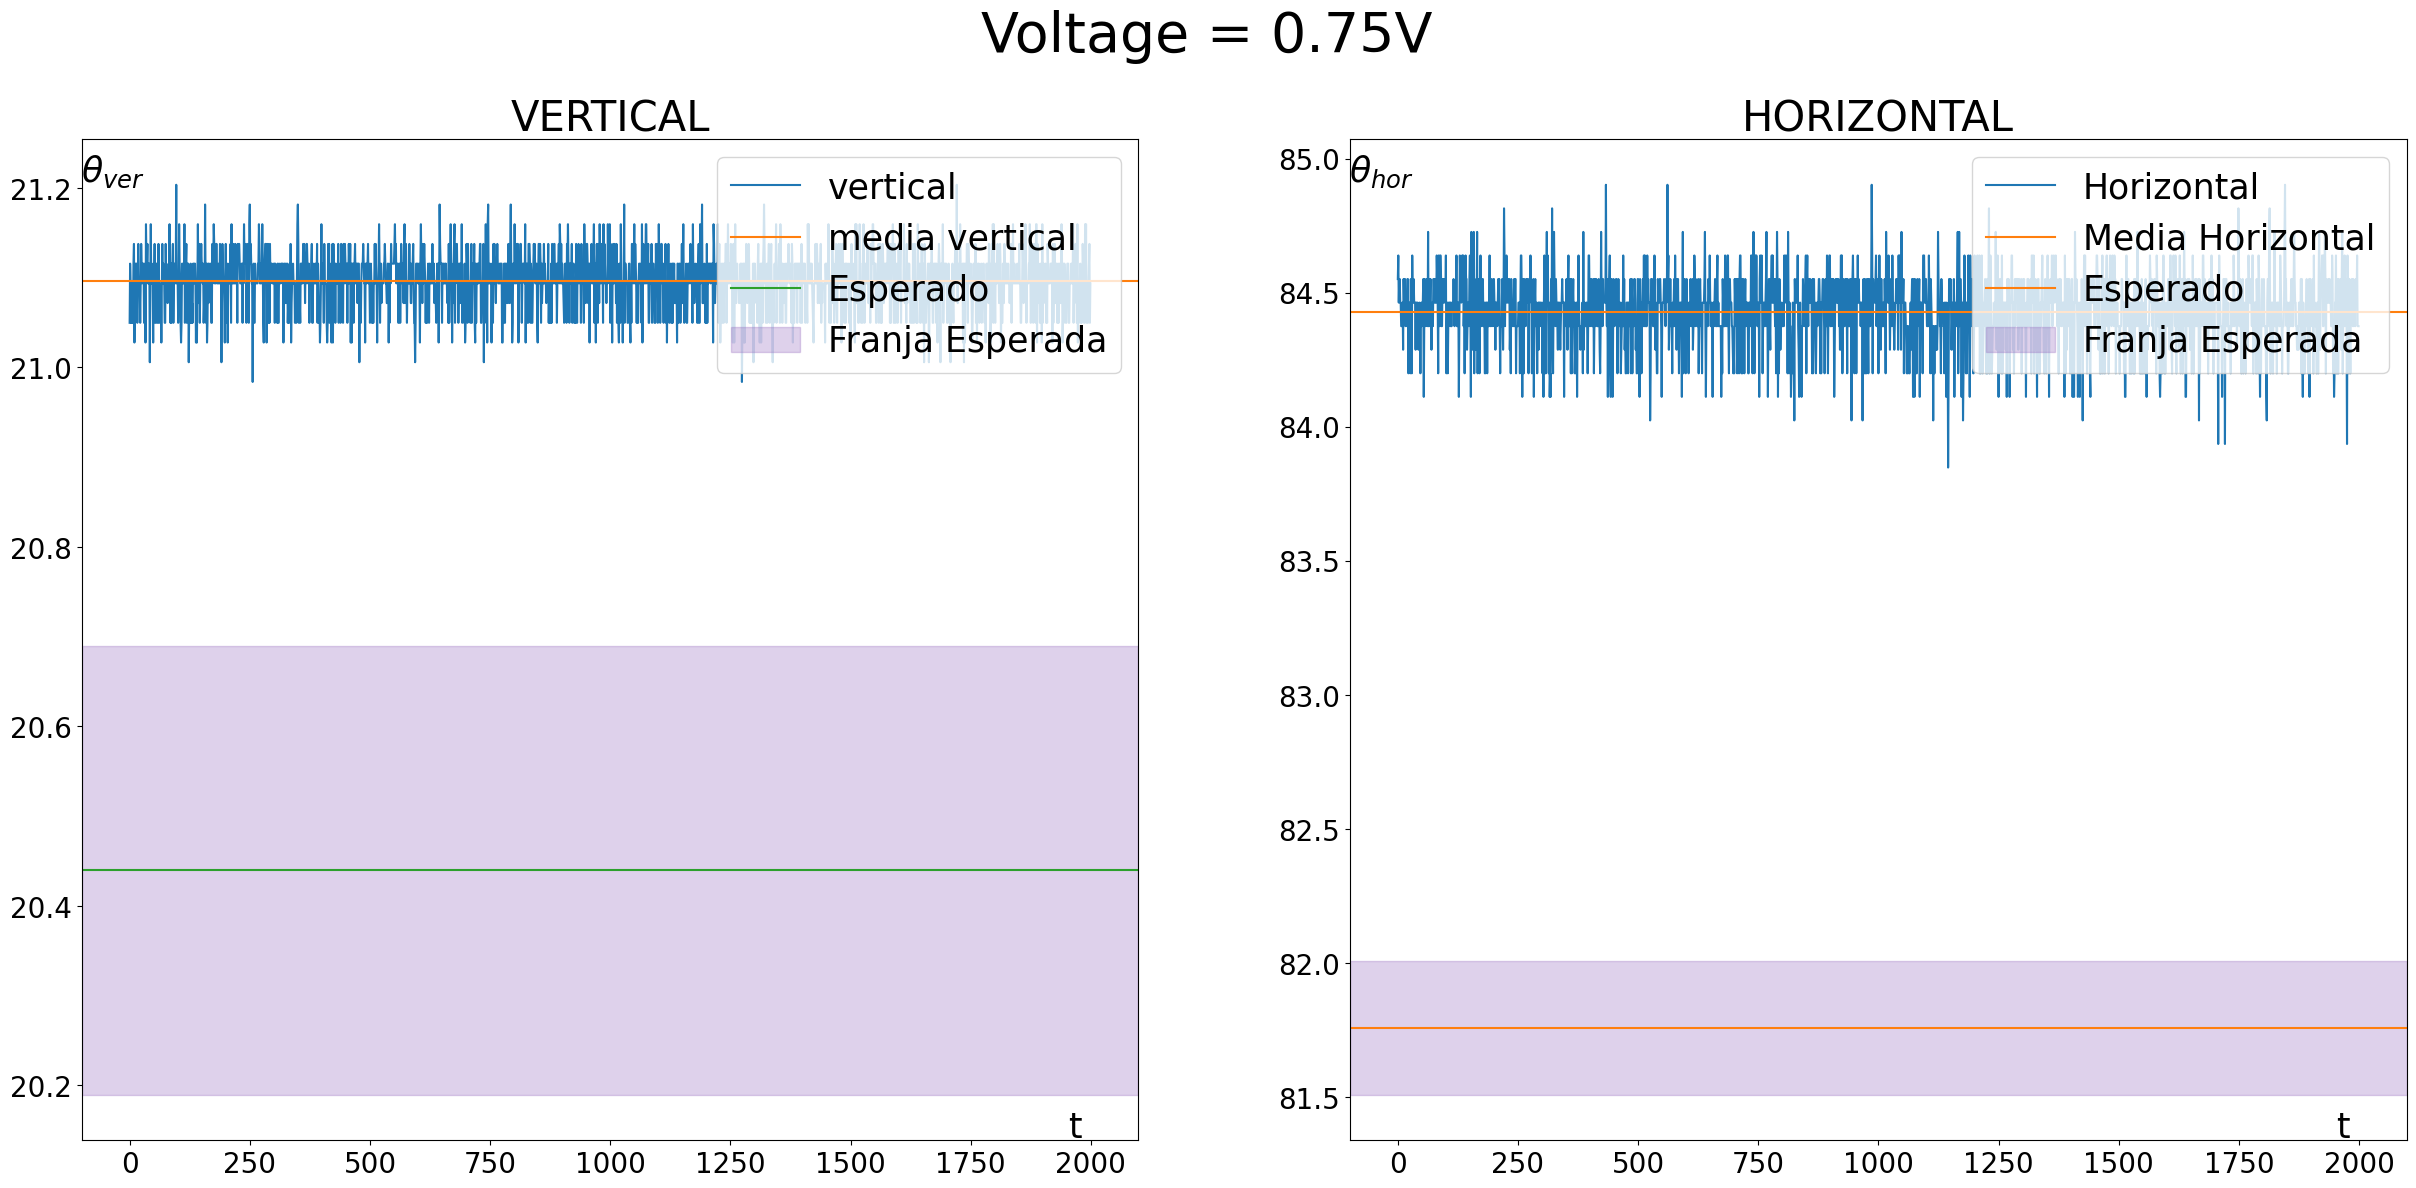

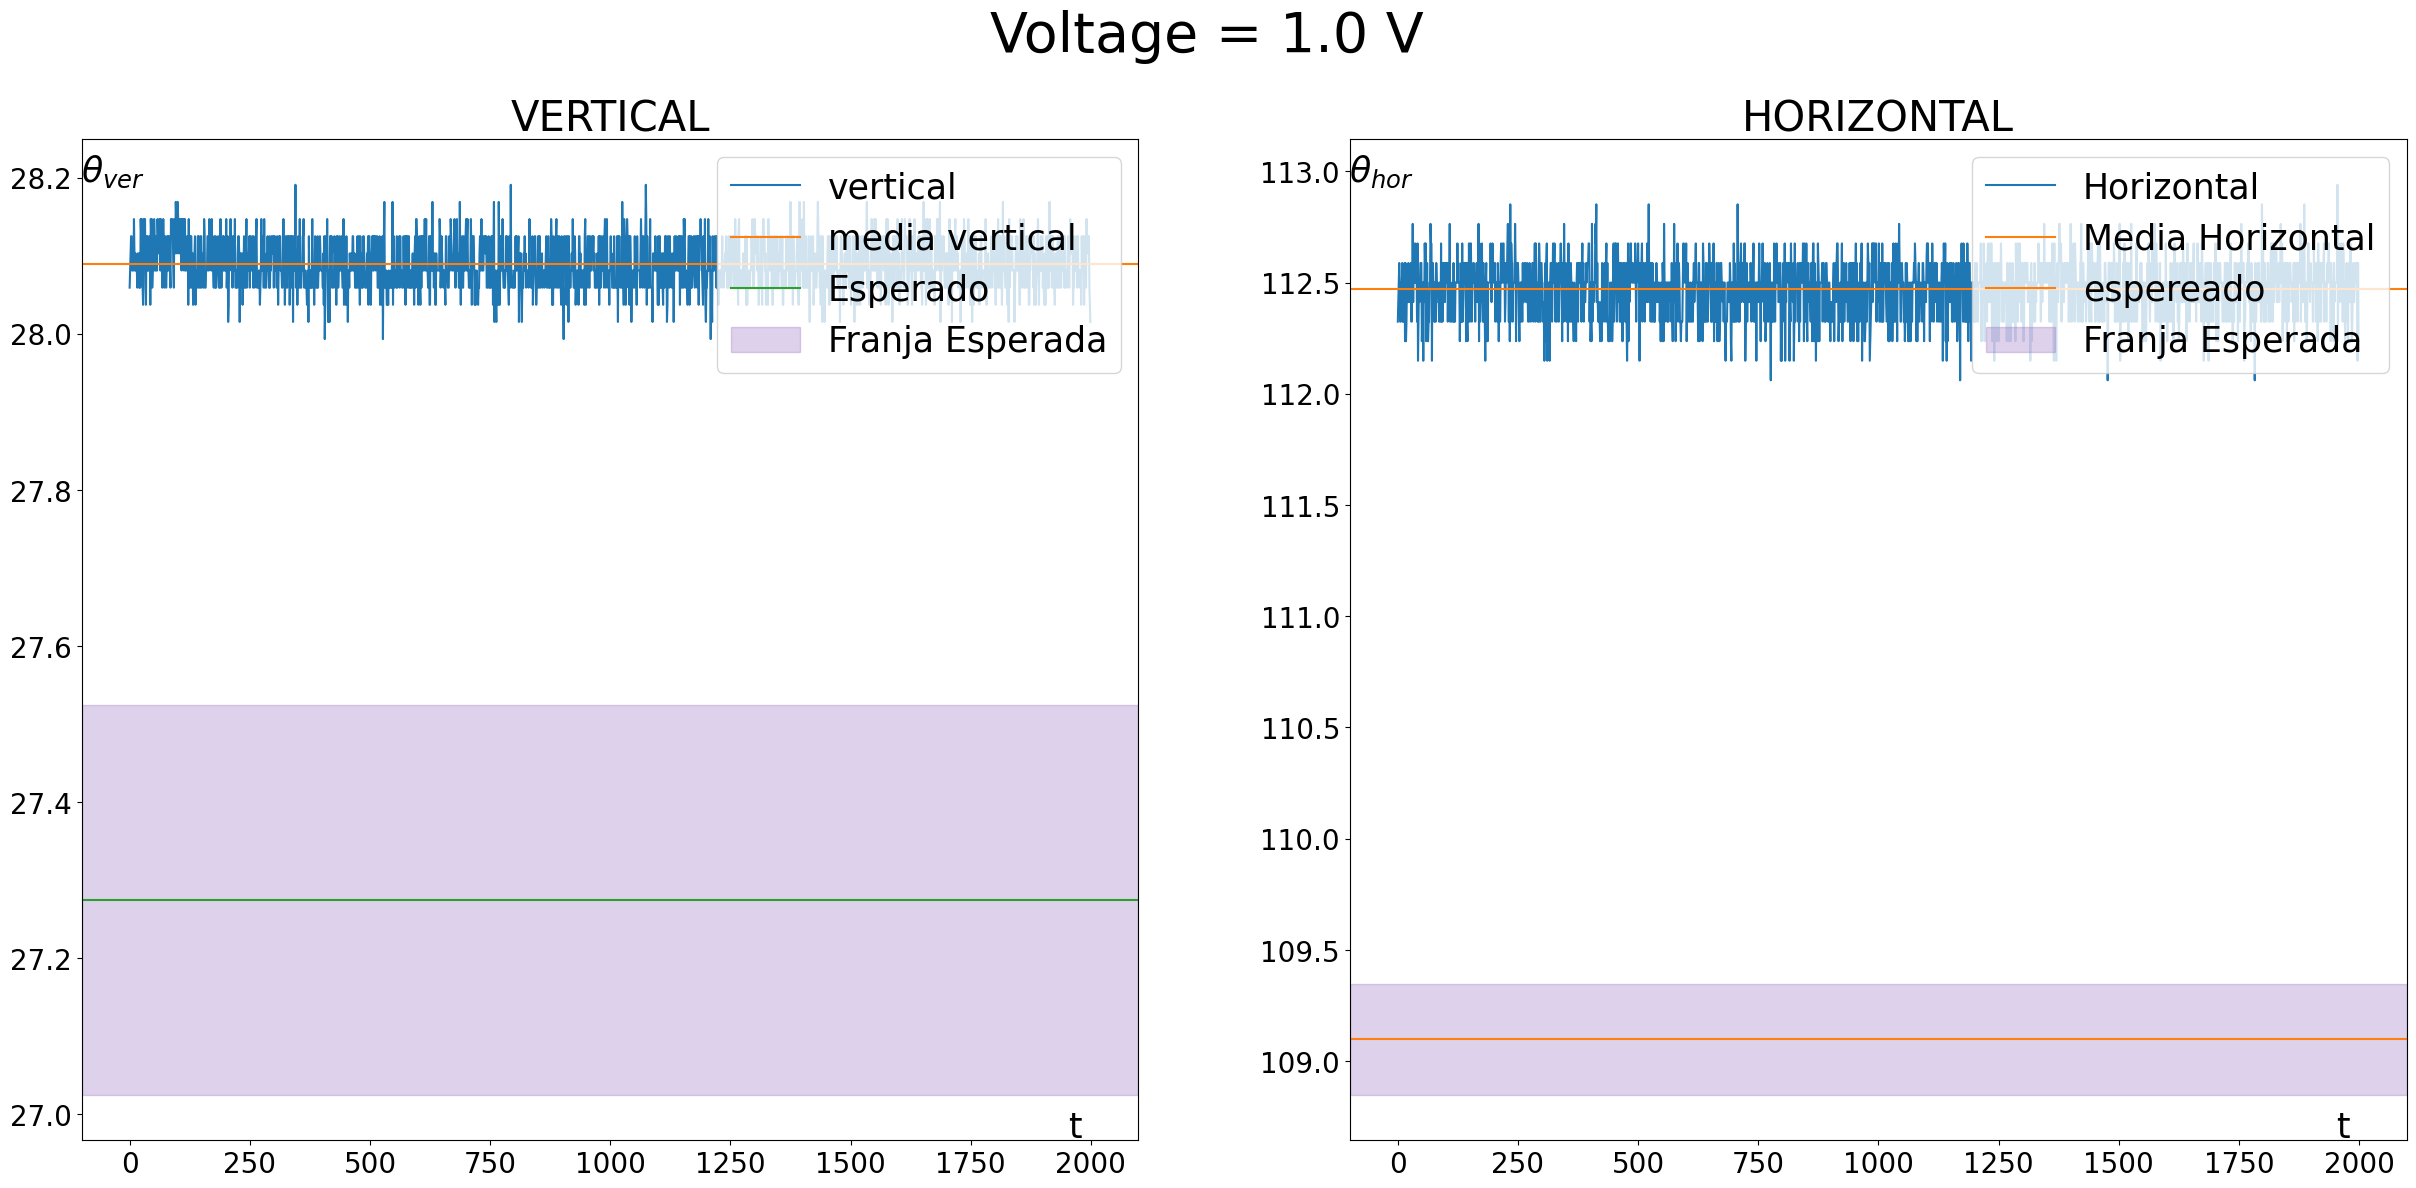

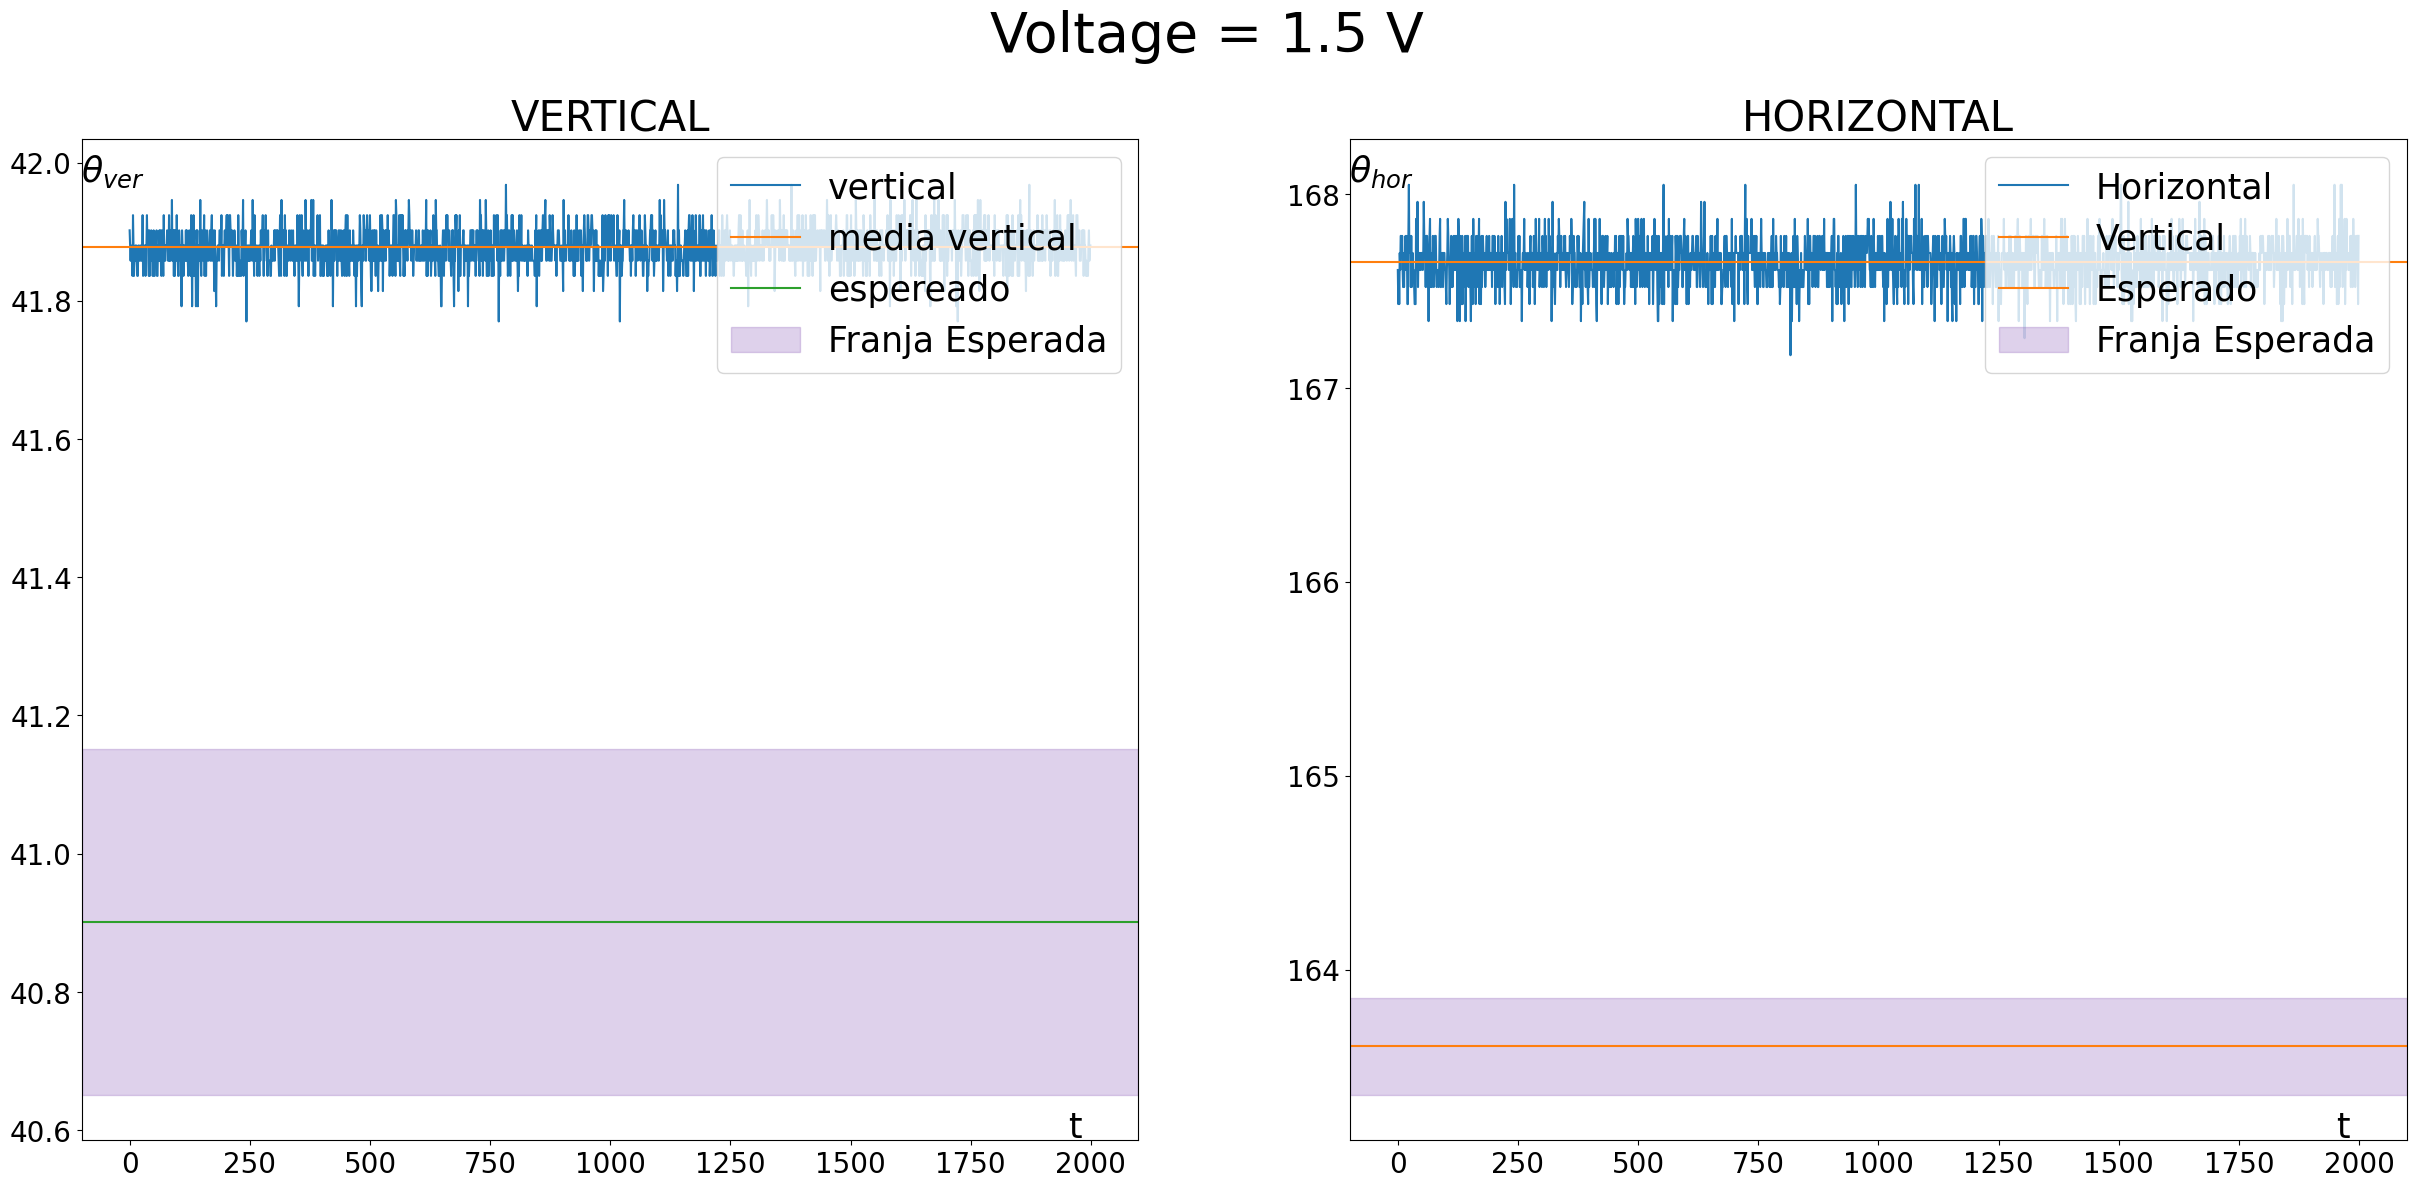

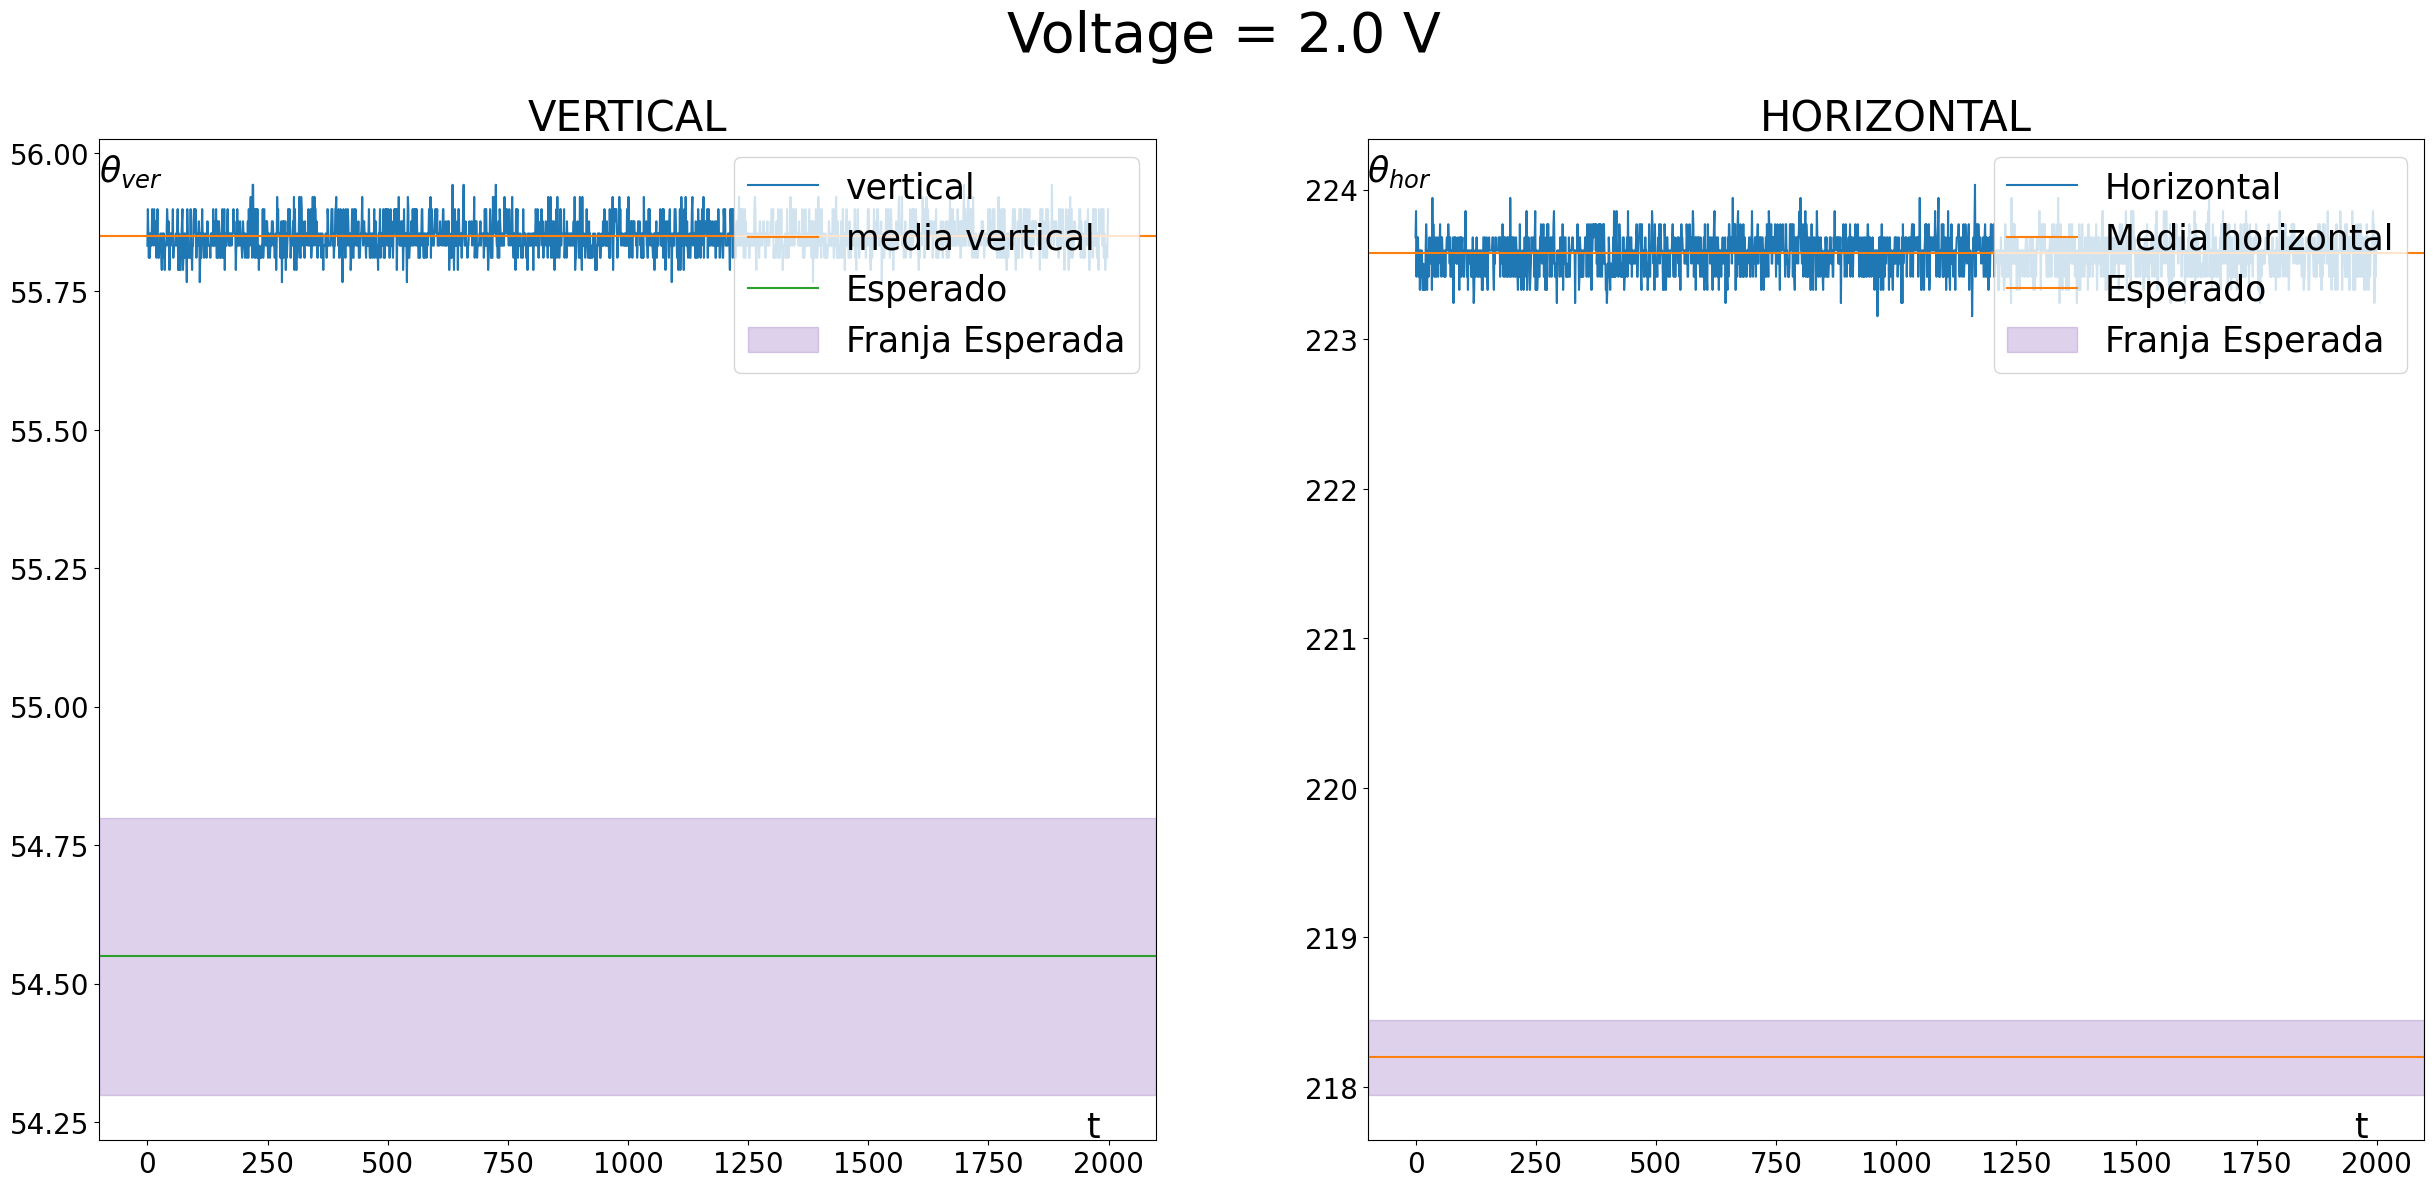

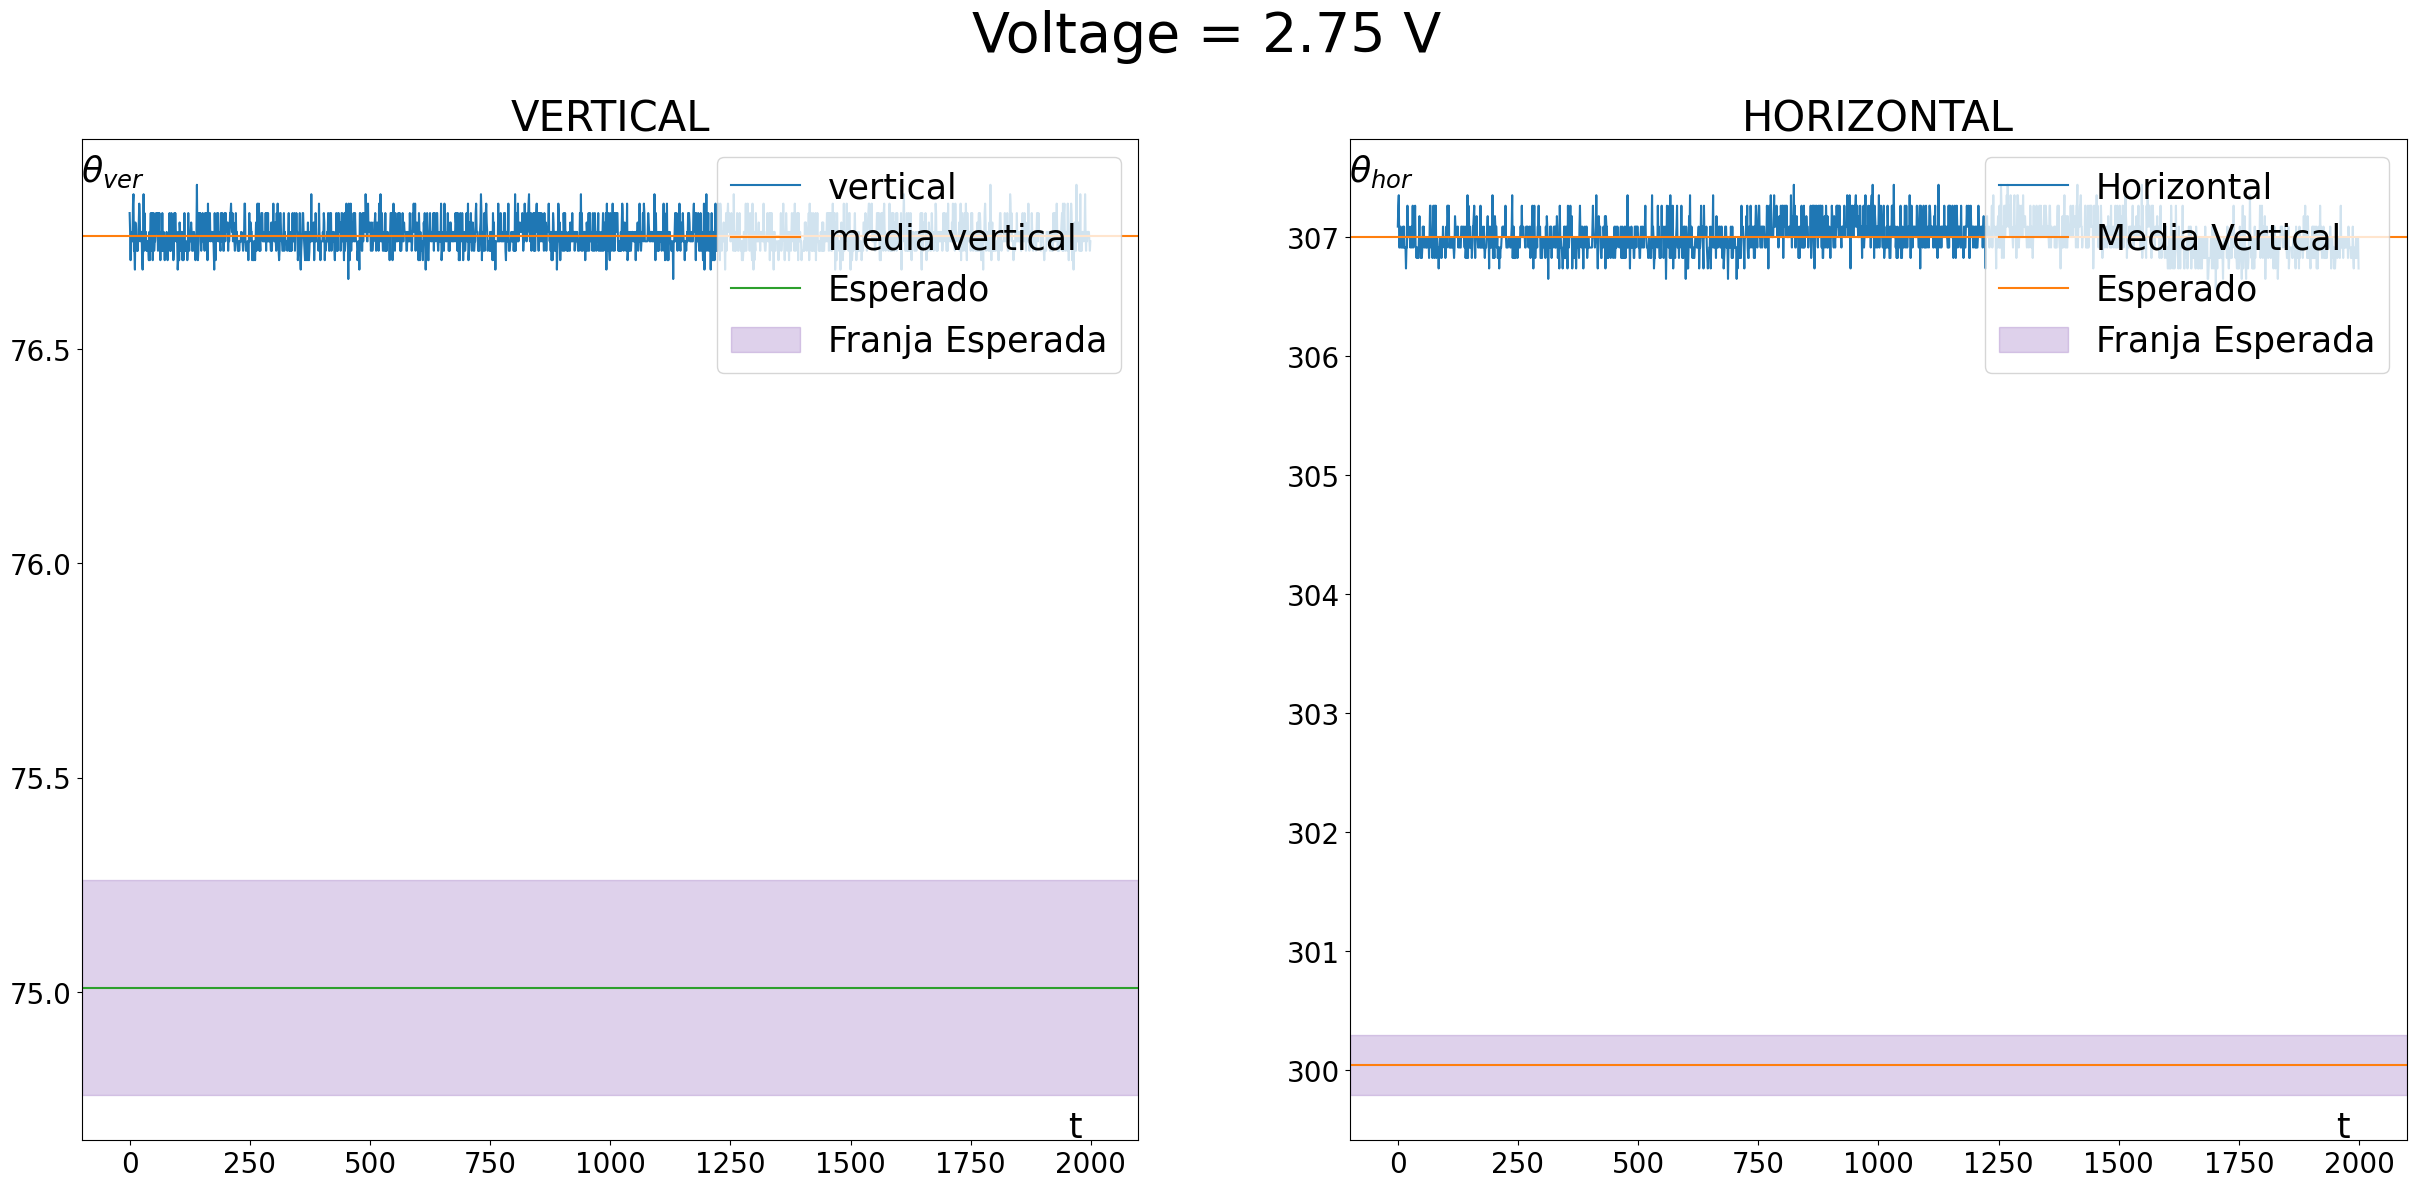

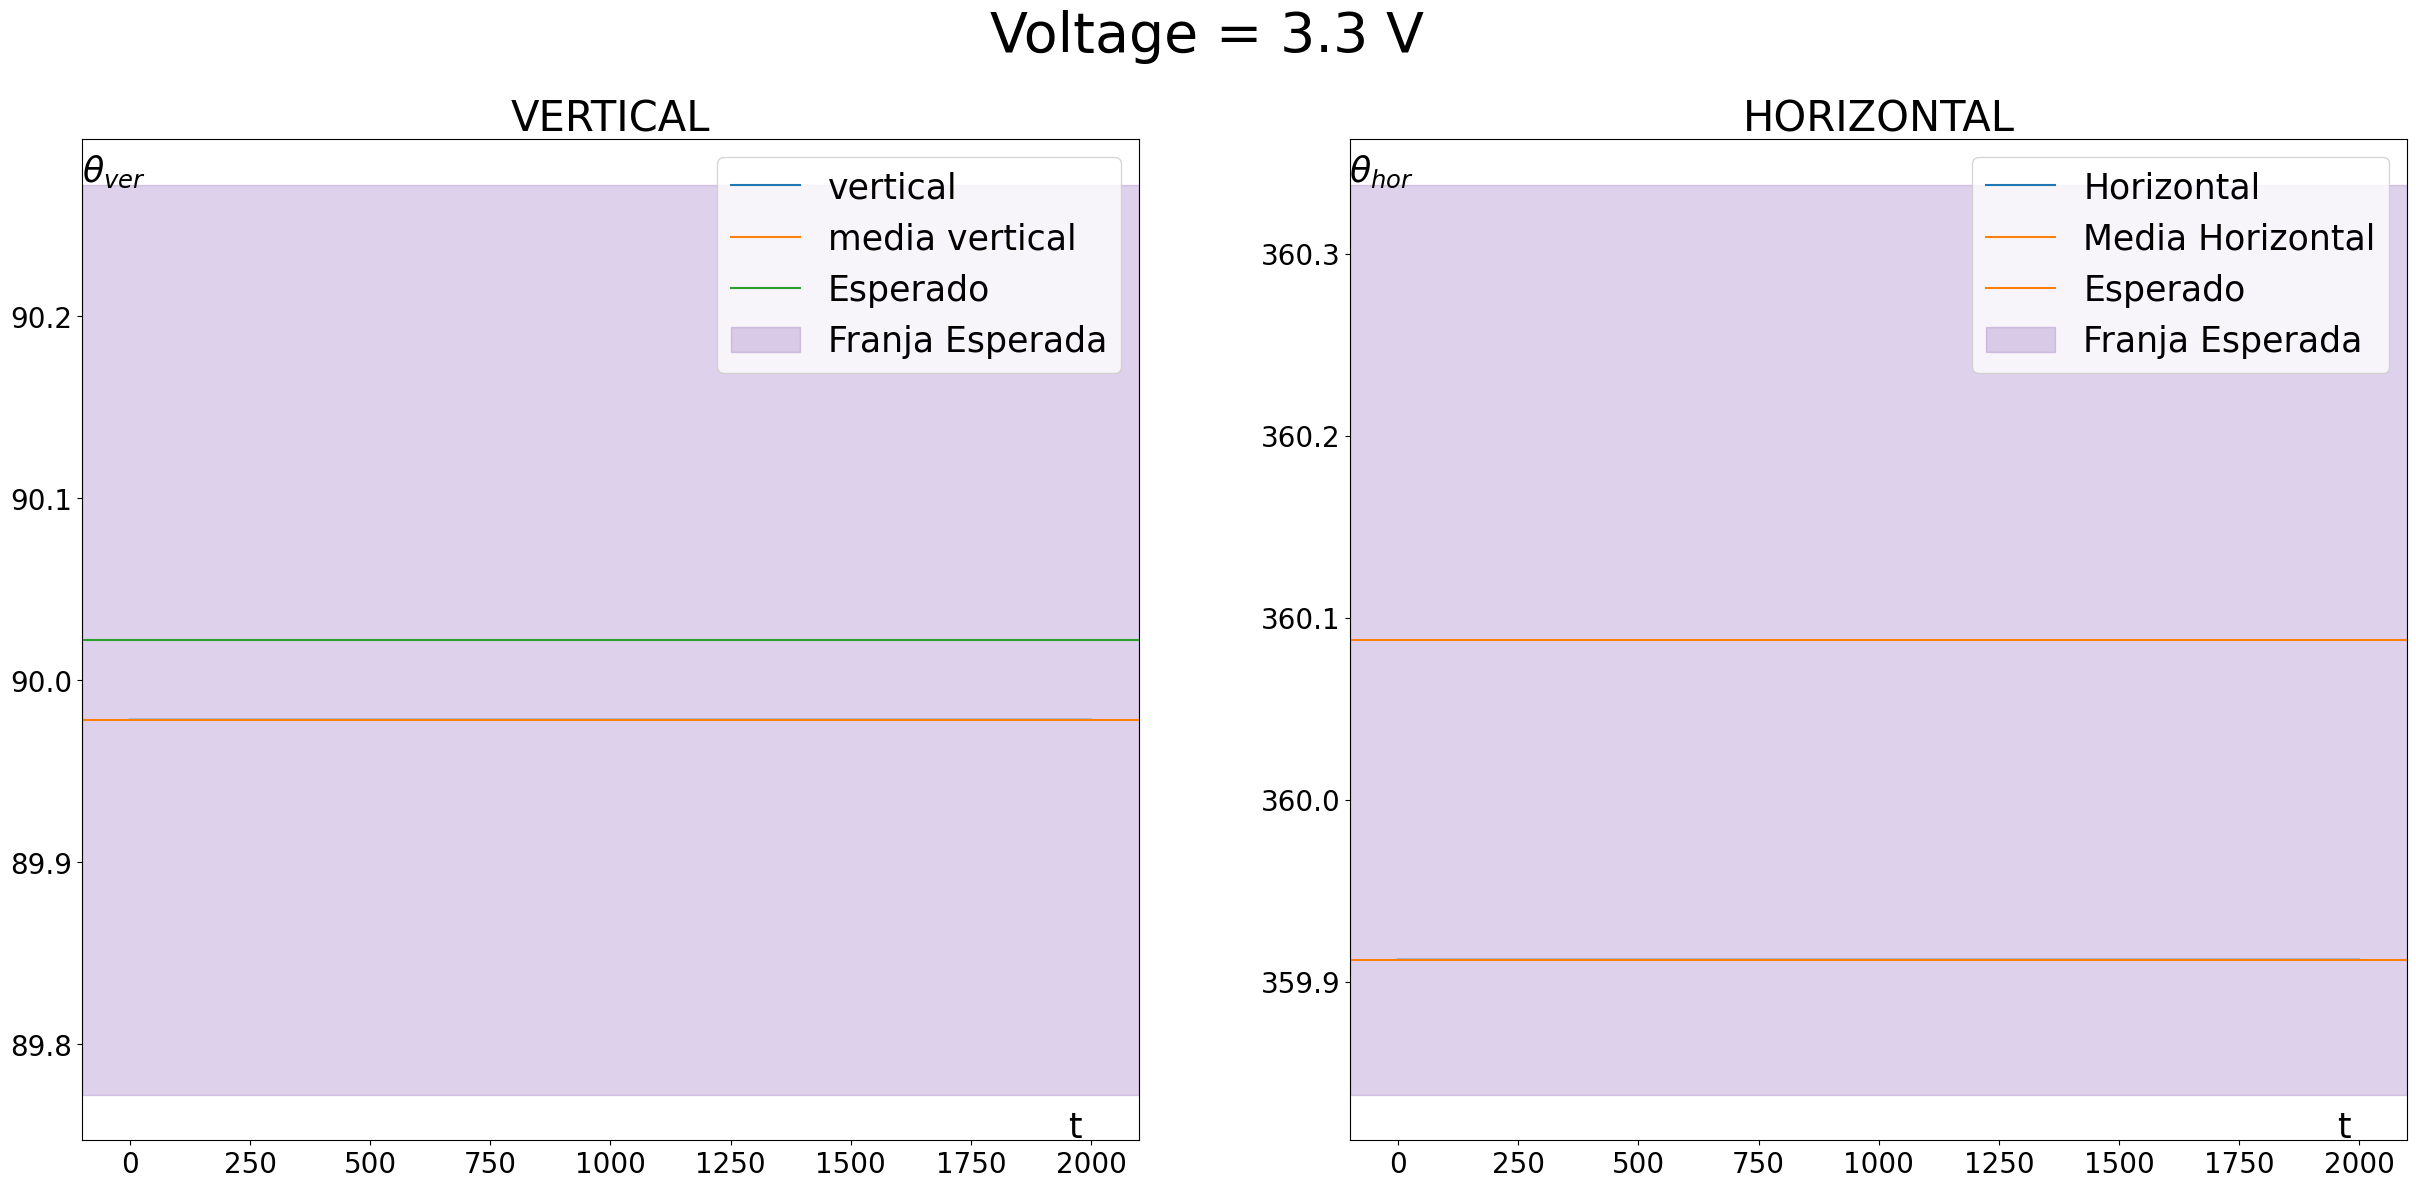

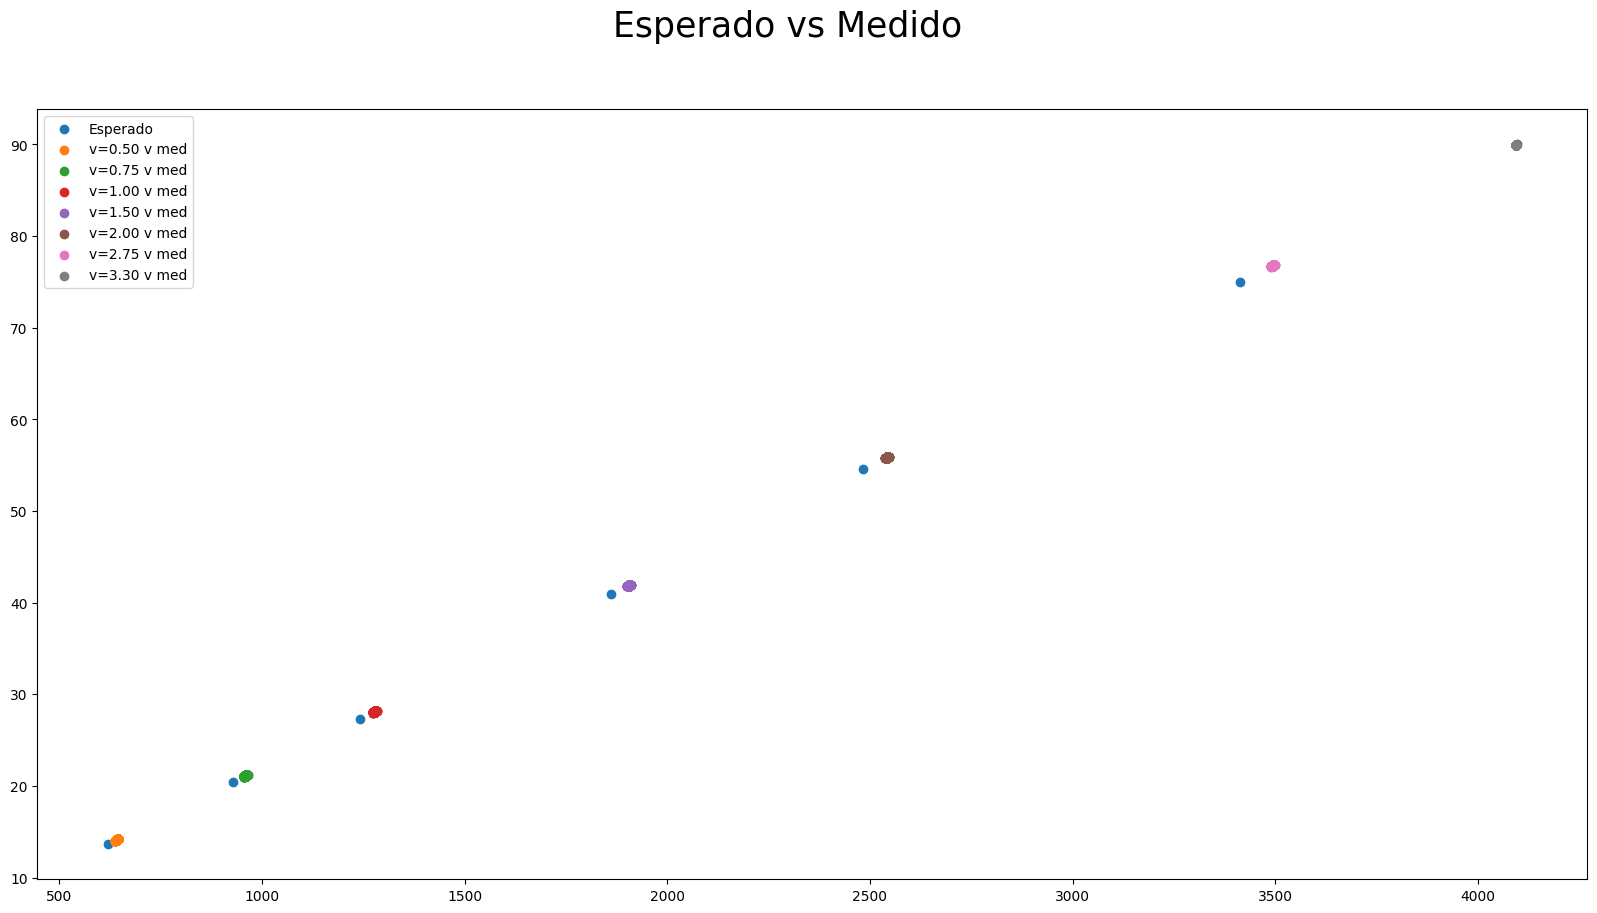

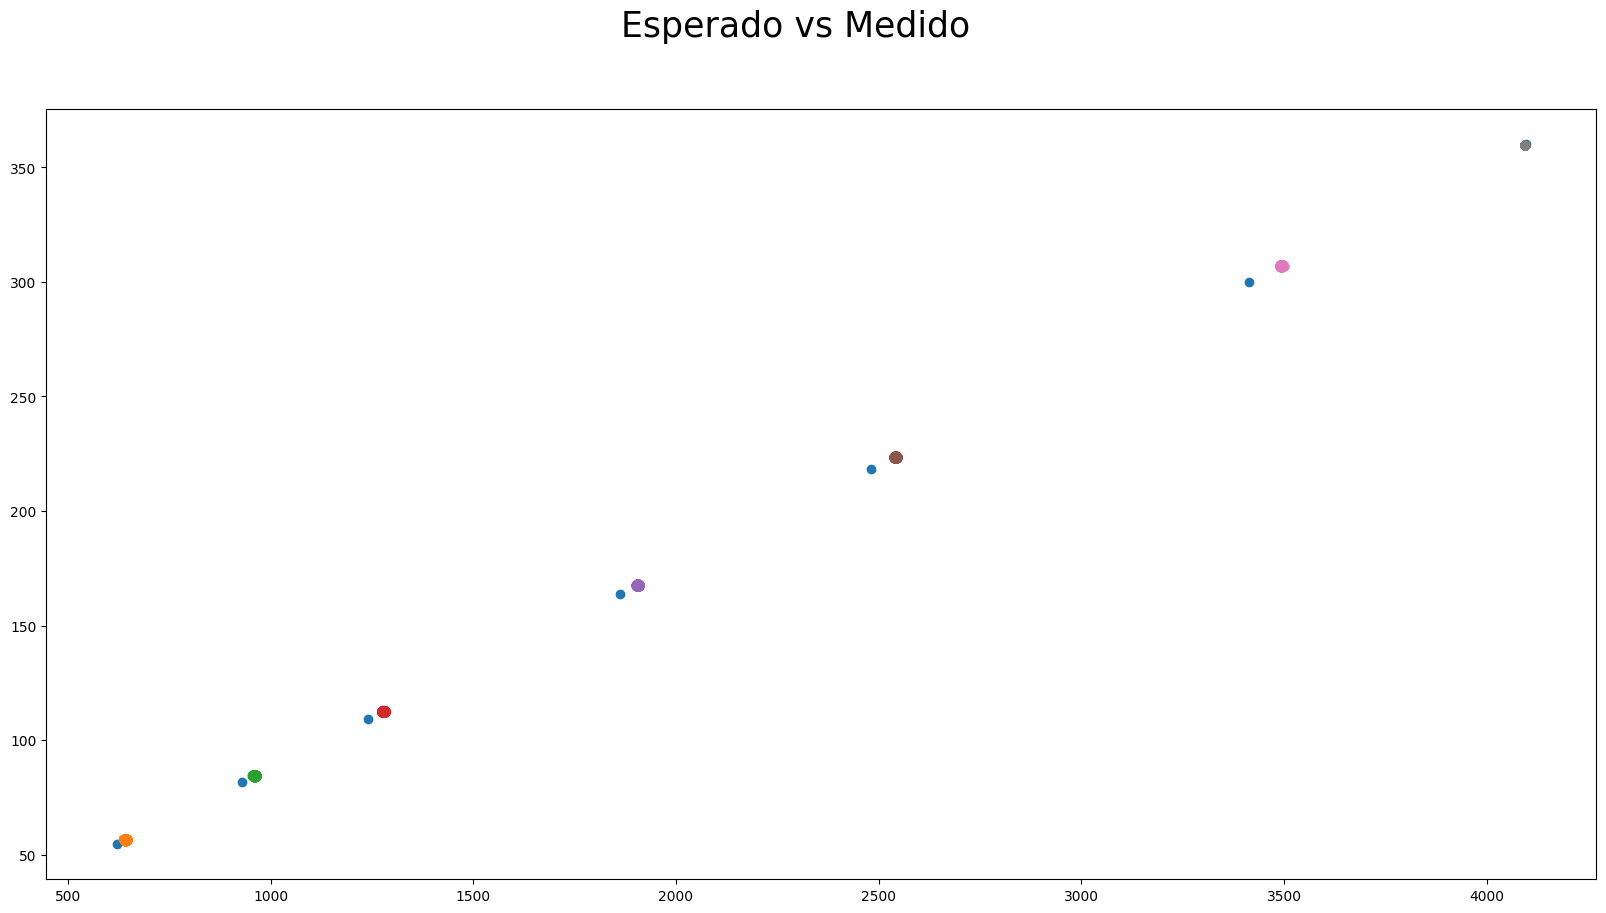

In [38]:

path_figure = '../../../results/TC-IV-ADC/'
path_file_ver = '../../../results/TC-IV-ADC/VERT/'
path_file_hor = '../../../results/TC-IV-ADC/HOR/'
files_angle = ['TC-IV-ADC-0.50.txt',
        'TC-IV-ADC-0.75.txt',
        'TC-IV-ADC-1.00.txt',
        'TC-IV-ADC-1.50.txt',
        'TC-IV-ADC-2.00.txt',
        'TC-IV-ADC-2.75.txt',
        'TC-IV-ADC-3.30.txt']

figure_save = [path_figure+files_angle[0]+'.jpg',
               path_figure+files_angle[1]+'.jpg',
               path_figure+files_angle[2]+'.jpg',
               path_figure+files_angle[3]+'.jpg',
               path_figure+files_angle[4]+'.jpg',
               path_figure+files_angle[5]+'.jpg',
               path_figure+files_angle[6]+'.jpg',
               ] 



error_expected = 0.5 


NBITS = 12 
MAX_VALUE = 2**NBITS
MAX_VOLTAGE = 3.3 
expected_angle = [] 
voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3] ##units Volts
horizontal_mean_angle = [] 
horizontal_min_angle = [] 
horizontal_max_angle = [] 
vertical_mean_angle = [] 
vertical_max_angle = [] 
vertical_min_angle = [] 
ADC_expected_value = []
angle_expected_ver = []
angle_expected_hor = []

n_samples_adc   = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
raw_adc_data_ver= np.zeros((2000,len(files_angle)),dtype=int)
raw_adc_data_hor= np.zeros((2000,len(files_angle)),dtype=int)
angle_hor       = np.zeros((2000,len(files_angle)),dtype=float) ## .2 decimal point
angle_ver       = np.zeros((2000,len(files_angle)),dtype=float) ## .2 decimal point 


for l in voltage_source:
    ADC_expected_value.append(int( (MAX_VALUE/MAX_VOLTAGE)*l)) 

for i in ADC_expected_value:
    angle_expected_ver.append((90.0/4095)*(i - 0))
    angle_expected_hor.append((360.0/4095)*(i - 0)) 

### READ FILES VERTICAL 
# sample, angle(float),decimal 
i = 0 
for file in files_angle:    
    index, an_vert, adc_dec_raw= np.genfromtxt(path_file_ver+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    ## parsing data 
    adc_dec_raw =adc_dec_raw.astype(int) 
    an_vert = an_vert.astype(float)
    raw_adc_data_ver[:,i] = np.array(adc_dec_raw)
    angle_ver[:,i] = np.array(an_vert)
    vertical_mean_angle.append(np.mean(an_vert))
    vertical_min_angle.append(np.amin(an_vert))
    vertical_max_angle.append(np.amax(an_vert))
    i = i + 1 


### READ FILES HORIZONTAL 
# sample, angle(float),decimal 

i = 0 
for file in files_angle:    
    index, an_hor, adc_dec_raw= np.genfromtxt(path_file_hor+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    ## parsing data 
    adc_dec_raw =adc_dec_raw.astype(int) 
    an_hor = an_hor.astype(float)
    raw_adc_data_hor[:,i] = np.array(adc_dec_raw)
    angle_hor[:,i] = np.array(an_hor)
    horizontal_mean_angle.append(np.mean(an_hor))
    horizontal_min_angle.append(np.amin(an_hor))
    horizontal_max_angle.append(np.amax(an_hor))
    i = i + 1 




colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']



### plotting graphs 
######################################### SOURCE OF 0.5V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 0 ## 0.5v 
ax_index = [0,1] 

fig_anglev05,axangle05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev05.suptitle(f'Voltage = {voltage_source[index]}V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle05[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle05[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle05[ax_index[0]].axhline(y=angle_expected_ver[index],label='Esperado',color = colors[2]) 
axangle05[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], label='Franja Esperada')
### horizontal 
axangle05[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle05[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='media Horizontal',color = colors[1]) 
axangle05[ax_index[1]].axhline(y=angle_expected_hor[index],label='Esperado',color = colors[1]) 
axangle05[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle05[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle05[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle05[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle05[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle05[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle05[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev05.savefig(figure_save[index],bbox_inches="tight")


######################################### END SOURCE OF 0.5V  ###############################################################




######################################### SOURCE OF 0.75V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 1 ## 0.5v 
ax_index = [0,1] 

fig_anglev075,axangle075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev075.suptitle(f'Voltage = {voltage_source[index]}V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle075[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle075[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle075[ax_index[0]].axhline(y=angle_expected_ver[index],label='Esperado',color = colors[2]) 
axangle075[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle075[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle075[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='Media Horizontal',color = colors[1]) 
axangle075[ax_index[1]].axhline(y=angle_expected_hor[index],label='Esperado',color = colors[1]) 
axangle075[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle075[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle075[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle075[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle075[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle075[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle075[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle075[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle075[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle075[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle075[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle075[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle075[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle075[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle075[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev075.savefig(figure_save[index],bbox_inches="tight")



######################################### END SOURCE OF 0.75V  ###############################################################




######################################### SOURCE OF 1.00 V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 2 ## 0.5v 
ax_index = [0,1] 

fig_anglev100,axangle100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev100.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle100[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle100[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle100[ax_index[0]].axhline(y=angle_expected_ver[index],label='Esperado',color = colors[2]) 
axangle100[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle100[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle100[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='Media Horizontal',color = colors[1]) 
axangle100[ax_index[1]].axhline(y=angle_expected_hor[index],label='espereado',color = colors[1]) 
axangle100[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle100[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle100[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle100[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle100[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle100[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle100[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle100[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle100[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle100[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle100[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle100[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle100[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle100[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle100[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev100.savefig(figure_save[index],bbox_inches="tight")


######################################### END SOURCE OF 1.00 V  ###############################################################




######################################### SOURCE OF 1.50 V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 3 ## 1.5v 
ax_index = [0,1] 

fig_anglev150,axangle150 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev150.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle150[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle150[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle150[ax_index[0]].axhline(y=angle_expected_ver[index],label='espereado',color = colors[2]) 
axangle150[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle150[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle150[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='Vertical',color = colors[1]) 
axangle150[ax_index[1]].axhline(y=angle_expected_hor[index],label='Esperado',color = colors[1]) 
axangle150[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle150[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle150[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle150[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle150[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle150[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle150[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle150[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle150[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle150[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle150[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle150[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle150[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle150[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle150[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev150.savefig(figure_save[index],bbox_inches="tight")

######################################### END SOURCE OF 1.50 V  ###############################################################




######################################### SOURCE OF 2.00 V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 4 ## 2.00v 
ax_index = [0,1] 

fig_anglev200,axangle200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev200.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle200[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle200[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle200[ax_index[0]].axhline(y=angle_expected_ver[index],label='Esperado',color = colors[2]) 
axangle200[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle200[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle200[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='Media horizontal',color = colors[1]) 
axangle200[ax_index[1]].axhline(y=angle_expected_hor[index],label='Esperado',color = colors[1]) 
axangle200[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle200[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle200[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle200[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle200[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle200[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle200[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle200[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle200[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle200[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle200[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle200[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle200[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle200[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle200[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev200.savefig(figure_save[index],bbox_inches="tight")

######################################### END SOURCE OF 2.00 V  ###############################################################



######################################### SOURCE OF 2.75 V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index = 5 ## 2.00v 
ax_index = [0,1] 

fig_anglev275,axangle275 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev275.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle275[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle275[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle275[ax_index[0]].axhline(y=angle_expected_ver[index],label='Esperado',color = colors[2]) 
axangle275[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle275[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle275[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='Media Vertical',color = colors[1]) 
axangle275[ax_index[1]].axhline(y=angle_expected_hor[index],label='Esperado',color = colors[1]) 
axangle275[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle275[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle275[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle275[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle275[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle275[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle275[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle275[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle275[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle275[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle275[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle275[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle275[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle275[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle275[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev275.savefig(figure_save[index],bbox_inches="tight")

######################################### END SOURCE OF 2.00 V  ###############################################################


######################################### SOURCE OF 3.00 V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)
index =6 ## 3.00v 
ax_index = [0,1] 

fig_anglev330,axangle330 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_anglev330.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
axangle330[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
axangle330[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle330[ax_index[0]].axhline(y=angle_expected_ver[index],label='Esperado',color = colors[2]) 
axangle330[ax_index[0]].axhspan(angle_expected_ver[index] - error_expected/2, angle_expected_ver[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle330[ax_index[1]].plot(n_samples_adc, angle_hor[:,index],label='Horizontal',color = colors[0])
axangle330[ax_index[1]].axhline(y=horizontal_mean_angle[index],label='Media Horizontal',color = colors[1]) 
axangle330[ax_index[1]].axhline(y=angle_expected_hor[index],label='Esperado',color = colors[1]) 
axangle330[ax_index[1]].axhspan(angle_expected_hor[index] - error_expected/2, angle_expected_hor[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle330[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle330[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle330[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle330[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle330[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle330[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle330[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axangle330[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle330[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle330[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle330[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle330[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle330[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle330[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
fig_anglev330.savefig(figure_save[index],bbox_inches="tight")

######################################### END SOURCE OF 3.00 V  ###############################################################


### COMPARE PLOTS EXPECTED VS MEASURE 
## VERTICAL TITA VS ADC 
figangver, axangver = plt.subplots(figsize=(20,10))
figangver.suptitle('Esperado vs Medido',fontsize = 25) 
#axangver.set_xlim([0,4200]) 
#axangver.set_ylim([0,3.5]) 
axangver.scatter(ADC_expected_value,angle_expected_ver,label='Esperado',color=colors[0])
axangver.scatter(raw_adc_data_ver[:,0],angle_ver[:,0],label='v=0.50 v med',color=colors[1])
axangver.scatter(raw_adc_data_ver[:,1],angle_ver[:,1],label='v=0.75 v med',color=colors[2])
axangver.scatter(raw_adc_data_ver[:,2],angle_ver[:,2],label='v=1.00 v med',color=colors[3])
axangver.scatter(raw_adc_data_ver[:,3],angle_ver[:,3],label='v=1.50 v med',color=colors[4])
axangver.scatter(raw_adc_data_ver[:,4],angle_ver[:,4],label='v=2.00 v med',color=colors[5])
axangver.scatter(raw_adc_data_ver[:,5],angle_ver[:,5],label='v=2.75 v med',color=colors[6])
axangver.scatter(raw_adc_data_ver[:,6],angle_ver[:,6],label='v=3.30 v med',color=colors[7])


axangver.legend()
figangver.savefig(path_figure+'vert_comp.jpg',bbox_inches="tight")



## HORIZONTAL TITA VS ADC (EXPECTED VS MEASUREMENT)
figanghor, axanghor = plt.subplots(figsize=(20,10))
figanghor.suptitle('Esperado vs Medido',fontsize = 25) 

axanghor.scatter(ADC_expected_value,angle_expected_hor,label='Esperado',color=colors[0])
axanghor.scatter(raw_adc_data_ver[:,0],angle_hor[:,0],label='v=0.50 v med',color=colors[1])
axanghor.scatter(raw_adc_data_ver[:,1],angle_hor[:,1],label='v=0.75 v med',color=colors[2])
axanghor.scatter(raw_adc_data_ver[:,2],angle_hor[:,2],label='v=1.00 v med',color=colors[3])
axanghor.scatter(raw_adc_data_ver[:,3],angle_hor[:,3],label='v=1.50 v med',color=colors[4])
axanghor.scatter(raw_adc_data_ver[:,4],angle_hor[:,4],label='v=2.00 v med',color=colors[5])
axanghor.scatter(raw_adc_data_ver[:,5],angle_hor[:,5],label='v=2.75 v med',color=colors[6])
axanghor.scatter(raw_adc_data_ver[:,6],angle_hor[:,6],label='v=3.30 v med',color=colors[7])
axanghor.legend()

figanghor.savefig(path_figure+'hor_comp.jpg',bbox_inches="tight")









In [ ]:
## generate table 
from IPython.display import HTML

linea1 = (angle_expected_ver[0], 
          vertical_mean_angle[0],
         angle_expected_hor[0],
          vertical_mean_angle[0],
         )

linea2 = (angle_expected_ver[1], 
          vertical_mean_angle[0],
          angle_expected_ver[1],
          vertical_mean_angle[0],
         )



linea3 = (angle_expected_ver[2],
           vertical_mean_angle[0],
          vertical_mean_angle[0],
         angle_expected_hor[2])

linea4 = (angle_expected_ver[3],
           vertical_mean_angle[0],
          vertical_mean_angle[0],
         
         angle_expected_hor[3])

linea5 = (angle_expected_ver[4], 
          vertical_mean_angle[0],
          vertical_mean_angle[0],
          angle_expected_hor[4])

linea6 = (angle_expected_ver[5], 
           vertical_mean_angle[0],
          vertical_mean_angle[0],
         
         angle_expected_hor[5])

linea7 = (angle_expected_ver[6], 
          vertical_mean_angle[0],
          vertical_mean_angle[0],
          angle_expected_hor[6])




html_code = """
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="2">TC-ADC-IV</th>
    <th class="tg-0pky" colspan="4">NOMBRE: TEST-ADC-ANGLE</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" colspan="3">Angulo vertical</td>
    <td class="tg-0pky" colspan="3">Angulo horizontal</td>
  </tr>
  <tr>
    <td class="tg-0pky">Tensión [V]</td>
    <td class="tg-0pky">Angulo estimado</td>
    <td class="tg-0pky">Angulo medido</td>
    <td class="tg-0pky">Tensión [V]</td>
    <td class="tg-0pky">Angulo estimado</td>
    <td class="tg-0pky">Angulo medido</td>
  </tr>
  <tr>
    <td class="tg-0pky">0.50</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">0.5</td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">%.2f</span></td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%.2f</td>
  </tr>
  <tr>
    <td class="tg-0lax">3.30</td>
    <td class="tg-0lax">%.2f</td>
    <td class="tg-0lax">%.2f</td>
    <td class="tg-0lax">3.30</td>
    <td class="tg-0lax">%.2f</td>
    <td class="tg-0lax">%.2d</td>
  </tr>
</tbody>
</table>
"""% (linea1+linea2+linea3+linea4+linea5+linea6+linea7)

HTML(html_code) 


# TC-ADC-IV: Test de relación angulo-tensión con cero y máximo corrido

In [ ]:
##CALCULO TEORICO Y GRAFICAS CON EL OFFSET DE CERO Y OFFSET DE MAXIMO ANGULO 
import numpy as np 
import matplotlib.pylab as plt

NBITS = 12 
MAX_ADC_VALUE = 2**NBITS
MAX_VOLTAGE = 3.1 
MIN_VOLTAGE = 0.30 
ADC_MIN = int (MIN_VOLTAGE*(MAX_ADC_VALUE/3.3))
ADC_MAX = int (MAX_VOLTAGE*(MAX_ADC_VALUE/3.3))
adc_teorical_values = np.arange(0,4096,1.0,dtype=float)  
angle_vertical = (90.0/(ADC_MAX - ADC_MIN))*(adc_teorical_values - ADC_MIN)
angle_hor = (360.0/(ADC_MAX - ADC_MIN))*(adc_teorical_values -  ADC_MIN)
figTeorAngZO,axangZ0 = plt.subplots(nrows = 1 , ncols = 2, figsize = (20,5)) 
figTeorAngZO.suptitle('relación agulo tension Cero corrido') 
axangZ0[0].set_title('angulo vertical') 
axangZ0[0].axhline(y=90) 
axangZ0[0].axhline(y=0) 
axangZ0[0].plot(adc_teorical_values,angle_vertical) 
axangZ0[0].set_xlabel('ADC') 
axangZ0[0].set_ylabel(r'$\theta_{ver}$',rotation=0,fontsize= 20) 
axangZ0[1].plot(adc_teorical_values,angle_hor) 
axangZ0[1].axhline(y=360.0) 
axangZ0[1].axhline(y=0) 
axangZ0[1].set_title('angulo horizontal')   

In [ ]:

path_file_verNZ = '../../../results/TC-V-ADC/VERT/'
path_file_horNZ = '../../../results/TC-V-ADC/HOR/'
files_angleNZ = ['TC-V-ADC-0.30.txt',
        'TC-V-ADC-0.50.txt',
        'TC-V-ADC-0.75.txt',
        'TC-V-ADC-1.00.txt',
        'TC-V-ADC-1.25.txt',
        'TC-V-ADC-2.00.txt',
        'TC-V-ADC-2.50.txt',
        'TC-V-ADC-3.00.txt',
        'TC-V-ADC-3.10.txt']



error_expected = 0.5
NBITS = 12 
MAX_ADC_VALUE = 2**NBITS
ADC_REF_VOLTAGE = 3.3  
MAX_VOLTAGE = 3.1 
MIN_VOLTAGE = 0.30 
ADC_MIN = int (MIN_VOLTAGE*(MAX_ADC_VALUE/3.3))
ADC_MAX = int (MAX_VOLTAGE*(MAX_ADC_VALUE/3.3))


voltage_source = [0.3, 0.5,0.75,1.0,1.25,2.0,2.5,3.0,3.1] ##units Volts
expected_angle = [] 
horizontalNZ_mean_angle = [] 
horizontalNZ_min_angle = [] 
horizontalNZ_max_angle = [] 
verticalNZ_mean_angle = [] 
verticalNZ_max_angle = [] 
verticalNZ_min_angle = [] 
ADC_expected_valueNZ = []
angle_expected_verNZ = []
angle_expected_horNZ = []

n_samples_adc      = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
raw_adc_data_verNZ = np.zeros((2000,len(files_angleNZ)),dtype=int)
raw_adc_data_horNZ = np.zeros((2000,len(files_angleNZ)),dtype=int)
angle_horNZ        = np.zeros((2000,len(files_angleNZ)),dtype=float) ## .2 decimal point
angle_verNZ        = np.zeros((2000,len(files_angleNZ)),dtype=float) ## .2 decimal point 



print (len(voltage_source)) 
print (len(ADC_expected_valueNZ)) 


for l in voltage_source:
    ADC_expected_valueNZ.append(int( (MAX_ADC_VALUE/3.3)*l)) 


for i in ADC_expected_valueNZ:
    angle_expected_verNZ.append((90.0/(ADC_MAX - ADC_MIN))*(i - ADC_MIN))
    angle_expected_horNZ.append((360.0/(ADC_MAX - ADC_MIN))*(i -  ADC_MIN)  ) 

print (len(voltage_source)) 
print (len(ADC_expected_valueNZ)) 


### PROCESSING FILES AND EXTRACT DATA 

### READ FILES VERTICAL 
# sample, angle(float),decimal 
#    difference_data[:,i] = dec_diff 

i = 0 
for file in files_angleNZ:    
    #index, an_vert, adc_dec_raw_ver= np.genfromtxt(path_file_verNZ+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    index, an_hor, adc_dec_raw_hor= np.genfromtxt(path_file_horNZ+file, delimiter=',', dtype=None, encoding='ascii',unpack=True)
## parsing data vertical  
#    adc_dec_raw_vert =adc_dec_raw_ver.astype(int) 
#    an_vert = an_vert.astype(float)
#    raw_adc_data_verNZ[:,i] = np.array(adc_dec_raw)
    ## parsing data horizontal  
    adc_dec_raw_hor =adc_dec_raw_hor.astype(int) 
    an_hor = an_hor.astype(float)
   # print(an_hor) 
    ### extract data horizontal and vertical 
    angle_horNZ[:,i] = np.array(an_hor)
    raw_adc_data_horNZ[:,i] = np.array(adc_dec_raw_hor)
    horizontalNZ_mean_angle.append(np.mean(an_hor))
    horizontalNZ_min_angle.append(np.amin(an_hor))
    horizontalNZ_max_angle.append(np.amax(an_hor))
#    angle_verNZ[:,i] = np.array(an_vert)
#    verticalNZ_mean_angle.append(np.mean(an_vert))
#    verticalNZ_min_angle.append(np.amin(an_vert))
#    verticalNZ_max_angle.append(np.amax(an_vert))
    i = i + 1 






############################################# PLOTTING FILES ############################################### 

colors = ['#1f77b4',
         '#ff7f0e',
         '#2ca02c',
         '#d62728',
         '#9467bd',
         '#8c564b',
         '#e377c2',
         '#7f7f7f',
         '#bcbd22',
         '#17becf',
         '#aec7e8',
         '#ffbb78',
         '#98df8a',
         '#ff9896',
         '#c5b0d5',
         '#c49c94',
         '#f7b6d2',
         '#c7c7c7',
         '#dbdb8d',
         '#9edae5',
         '#fdae61',
         '#ff9896']



######################################### SOURCE OF 0.30 V  ###############################################################
## angle, angle_expected, angle_mean, figure (2 col, one file)

index =0 ## 0.30 v 
ax_index = [0,1] 

fig_angle030,axangle030 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle030.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle030[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle030[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle030[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle030[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle030[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle030[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle030[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='espereado',color = colors[1]) 
axangle030[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle030[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle030[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle030[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle030[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle030[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle030[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle030[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle030[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle030[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle030[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle030[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle030[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle030[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle030[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 0.50 V  ###############################################################


######################################### SOURCE OF 0.50 V  ###############################################################

index =1 ## 0.50 v 
ax_index = [0,1] 

fig_angle050,axangle050 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle050.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle050[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle050[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle050[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle050[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle050[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle050[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle050[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle050[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle050[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle050[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle050[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle050[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle050[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle050[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle050[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle050[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle050[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle050[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle050[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle050[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle050[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle050[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 0.50 V  ###############################################################



######################################### SOURCE OF 0.75 V  ###############################################################

index =2 ## 0.75 v 
ax_index = [0,1] 

fig_angle075,axangle075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle075.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle075[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle075[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle075[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle075[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle075[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle075[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle075[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle075[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle075[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle075[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle075[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle075[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle075[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle075[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle075[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle075[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle075[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle075[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle075[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle075[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle075[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle075[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 0.75 V  ###############################################################



######################################### SOURCE OF 1.00 V  ###############################################################

index =3 ## 1.00 v 
ax_index = [0,1] 

fig_angle100,axangle100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle100.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle100[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle100[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle100[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle100[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle100[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle100[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle100[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle100[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle100[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle100[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle100[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle100[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle100[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle100[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle100[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle100[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle100[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle100[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle100[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle100[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle100[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle100[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 1.00 V  ###############################################################






######################################### SOURCE OF 1.25 V  ###############################################################

index =4 ## 1.00 v 
ax_index = [0,1] 

fig_angle125,axangle125 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle125.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle125[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle125[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle125[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle125[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle125[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle125[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle125[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle125[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle125[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle125[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle125[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle125[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle125[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle125[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle125[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle125[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle125[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle125[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle125[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle125[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle125[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle125[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 1.25 V  ###############################################################





######################################### SOURCE OF 2.00 V  ###############################################################

index =5 ## 2.00 v 
ax_index = [0,1] 

fig_angle200,axangle200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle200.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle125[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle125[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle200[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle200[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle200[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle200[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle200[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle200[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle200[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle200[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle200[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle200[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle200[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle200[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle200[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle200[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle200[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle200[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle200[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle200[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle200[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle200[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 2.00 V  ###############################################################




######################################### SOURCE OF 2.5 V  ###############################################################

index =6 ## 2.00 v 
ax_index = [0,1] 

fig_angle250,axangle250 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle250.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle250[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle250[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle250[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle250[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle250[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle250[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle250[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle250[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle250[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle250[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle250[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle250[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle250[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle250[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle250[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle250[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle250[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle250[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle250[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle250[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle250[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle250[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 2.50 V  ###############################################################


######################################### SOURCE OF 3.00 V  ###############################################################

index =7 ## 2.00 v 
ax_index = [0,1] 

fig_angle300,axangle300 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle300.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle300ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle300[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle300[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle300[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle300[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle300[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle300[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle300[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle300[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle300[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle300[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle300[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle300[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle300[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle300[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle300[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle300[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle300[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle300[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle300[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle300[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle300[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 3.00 V  ###############################################################






######################################### SOURCE OF 3.10 V  ###############################################################

index =8 ## 2.00 v 
ax_index = [0,1] 

fig_angle310,axangle310 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig_angle310.suptitle(f'Voltage = {voltage_source[index]} V',fontsize = 40) 
#fig_anglev05.tight_layout(pad=2.0)

### vertical 
#axangle310[ax_index[0]].plot(n_samples_adc, angle_ver[:,index],label='vertical',color = colors[0])
#axangle310[ax_index[0]].axhline(y=vertical_mean_angle[index],label='media vertical',color = colors[1]) 
axangle310[ax_index[0]].axhline(y=angle_expected_verNZ[index],label='espereado',color = colors[2]) 
axangle310[ax_index[0]].axhspan(angle_expected_verNZ[index] - error_expected/2, angle_expected_verNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')
### horizontal 
axangle310[ax_index[1]].plot(n_samples_adc, angle_horNZ[:,index],label='Medido',color = colors[0])
axangle310[ax_index[1]].axhline(y=horizontalNZ_mean_angle[index],label='Promedio',color = colors[1]) 
axangle310[ax_index[1]].axhline(y=angle_expected_horNZ[index],label='esperado',color = colors[2]) 
axangle310[ax_index[1]].axhspan(angle_expected_horNZ[index] - error_expected/2, angle_expected_horNZ[index] + error_expected/2, color=colors[4], alpha=0.3, label='Franja Esperada')

### configure plot 
axangle310[ax_index[0]].set_title('VERTICAL',fontsize = 30) 
axangle310[ax_index[0]].legend(loc='upper right',fontsize=25)
axangle310[ax_index[0]].set_xlabel('t',fontsize = 25) 
axangle310[ax_index[0]].set_ylabel(r'$\theta_{ver}$', rotation = 0,fontsize =25) 
axangle310[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axangle310[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axangle310[ax_index[0]].yaxis.set_label_coords(0.03,0.95)

axangle310[ax_index[1]].set_title('HORIZONTAL',fontsize = 30) 
axangle310[ax_index[1]].legend(loc='upper right',fontsize=25)
axangle310[ax_index[1]].set_xlabel('t',fontsize = 25) 
axangle310[ax_index[1]].set_ylabel(r'$\theta_{hor}$', rotation = 0,fontsize =25) 
axangle310[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axangle310[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axangle310[ax_index[1]].yaxis.set_label_coords(0.03,0.95)

######################################### END SOURCE OF 3.10 V  ###############################################################



### expected vs measurement 


"""
### COMPARE PLOTS EXPECTED VS MEASURE 
## VERTICAL TITA VS ADC 
figangver, axangver = plt.subplots(figsize=(20,10))

#axangver.set_xlim([0,4200]) 
#axangver.set_ylim([0,3.5]) 
axangver.scatter(ADC_expected_value,angle_expected_ver,label='expected',color=colors[0])
axangver.scatter(raw_adc_data_ver[:,0],angle_ver[:,0],label='v=0.50 v med',color=colors[1])
axangver.scatter(raw_adc_data_ver[:,1],angle_ver[:,1],label='v=0.75 v med',color=colors[2])
axangver.scatter(raw_adc_data_ver[:,2],angle_ver[:,2],label='v=1.00 v med',color=colors[3])
axangver.scatter(raw_adc_data_ver[:,3],angle_ver[:,3],label='v=1.50 v med',color=colors[4])
axangver.scatter(raw_adc_data_ver[:,4],angle_ver[:,4],label='v=2.00 v med',color=colors[5])
axangver.scatter(raw_adc_data_ver[:,5],angle_ver[:,5],label='v=2.75 v med',color=colors[6])
axangver.scatter(raw_adc_data_ver[:,6],angle_ver[:,6],label='v=3.30 v med',color=colors[7])


axangver.legend()

"""

## HORIZONTAL TITA VS ADC (EXPECTED VS MEASUREMENT)
figanghor, axanghor = plt.subplots(figsize=(20,10))

axanghor.scatter(ADC_expected_valueNZ,angle_expected_horNZ,label='expected',color=colors[0])
axanghor.scatter(raw_adc_data_horNZ[:,0],angle_horNZ[:,0],label='v=0.50 v med',color=colors[1])
axanghor.scatter(raw_adc_data_horNZ[:,1],angle_horNZ[:,1],label='v=0.75 v med',color=colors[2])
axanghor.scatter(raw_adc_data_horNZ[:,2],angle_horNZ[:,2],label='v=1.00 v med',color=colors[3])
axanghor.scatter(raw_adc_data_horNZ[:,3],angle_horNZ[:,3],label='v=1.50 v med',color=colors[4])
axanghor.scatter(raw_adc_data_horNZ[:,4],angle_horNZ[:,4],label='v=2.00 v med',color=colors[5])
axanghor.scatter(raw_adc_data_horNZ[:,5],angle_horNZ[:,5],label='v=2.75 v med',color=colors[6])
axanghor.scatter(raw_adc_data_horNZ[:,6],angle_horNZ[:,6],label='v=3.30 v med',color=colors[7])
axanghor.scatter(raw_adc_data_horNZ[:,7],angle_horNZ[:,7],label='v=3.30 v med',color=colors[7])
axanghor.scatter(raw_adc_data_horNZ[:,8],angle_horNZ[:,8],label='v=3.30 v med',color=colors[7])


axanghor.legend()
 

















In [ ]:
## TABLA RESUMEN 